# Diffusion of Mg and Sr in plagioclase: A Finite Difference Method Approach
*Jordan Lubbers* <br>
*Alaska Volcano Observatory U.S. Geological Survey* <br>


Below we are going to try to recreate figure 7a from Costa et al., (2003) in which a best fit duration of 132 years was fit to a plagioclase profile from the Volcan San Pedro. For more of an explanation on the model please see the ```plag_diffusion_model_github.ipynb``` notebook in this same repository.


In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy import interpolate

from IPython import display
from base64 import b64decode

# path to plag_diff.py module on computer
sys.path.append(
    r"C:\Users\jlubbers\OneDrive - DOI\Research\Coding\Python_scripts\Diffusion"
)
import plag_diff as plag


# path to default plotting preferences script
sys.path.append(r"C:\Users\jlubbers\OneDrive - DOI\Research\Coding\Python_scripts")
import mpl_defaults

export_path = r"C:\Users\jlubbers\OneDrive - DOI\Desktop\test_figures"

## The actual thing we are trying to recreate

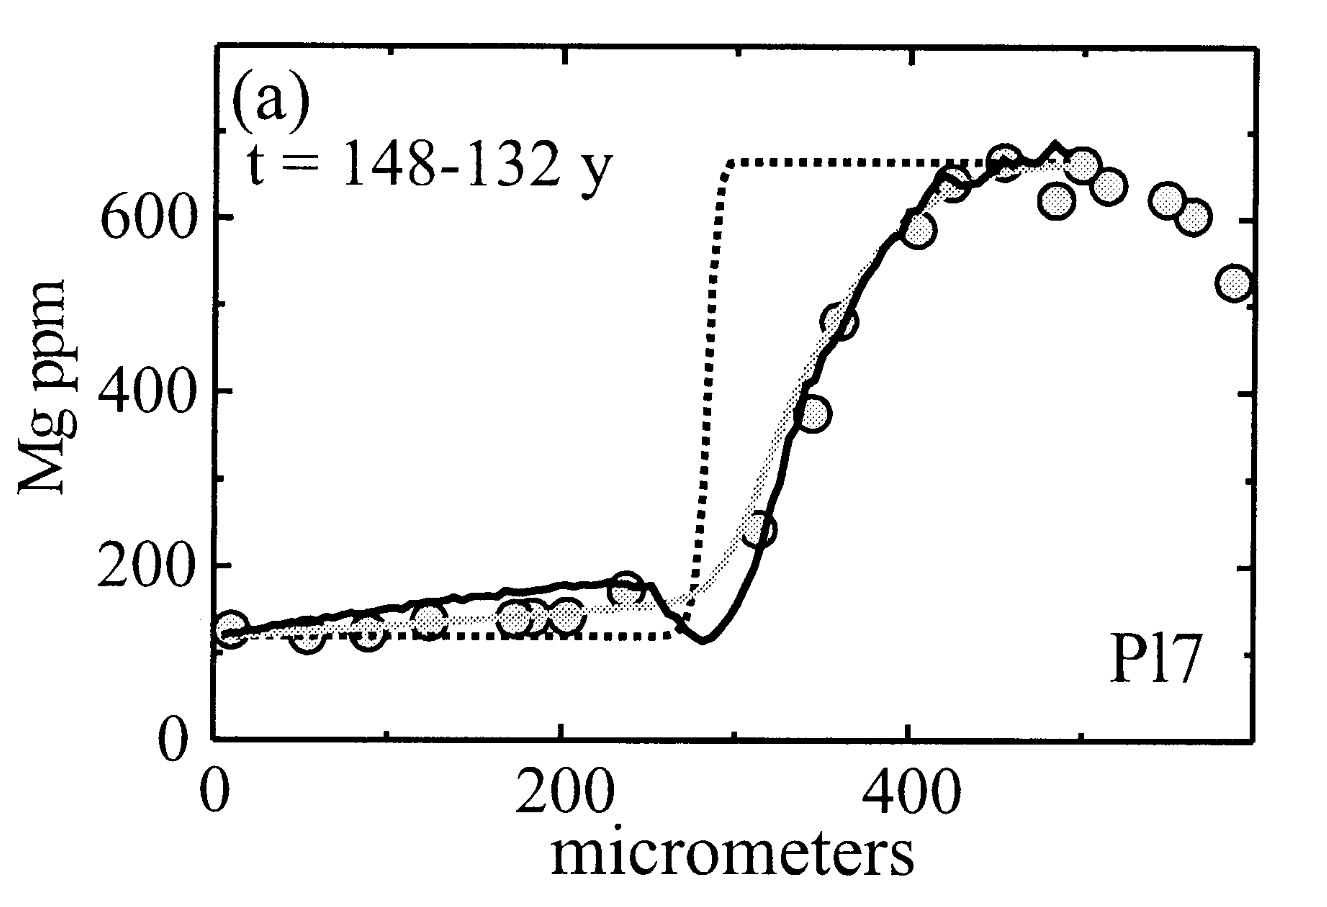

In [2]:
#the actual figure we are trying to recreate
# this is just a bunch of base64 code representing the 
# screenshot so we don't need an external link for it
b64data = "iVBORw0KGgoAAAANSUhEUgAABS8AAAOLCAYAAACxFXaLAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7N0JnE3lH8fxp6yRbBGRKEu0ISpLC0qJpE3Roij9W1S00KKkoh0VLYpK0kKbFJGilIoKpaJkCVkSkiUxf99nnjNz59xzZ+7M3Dtz78zn/Xo9nOfcc8/cuffOvef8zu95fnul7GEAAAAAAAAAIMHs7f4HAAAAAAAAgIRC8BIAAAAAAABAQiJ4CQAAAAAAACAhEbwEAAAAAAAAkJAIXgIAAAAAAABISAQvAQAAAAAAACQkgpcAAAAAAAAAEhLBSwAAAAAAAAAJieAlAAAAAAAAgIRE8BIAAAAAAABAQiJ4CQAAAAAAACAhEbwEAAAAAAAAkJAIXgIAAAAAAABISAQvAQAAAAAAACQkgpcAAAAAAAAAEhLBSwAAAAAAAAAJieAlAAAAAAAAgIRE8BIAAAAAAABAQiJ4CQAAAAAAACAhEbwEAAAAAAAAkJAIXgIAAAAAAABISAQvAQAAAAAAACQkgpcAAAAAAAAAEhLBSwAAAAAAAAAJieAlAAAAAAAAgIRE8BIAAAAAAABAQiJ4CQAAAAAAACAhEbwEAAAAAAAAkJAIXgIAAAAAAABISAQvAQAAAAAAACQkgpcAAAAAAAAAEhLBSwAAAAAAAAAJieAlAAAAAAAAgIRE8BIAAAAAAABAQiJ4CQAAAAAAACAhEbwEAAAAAAAAkJAIXgIAAAAAAABISAQvAQAAAAAAACQkgpcAAAAAAAAAEhLBSwAAAAAAAAAJieAlAAAAAAAAgIS0V8oebhlAHJxwwgnm22+/db3ce/TRR81VV11l9t13X7emcNLz+v7775t///3XVKxY0Xz22Wfmuuuus/9L0PPTvn1789prr7meMUceeaRZsGCBueKKK8zbb79t1q9f724Jdvfdd9vnf8uWLW5NuO3bt5v999/fzJo1yxx99NFuLQAAAAAAyAmCl0CcNWnSxMydO9f1ABRkgwcPNrt27TJ33nmnWxN/5cqVM23btjWvv/66W5MzI0aMMNdee62JdFhw6KGHmpo1a5qPPvrI9hXM32+//cxNN91k+55XXnnF/n/DDTeYdevW2eUSJUqYCy+80Lz44ot2P/fee6+5+OKL7UUIXYzx9OzZ0zzzzDNmr732cmtybs6cOaZYsWLm4IMPNtdcc41dN3bsWLvv7t27m1GjRtl1Xbt2tf97BgwYYOrWret6xnz99demePHiUV+M0O/18ssvux4QvWOPPdZ89dVXrhcbp556qpk6darrGVOjRg3TokULM27cOLfGmC5dutgLblovujCovx3dV3799VdTtmzZtP2cd955ZvXq1fY+QbS/n376KezCrf729TvqZzdu3NjUq1cv7XGcddZZ5p133rH/lypVyq7z+/LLL82SJUvs/uNt69at9mcdccQRbg0AAMhPBC+BOHr33Xftiezff//t1gAAAISrX7+++fHHH10vNnQBVYF8T+XKle2oA+8ihLRp08aOQtB6mT17tilatKi9r6xatcqULl06bT8nnXSS2bBhg71PEO1v+fLlZvHixW5NqgMPPND+jvrZderUsYFU73EocKpgaMuWLe3FjiB6bvRYtP940ygKBWhr1arl1gDReeihh0y1atXMRRdd5NYEu+WWW8zDDz/selmbNm2a/f+UU04x559/foYLfx6NQHryySddL9Wtt95q/25icVEtJxfndPFDj3XSpEkR/7YBIBoEL4E4uOyyy2yGEQAAAAAAiB2NjFE2v8JZCpJr5I4uHihrXqOC3nrrLRtwHzhwoDnkkEPsyJpLL73UThXWp08fu90jjzxiRx55KlSoYC/UtW7d2l5cy+1IoFatWpmPP/7Y9aKjC3tFihRxPYQieAnE2NKlS02nTp3MvHnz3BoAAAAAAIDIFFhVjQWEo9o4EGMaFqV5nAAAAAAAAKLx2GOPuSX4kXkJxEGkYePbtm0zJUuWdD0kmxdeeMGMHz/evPfee25N5jp06OCWjL3P7bffbubPn2+6detm5yuKRHMgffHFF2bChAl2uIL2c/XVV9tq6dOnTw/7UjvuuONM//79zZlnnmkLKXz66afmueeeS9uPipM8/fTTbmtjh1Gcc845GQqzqBCDKrf7qZL78ccf73rRu+uuu2zREw3XQGJTQbFjjjnG9YLpPbX33nunFfQI8scff9htNKeeR3NcNWrUyF7UkZkzZ9o5gDW3nobFZEVz5i1atMi+9/2078xUqVIly99LQvejojwqFqK/m8zo8agYieYRAwAAAGJJ51KaB9orngeCl0BcELxEslF12aAAkeZqicWcL0hcquCrAHhmNF+PApMq1BGJAnmao+eAAw5wa4ydV0hFP6pXr277Cr5v3rzZNGzY0FYuz8rPP/9si3RoKg4/7VtB+SlTprg1Gen30lxIWdF+PKqArMIkCtZmRo9Hcy2tXLnSrQGid/bZZ7ulcLpopb+1WLr++uvNsGHD0j7HNf9XaCVwXWDYZ599bAERj3eBSxe7pF+/fvbv0dO8eXO7/Z9//mkLiVxwwQXulsx/v8GDB5vbbrvNLqv6vy4W+B8PAAAwplKlSmbNmjWchzkEL4EY27lzp50M+NVXX3Vr0hG8RCIL+mIkeIlEV6xYMfPff/+5XjoOb5CoypUrZzZt2uR66UaOHGmuuOIK10M86SKLssVDv9tUWVyVnPU65JYuipQtW9Z+h3r0XfrPP/+Yjh07ujXBdMHmxBNPNL/99pvZd9993dp0ym7X6ArtR4Um7r77bneLMevWrXNL6fR7KXPnr7/+Mr/88ktaoFgnxc8//3zg49FtOpbVvGsLFy60F6F0DBtk//33N6NGjbKjPK699lpbFEP3Hzp0qK24/dJLL5mbb76Zz+Qkos8nvX89O3bssKMm9FrnhN73ev9491+/fr29UKiLJrHijR4qXry4/V/v9127dtnlIBpZFM2xrfajC7O6qLR9+/bA50DPj27X8Yhs2LDB7N692y6Hyu7zF7Sf8uXLZyjmose0ZcsWu6zPi9DzTD3PoiI02ldO6XFv3brVNuQtgpcZEbwEYmzGjBn2YNX/p6UDR2W3FS1a1K0BEgvBSyQjgpdINh9++KE57bTTXC8dwUskqokTJ9ppaYKml+GztuB54oknTK9evVzPmO+++84mZTzwwANuTfa8++675vPPP0+7vzK527Ztays6x8pPP/1kg5WHH3647WvqJBVPVYa3ny5S6JzMCzZmRvspU6aMDQBqf/fdd1/YMbGeH21z6KGH2r628QKKobL7/N1777028BtKFwJCg6CzZ89OG0GiCxHKivfoeZY77rjD3H///XY5J/S4J0+ebD755BO3BrE2btw4s3z5ctdLR/AyI4KXQIzpyqKuNHtDrTy6Uq4PpRIlSrg1QGIheIlkRPASyYbgJZKRgjNBARk+a5GoNAWMspj9Hn/88QzBWSC/rVixInAueIKXGVFtHIgxDYHYb7/9XC/d2rVrOcADAAAAgDhTpiSQDA466CC3hMwQvARiTMMWZs2a5XpAcuvbty9X+wAAAJBUyK4EChaCl0CMKbX7119/dT0geSgz2N+ChjYCAGJLF4liXWUcAAozr3gPkOg0ByyyxpyXQIxFKtgjVBsHgNhizkskG1WTVkGMUDVr1jS33nqr6wGJhzkvkWyC5rxUlfHx48ebk08+2a0BEkPQSDfmvMyI4CUQYwQvASDvELwEgPgjeIlko/frzz//7HqpVJugQYMGrgckDoKXWWN8CgAAAAAAKDD23Xdfc8wxx2RoBC6RiJT4hKwRvAQAAAAAAACQkAheAgAAAAAAAHmMYeHRIXgJ5JGmTZuaIkWKuB4AAAAAACjMpk+f7paQGYKXQB659NJLbWEJAAAAIFk8+eSTtugkACD2evfu7ZaQGYKXAAAAAIBAv/76q9m1a5frAQBi6bvvvnNLyMxeKXu4ZQAxMGPGDFsxzP+n1bZtWzNp0iRTtGhRtwYAkFsPPPBA2Oet3HbbbW4JAJAb06ZNM+3btzf//vuvW5OOU0kAyB3FDj755BPXS1epUiWzZs0a5sR0CF4CMRYpeCkaclOyZEnXAwAAABLfunXrTJUqVezx7erVq9NOpitXrmz/BwDkDMHL6DBsHAAAAAAQkU6iNXR89+7d5oADDrBBSwKXAIC8QvASAAAAAAAAQEIieAnkkTJlyuRryvfatWvN33//7XoAAAAAAACJj+AlkEcGDRpkSpQo4Xp5Z/ny5Wbw4MF2iE+/fv3c2sQxevRo+/jmzp3r1gAAAAAAAKQieAnkkXvuucfs2LHD9fLGKaecYpo1a2Zuv/12U6xYMTNgwAB3S+J48skn7eObPXu2WwMAAAAAAJCK4CWQR9avXx9YgTwePv74Y9OzZ0/z0UcfmVWrVpn69eubk08+2U62nmiUcakKa8q+1LD6tm3b2scPAAAAAABA8BLII926dbPZj3mhdevWZuTIkXZZgctJkyaZDz/80PYT0fTp081bb71lihcvbqZOnWof/0033eRuBQAAAACg8Bg+fHi+1sxINAQvgTzSpEkTU6RIEdeLjwkTJqR9wBUtWtSULFnS/PDDD6ZWrVp2XSJr2rSpHVavAKY89thj5t57782zbFUAAAAAABLBtddey7lwCIKXQAHx/PPPm/POO88u77PPPuaNN94w27ZtS7qrNZ999pmpXr26Xb7rrrvMgw8+aJcBAAAAACgMevTo4ZYge6UQygViasaMGXYOR/+flgJyv/zyS9wqjqua+Nq1a+2y5rZcs2ZN0qaZ63mqU6eO6xnTsGFDM3ToUHPSSSe5NQAAAAAAJDfFDj755BPXS7d7926GjYcg8xLII3379o1L4FJDrbt3754WuKxdu7ZdTuYPOv0ORx55pOsZ891339mCQwAAAAAAFHRKTiLXMB3BSyDJKZ189OjRrmfMI4884paS26effmpOO+001wMAAAAAAIURwUsgibVt29aMHTvW9Yzp0KGDOfPMM10vuZUtW9ZWSdcQeE+1atW4+gQAAAAAQCFC8BJIUi+//LKZOnWq66WaOHGi2XvvgvNnrersF1xwgesZs2rVKtOxY0fz999/uzUAAAAAAKAgI3gJJKn777/fLaV6++233VLB8sQTT7ilVO+9955p06YNGZgAAAAAgAJJ5/cU7ElH8BJIQosXLzY//fST6xmz//77m5YtW7pewfPOO++4pVRff/21WbFihesBAAAAAFBwVK5c2S1BCF4CSejoo492S6l69+5tKlas6HoFT4MGDWwLdcIJJ5i5c+e6HgAAAAAABUPz5s0ZbRiC4CWQZPr27Wu2b9/uesbUqlXLBi8Lstq1a5s6deq4Xqrly5ebhQsXuh4AAAAAAAWDRloybDwdwUsgiWzcuNF8//33Ga7AqEDPPvvs43oFV9Ccnt988w1XowAAAAAABUr58uXdEoTgJZBEzjrrLPP++++7Xt658sorTYcOHQKbCujkl6FDh5pzzjnH9QAAAAAASH4XX3wxiToh9trzZPBsADE0Y8YM06pVq7APGlXNvu6661wvZ5Rl6d9vPP6Ed+zYYf766y9TtWpVtyY6EyZMsHNRVqpUya2JrQMOOMCsXbvW9VKVKFEiwzB6AAAAAACSgWIHn3zyieul2717N8PGQ5B5CSSJ5557zi3FX48ePbIduJRzzz3XNGvWzPVir3v37m4JAAAAAAAUBgQvgSTxzDPPxD1tXPtv0qSJGTt2rFtj7NUetd9++y1DO+qoowKvBC1btswMHz7c9WLr/PPPd0sZxft5AQAAAAAA+YPgJQBr27Ztdl6NuXPnujXGFC9e3Dz77LM2Zb1mzZoZ2rx588zPP/9sqlev7rZO9d9//9nh8ePHj3drYufQQw+1lcdDaYh7r169XA8AAAAAABQkBC+BJDB16lSb7ejXv39/t5R7q1atMuPGjXO9VGXLljVXXHGF64WrU6eOeeutt0yxYsXcmnTKkox1RqQeT9DQ8Q8//DDw+QEAAAAAAMmN4CWQBBYvXmw2bNjgeuk0uW8sqOCNApH+YKO/OE4QDTPfb7/9XC+jTp065cmQbj0/Cr4CAAAAAICCheAlkEdUhXzXrl2ul1jat2+fqyDj+vXr3VL+admypVsCAAAAAAAFBcFLII9oDsidO3e6HgAAAAAAALJC8BLII0888YQpWbKk60Xv33//Nddeey0VtQEAAAAAQKFD8BIAAAAAAABAQiJ4CcBMmzbNLFq0yOy1115ujbFVxJNN06ZN3RIAAAAAACgICF4CsEFLVRt//fXXzeWXX26HqKtSeLReeukltxR/t912m6ldu7brZbR79263BAAAAAAACgKCl0CCa9WqlVuKv/POO8+MGjXK9bKmbE1V+VbAEwAAAAAAINYIXgIxVqpUKVO2bFnXy73PP//cLSWGH3/80dx99902W7NevXpm1qxZZDwCAAAAAIC4IHgJxFiFChVMtWrVXK/guPnmm21r0KCBGThwoF1XvXp188gjj9gGAAAAAAAQawQvgRj7/fffzcKFC10vua1fv96UL1/etkcffdQ26dGjh9mwYYP9PW+66SbbAAAAAAAAYo3gJYAwq1atMuPHjzeVKlUyGzdutE3LmhNTQ8Sfe+45G9AsU6aMuwcAAAAAAEDsEbwEkEHXrl1Nx44dzfnnn+/WpJo4caJ544037FyXAAAAAAAAeYHgJZDgduzY4Zbi67///jPXX3+9GTdunJk7d65dt/fee5tBgwaZlJQUc9xxx9l1AAAAAAAAeYXgJQDrlltuMU888YTrpRo8eLC57bbbXA8AAAAAACBvEbwE8shdd92VZ1mU2aXMymHDhrleKg0Pv/XWW10vOTCkHQAAAACAgoXgJZBHBg4caEqUKOF6iWP16tWmcePGNoAZ6q233nJLieW3334zW7dudb2M5syZ45YAAAAAAEBBQPASKOQ++ugjM2/ePNdLfK+++qqthg4AAAAAAAo+gpdAgitevLgZPnx4ng6JLlq0qG259e6779oGAAAAAACQEwQvgRirXr26adCggevF1/jx491Szk2ePDlsyHi9evXMYYcd5noAAAAAAAD5g+AlEGN//fVX4LDmQYMGxbxgz4gRI9xSzo0dO9Ytpfvhhx/M999/73pZ8wc/8wPFegAAAAAAKHgIXgIx9s8//5iNGze6Xrrbb789xwV7qlSpYkqXLu16sVWnTh23lNHPP//slrJWqlQpt5S1zZs3m3Xr1rle7FCsBwAAAACAgofgJZAEzjnnnLgN477rrrsCsxb79u1revfu7XrBli1bZq644gqzc+dOtyZrXbp0sUPVAQAAAAAAskLwEoixk046yVx66aWuFzv5MSx66NCh5rbbbsswLFzLak2aNDE1a9Y0zz//vNm9e7e7NVynTp3s7bqPsjzff/99d0v2KWNTGax+1157rWncuLHrAQAAAACAgoLgJRBjM2bMMC+99JLrxc5XX30VlwBm7dq1TdWqVV0v3AMPPGD23ntv89xzz9lWpEgR2587d669vXnz5nYuz5NPPtn2g3j3+eWXX+zP0s+MFe27WbNmrgcAAAAAAAoSgpdAjDVq1Mi0a9fO9WIrKHh53nnnuaWcOf7446Makn7llVfa5mVh6rF88cUX5s033zTFihUzPXr0sOszo/tMmzYtx8HGM844wy2lK1q0qLnoootcDwAAAAAAFCQEL4EY+/bbb80HH3zgerGlojT+AOZ3333nlnKuVq1apm7duq6XOf38I444wlYjV+DzgAMOsOsvvvjiiNmXCjDqPkuXLjUNGjRwa7Pvsccec0vpDj/8cLcEAAAAAAAKGoKXQBKpVq2aadmypeulWr9+vc1mzA0NB9ewdAUH9913X7c2nDIcNQ/mggULAoOQ11xzjVvK6PHHH7f3qVGjhluTMyeeeKJbSqWAKVXGAQAAAAAouAheAkmkcuXK5uijj3a9VJs2bbKBx9wqW7asrS6+evVqs3nzZtukT58+af3Ro0eb66+/3q4Pcv7556dtG9quvvpqt0XOXXjhhW4pXdu2bQOH0gMAAAAAgIKB4CWQZJ544gmzzz77uF7sKfOyTJkytml+y0cffTStr7kts+JtG9piYdu2bW4plYaoK/MSAAAAAAAUXAQvgSQ0ceJEt5RKGZEbN250vYJHhYHUQj300ENkXQIAAAAAUMARvASSUJs2bcyYMWNcz5hffvnF/Pbbb65X8Kxbt842z4EHHmiaNGniegAAAAAAoKAieAkkKc19qSrhnsaNG5uxY8e6XsEybtw4t5RqxowZZF0CAAAAAFAIELwEktSRRx5patas6XqpXnvtNbdUcChI++qrr7qeMdddd13Y7w0AAAAAAAomgpdAEps+fbpbSqW5MN955x3XS34///yzWbZsmesZ06VLF1uwqGjRom4NAAAAAAAoyAheAknuySefdEupHnzwQbeU/F588UWzadMm1zPmlVdecUsAAAAAAKAwIHgJ5JGtW7eav/76K7DlxrXXXmsGDhyYNgekqnIXhMrjc+fONYMHD7bLxYoVM++//75dBgAAAAAAhQfBSyCP9O3b11SoUCGwpaSkuK1ypn///ubuu+92PWOqV69ui9okK83dGVpN/JlnnjHt2rVzPQAAAAAAUFgQvARirGnTpuass85yvbyj4KWyL9X++ecfc+6555qlS5e6W5OHArkKVop+l1mzZpnLL7/c9gEAAAAAQOFC8BKIsa+//jrfiuZ8+umnZubMmXb5zz//NLVq1cp1Vmde+vzzz82AAQPMxx9/bEqWLGnnvGzevLm7FQAAAACAgmHt2rUZajwgsr1SkimyASQBDddu1apVtoKGu3fvTpuzMhZUkfuGG26wj+Gyyy6z60aPHm3/T1Rjxowx3bt3N//995/p16+fzWA955xz3K0AAAAAACSn6dOn23PeUL/++qtNQAoS6xhBsiN4CcRYIgQvRVXH77jjDvs4tP/ixYubbdu2mb33TqyEaz22b775xgYr5dJLLzUvvPACH9QAAAAAgAJhxIgR5rrrros6TkDwMiOCl0CMZRa8vOKKK0yRIkVcL91TTz0Vtw+mRYsWmQ4dOpjFixeba665xgwfPtzdkhiOOeYYG7xs2bKlOfzww+P6XAAAAAAAkNcIXuYOwUsgxiIFL2+55RbzwAMP5Evm45IlS+wcmJUrVzYHH3ywW5sYfvjhB7N161b7uPT4AAAAAAAoSLITvHz44YfNzTff7HoQCvYAeaRGjRr5NmT7kEMOscOyEy1wKcq21GMjcAkAAAAAKOyU+ESeYUYELwEAAAAAAAAkJIKXAAAAAAAAQJz07NnTbNmyxfzzzz9p7fnnn3e3IisELwEAAAAAAIA4KVq0qClVqlSG1r17d3PyySe7LZAZgpcAkI80l8lff/1lTjnlFLNy5Uq3NjHosZ166qn2sak98cQT7pbY0P6HDh2atv+g9sUXX9jtCtKcL97vk1e/l//nqem5ffXVVzOsi7fQnxWpAQCAgkff8d6x3cUXX8x3PoBso9o4EGORqo0r8KPqYoDnt99+M1deeaX56KOP3JrUg7tEMGjQIHPHHXe4Xiq9f2MRwNy8ebOtfn/ooYdG/ftee+215qabbjK1atVya5LTsmXLTM2aNV3PmDvvvNPce++9rhdb2X2elyxZYsqVK2fKly/v1uTetm3bzB9//GG2bt1qjjzyyCwfxzfffGOqVatGAS8AAAoIHYscdNBB9phAtDxv3ryYHm8AyUyxg08++cT10u3evdvstddergcyLwEgj3344Yemf//+tgp8aOAyUWgulmnTprlebOn3vuCCC+zv7gWyBgwYYAN4Qa1evXp2m+HDh9v7JOu8MOvXr7e/e/369d2a+Nq5c6fp3Llzhuc5K9q2Y8eOZsOGDW5N7ik4r/0eccQRUT2Oxo0bm5NOOsk+V9E+bgAAkJh0AbNdu3ZpgUtZsWKFOeecc/iuB5AtZF4CMUbmJSLRgdrnn3+eNlFzkET4SF6zZo2pUqWK66XLbealsidHjBjheqkGDx5s+vXr53rhNm7cmOHKfPHixW1fB8PJ4uyzzzafffaZDWD6xSvz8oADDjBr1651vezZf//97X1ze6W3adOmZs6cOa6Xffodevfubfr27evWAACAZKJjCmVeRnLRRReZl19+2fWAwonMy+iQeQkAcfb+++/bL5633nrLBgYjBS4Twddffx0YuMyt6dOnhwUu9YWcWeBSNIxZAd377rvP9v/991/7HGqC60S2YMECG2jV6/72228HBi71PMc6cKmfo0m/cxq4FO1Dc53m1I4dO8yll16aq8Cl6HXW+2Pp0qVuDQAABZ8u2un4wWsvvfSSee+990yLFi3S1j3zzDNu68R17LHHZhq4lLFjx9oLuQCQFYKXQCH17LPP2owwxJ8yLnWgqUCVAnhaTlTxyAKUu+66yy2levTRR7P1PJx//vkZgqoKYo4cOdL1Eov+rjT8+r///svT11pB3k6dOtnsb49+fp06dcybb75pg+dey+pxzZ8/33z66aeulz16DGPGjHG9jPRz/S0rV111FcPKAAAFlr7jNA+6jh/UHnroIXdLqm7dupkzzzzTjt7x/O9//0vb/txzz7UXhBPJ5MmTzS+//OJ6mbv//vvNJZdc4noAEIzgJVAIKajy1Vdf2YwwxN/27dvtQaWuLF999dVZZhvmFwWcJk6c6Hqxo6Hfs2bNcr3U4ecaDpwddevWNaVLl3Y9Y3bt2mWzRPVeTjQK+v39999pr3uHDh3cLfGlwjx6nvfdd19TsWJFc9ttt9nnadGiRfbkRkFFr+lxaa7RSMHDdevWmd9//931oqffWycsobzHo6agqH6215RxofXKsI1Ec8S2bdvW9QAAKBiUlfjYY4+Zvffe284PrePy7Bybe9vrAmX37t0DR3nkB42c0DyXf/31l1uTtUmTJtnnQ8ctABCEOS+BGAua81Jzt+nAonnz5m5N/vr2229tYQzhIyDvffDBB+a8886zFZj98vP1yCoLLqdzXiqopkrWHu3n8ccfjyrrLtSDDz4YFvjVe7lhw4aul7iCftcyZcrYg/UTTjjBrck5ZWMoK0PFdl555RXTpUsXd0vm7rnnHhvEDJKd/XgUqNXv5NHQtwsvvDDL10jBUt1XF1WC1K5d27z77rt5VvAIAIB40cVBXbyLx8XsBx54wJxyyinmmGOOcWvyXnaP70LdcsstYZmnWXnyySezPSVTnz59TLFixVwPyF/MeRklBS8BxM6eD56UPR8yikCltUaNGrlbE0ONGjXSHhvyR6VKlTK8R/L79Tj22GMDH09ou+6669zW2XPIIYek7aNkyZIpa9eudbdkn/9v69tvv3W3JLYpU6ZkeNxeu/POO90WuXPvvffa/TVr1ixl8+bNbm10hg8fHva41KpUqeK2iI5+x9KlS6fd/+OPP3a3RGfdunUpZcuWzfAYQtsrr7zitgQAIHlVr1498HsuVk3HmFu3bnU/LW/169cv8DFlp3Xp0sXtLXMrVqxIqVOnTkqRIkUC95NZq127dkqfPn1Sdu/e7fYG5J+TTz458H3K+zMjho0DMXbjjTeGZc8pO0xXBRPF8uXL3RLyS24KqsTStm3bbKVHL+NN2W3NmjWzy7GgeYxCsy41lHrgwIH5mmGaH2rWrOmWYk+V1/v372+XlYGpjM7suOaaa0z79u1dL112K7p7VfRVqEjzkapwUHaoIqmmGIh0hfmnn35ySwAAJJ8VK1bY44Fop2UpWbKkOemkkzI0Fe3JikYzqLChMjCzM3Q7NzSVj4a/K/Mzt8aNG2duv/12M3PmTLcmlebQ1Ag3tSZNmpiDDjrILF68OEdDzbUvb8i+Mt44NwISH8FLIMaGDh2a0Ondd999t1tCftLQ6USgA2gNDxYNMWrUqJEt6ILkUbZsWfPiiy/aFksKamaHN6XAyy+/bK644gq7nBPXX3+9W8pIQW8AAJKRLu6pgOOyZcvcmsiOP/54+52uoeUKrIW26dOnp33nZ1Wl+6OPPjIXXHCB68XXpZdeGtML04MHD7YXQVWsyGuaHkfr1ObOneu2zD0N2dV84PoZABIXwUugENE8gwQAEkMiZOLu3LnTFsIRZcvNmTPHVK9e3fbjSVfIC1vmpS5oFClSxPVSqXp6LKq777PPPvakQS2WWrZs6Zaio5OqokWL2srwuaELQEGZoKLiPwAAJBMVF9SoCB1n+SnzT8dgOi5SK1++vKlTp46tvq1gp0fHEZo/X9t63/k6htDFQq3T92+QqVOnmlq1arle7P3777820BjN6Ajvd412rkk9Hy+99FJai+cIDI2S08/Q8/zGG2+4tQASCcFLoJBQ4PKGG25wPRR2P//8szniiCNcz5iVK1e6pfh76qmnzLx581wvesroS1Y6Ebnppptcr+DKTpVUAAAKA2U/Bl20VaBszJgxZseOHW6NsYX3vCBaKI2GUEVyP03Tovt//PHHtkBokL///jummYqhSpQoYYd4R8N7rKtXr7bDvmPp4IMPts9RVi0anTt3dksAEgnBS6AQuOuuuwhcIoMvv/zSzhMkvXr1MuXKlbPLsdajRw9TrVo110uneTazm32pqtih91EV63r16rkecmPYsGFuKed0YpTdbE0AAAqyzz77zA71DqLvza5du7pe5oYPH24aNmzoeuH0/asAXpA///zTfPDBB64XO6oMHq1Zs2aZ7t272+WKFSuad955x851HQsffvihHSKv5yirpudcTfOJZqZ169ZuCUCiIHgJFGALFy40zz33XKZDU6OZewcFy3fffWcuu+wyGwg866yzbFZupOFGuaWh0boq7/fjjz/azE9NKh8NFY8JzUzQUGlN6K7/kXv+ixtt2rQxXbp0cb3oNG7c2M6/GU8qCgQAQLLQcGQVowtVunRpG7zTPONy3HHHBc5Nqfv6i+epAI+yMjWCxk8XdLXPSpUquTXpVNhPGY+xomPHRx55xPUi03Ga5lZv3ry5W5PqwAMPtMeAtWvXdmuyT7+rsjlPPfVUc+ihh9ph9pEyXK+++mq7rGMVNRWs9Ge3hlIm6+WXX57h2BNA/iJ4CRRQugqpioRXXnmlWxOsbdu2tnhMUEPB8+qrr5qmTZvagztVxs+LYb7KmAyi4LrmR8yqSqSGO+mANLQ655AhQ9wS4iG///7/97//hZ1U6CQCAIBkElSETkG3jh07ul5qBuNrr73meulUSFHBuVCqIq5504OGiGu4+TfffGMmTJhg55b0u+OOO7I96iWI9hPtiK7Ro0dnejF02rRp5uijj3a96Ol51e8aWiBQ5zxBAUk9X0HBYRUa1G333HOPW5PRCy+8QJIHkED22vMBlvtPMABpZsyYYavW+f+09AWZVwGB9evX2yuaKsiSG7H6eNDjOeigg2K2v9zavn27W8pfQQdY8XyOdJB37LHHpgULdVVZFRv91qxZYzMm/fT+9SpKZ9eUKVPM6aef7noZKTMzs9dEj6dq1appz40OhJU5mmz69u1rHnroIddLzUqNZRZETin7Q8Hh3bt3274mxE+E4fia2D/070ET/KswQDxlNYzMT9kzGo4XjWj2rWIOoXPRAgCSW9Cxnr7Loilao+9BFftTy+6xqwrcqcK5n6pqq/BPZlmHWdE5RjTHLxoyr0SKrOh8xTt3iZaCnholEgu//fZb4HyioiAw2ZeIN8UOVPjST8fmuflbLWjIvAQKIAWDNB/gxRdfnNYiCd0mtAVVRMwpBSD0xZ8oLVE9+uijbik+Jk2alBa4HDFiRGDgMl4UvI5U7VKvyQknnBBYkEcBVgX5vCDWfffdl5SBy0SmgyUdHGlol/72K1So4G7JPx06dAgL5L/44otuKX6UCayh7/7PjKCmDOazzz7b3TNrGhYYtB+v6e8j3sPuAQB5JygYp4xLBS4zG02g46EjjzzSfg+qUrm+IxTA0IiZUAoOar3/+zIzGnHTu3dv+zN0UTs7li5dan9eNIFLFSrUhedo6PnQthMnTjT77befWxuZ5q70ApcaDn/eeefZ5VCHHXaYHYXmN2jQoGxdiFeg+aSTTnI9IPYUPFeiBqKw58MOQAx98sknKXu+2HUUkaHt+aJ0W+QP/+PxWl5Yu3Ztyt57722fl/xoPXv2TClfvnxaP1Hk5euxe/futJ+h50D9SP74448Mj8lr1113ndsiZxYuXGh/dtC+vXbxxRfbx6Y2c+bMlIoVK9r1l1xyScrHH3/s9pScbr311gy/a5UqVdwt+Sf0fTFr1iy3Nv+1b98+w3N1zDHHpOw5sHO3xteek7ks36dNmjTJ9uPR52CzZs3C9qWfpff24sWL3ZYorLzPvkgtM0Hbey0zQdt7LStB9/FaVoLu47XMBG3vtawE3cdrWfFv6+9HErpd6Pbe/1nx39drOZHT+yHnqlatGvaZr2Mh+fHHH+3/QTL7DjrzzDPTXsuNGzcGHhsNGzYspUiRIoH3D20HHXRQysknnxzVe6NPnz4pxx9/fOB+/E0/++eff3b3zJ7Zs2cH7lPthhtuCPt9lyxZkrJjxw7XS6f96PvcT/f//fffXS/Vtm3b7Hq1oOe+XLlyKZMnT3ZbA7Gl866GDRuGve/U+NzOiMxLAHGnicOV8bfnAzhf2jPPPGM2bNiQ1i9sNm3alDYUVa+Fhh7tOTiz/bxUv359s3Xr1sCJ5D3KBOjXr5/N/jvxxBPtkNw9B8s26y4vM0Xzgv4moh1yHGsaovXLL7+Y8uXLuzUmbDL9/KKiPHqfhNLjrFy5suvFl+Yi8z83fhpqn93Ho/f9559/7nrpVMhA7+3cFC1AYlu1apV9T+l7KBJ9LmvEhIaJBrWg+do8KsIWdB+vZUbViYPuo+afay/UG2+8EXgfNWVOaQhoJKp6rGGwQfdVi2Tt2rWB23tt1KhRbstwjz32WOB9vJbZPMrar/d4NaeeXkvvflqfGW+70KYiLPp/8uTJbqtwev5Cf0716tXtHH9a1udFZsXLNm/ebO/rbxrhoMy5zATdL7RFoqIyQdt7LbMhz/q7CLqP1/T7RBK0vdeWLFnitgoWdB+vKdsxEr0Pg+6jFlpcR79X0H6WL19ut1WhRO9+oc9PVo9b2Yl6HyirUAVvVHzGs2LFCvPee+/Z+Sizmk9ctL1GX2h/mtbGezxqov1reejQofZvaPbs2XZ9NLTP0P2FtswETVskyqTUHOp6/2sudBXcEY1a8Ob3VEaosthEox28gkj6mV6BSN2/WrVqdlnrtR9N66L1au+++669LZQKLvkLJwGxovlry5Ur53rIlAtiAogRMi8Rrbx6PfTe0773HKwFXoX2i1fmpWfOnDn2sQT9jNDWoEGDlMGDB7t7JT9/5qXanXfe6W7NW8pG9j+Wfv36pUyZMsVtkX8mTJgQ9hk6btw4d2veCXq9vHbKKae4rbJn1KhRGfZTp06dtCwcFCzvvfee/ZtSO+SQQ+zr3bJlS5spFeSLL77I8N7wtz0n7hEzmTLL0lKLZOrUqSn77bdf4H3Unn32WbdluNdffz3wPl5TllYkOX28kyZNCtw+tO2OkKXy6KOPBm7vtccee8xtGS6rx6vPrEiCtg9tkR7vjTfeGLi919544w23ZUbaX7t27QLvo1ajRg23ZbCg+4S2SI/33HPPDdzea3p/B/nrr79SWrRoEXgfr+lzM5LMXhuNuInkySefDLyP13S8E+l3vfzyywPvo3bhhRe6rVJS+vfvH7hNUOvWrVvKkCFDUt59992UYsWKBW4TqWmkgh6rMg0PPPDAwG1y0vTZpVEGQbfltmWmbt26gfdRU0apjB07NqVLly52OdTZZ5+dMnToUNdLp/v+73//c710ev/oczCURkEcfvjhYT/be56BeDj55JPD3nNqvOcyIvMSAAowzZN022232eUFCxakXYXOT6qeqcey56DRrQm25wDWZmEWVMrcy+vfT9Xm9XOfffZZtybdAw88YOdw1O17jg/c2rzXvXv3sJ+vjLS8dtddd0XMvhw/frxbyh7//b766iubkYyC5eeff7bzp+pvSs3LpNL8dJllkWVGn4c1a9Z0vdiYNWtWjh9PfjjjjDPcUuLQ99ipp57qevlPn53KbI3k999/N4888ojr5T+NDNH7MK+pKndmVIE6L2l0iSqOK8M6u8U2NZ+5Mrf0PlSWd6zosyu7899r3j5lpsaLqpwrU/Lcc881w4YNc2vTqTp4UBV0PaaHH37Y9dLp8frns9QoCH3e+ul5BpC/CF4CMaaTk/w88Qc8c+fOtUNhNLxMQ2EyGwab1/RYFLjJLICpSeV1e2ZD65KZhlSpWnW8aYhzu3bt7HPZpUuXtKFTQTRcW7fn18m4TrpDgymqep5fk5jrtWnfvr3rZRRUHCC79BxToKdg0vBGb0hjrKgQnzc0EtmjYNAPP/zgerFXpkwZt5TRaaed5pYSx+7du8Om5UA4BXmzusAaaxpintPPDX1vayh1flHAT0PQdfEzs6mBcktDxHXspM9D7+f8+OOP9kK9hBb7+eijj9xS6rQtqr4uOibyLihpvVf1PXQ/qsYeREP2AeQfgpdAjOX1wQ4QSegcXpqrKFmpurhOuJKZsiEiHQzHU58+fUynTp2yHQCeN2+emTFjhuvlHVU7D734oyyU7M4tGUtjxoyxJ0rxoOxXvi8KnqwuXubHxc3rrruuQFxUzapCcKS/JwXrMpsPE4jWwoULMwTFkEqZkJpH0vuc0d+i1zxaVuCwYcOGtq9tM/tcCt2Ht58rrrjCBi49uripY5y//vrLrUl37bXXuqWMtL0/izKz/YTShcuC8FkKJCuCl0CMtWjRIu1LFsgvH3/8sRk7dqx9L2rYeCIMF/cLLV6hIU+Rsop0UHnTTTflWwZeLCj71T9JvQKymRVdiAUFrTX5vZ5fr3lZBplRsQhl68Zz+JefnovQIPVRRx1l7rnnHtfLP6+//rpbSjdt2jQ7BD87JkyYYN5//3273L9/f1soBQVPy5Yt3VKw/Hjd9X1QEHiFOCLR31fQ8ZfWRcqOjIVkGnpfo0YNOyVGYaDvk1hnI+q4RQV3kE4jJDTEXH9nOm5QcE/PvdcqVqxot9N3fMeOHW3BKrn77rvtMYk/GLj//vvb4xR9x4buR8cypUqVclulUqakph4Iusio/QRp3bq16dWrl+ul0n70dxy6n3hmkALIGYKXAFAAqYKxKEgyaNAgu5woNJxdj0lD6nTQqnkfVcUxs6waVbrUgauqkScjVU9X1fRQCgw++OCDrhc/qr6p59drmsvr9ttvD3s8QTREK68MHDjQVvT0qIJyItAQ4EMPPdT10imDBAiljGUNN40HDWnMqgpxQdemTRu3lD0aSqoqxfGg77Cbb77Z9ZCXNHdnZllwCmpp6g8db3ht8ODBNngWy7khC7uffvrJLRlz0UUXhV1A0BznOubwXzhV9ftff/01bHvNgarjlM6dO7s1qXQso8zLUArG67gmaISGpvEKEpQ5q/1o/6H70WcugMRC8BIAChhd+X7uuefsciJkroXavn27Of300+2k66LH5wVXe/bsmeVwLG2TjEEjZQCceOKJrpe/9Bzef//9dtiUThwyo/m38uI9pKDMyJEjXc/Y929QBlV+OPzww21miV92My+9IWzKNLnxxhsT5vdD7Ki4RbyysnRyXbVqVdfLnilTphSI99tbb73lloIFFfuKNz2v+jxF3tLFrr59+7peZJ9++qk93vCagmht27aN20WGRKZpZPSdr6bjsNxq1aqV3Zcu7inzUnR8Ibt27bLr58+fbz+39Dei4KXmjPQuBmreZy8j+uqrr7bFHD2h+9FFeP/f9bvvvht4UdHbj397bav9+GmuzqCCUdoPgMSz154/7rz9lgcKOM0Tpy90/5+Wsso071R+iXTikhcfAZpI3BsaorluNBRj6tSp7tbIrrzySltgREM87rvvPtO8eXN3S2pWlg7ERPPUXH/99Wbx4sXmqquusuumT59u/w+lrI177703LXCW3/yviTLhvvjiC9fLmWXLlplmzZrZK8jKUtRV8OzS8GxlOYbSUBrNoannOac0V5QCQZ7//e9/ZsSIEWHPg+YC1N9KZhU3P/nkk7AKkYlOJ1oPPfSQ66W688477Xsyv+mEThkpQfSaB1X1jKXQ94CGNCpLKtJnVn4Jejwq6hPN0H+dQHvBa82ZpaHoifb7Ifc0bLlr16424ysSfY9lVl35lFNOsUMk/YK+0zya07FDhw6ul5GOPUI/d4PoO9ZP93n88ccjvk91rBPpwoaGdr733nuuF27p0qWmR48eEY8/Mvtdgx6rRwGUY4891vUyeuONN8xTTz3lehkpw/z55593vXAqLqcRAkH0/GR20S2zx6t5OCNVkB8+fLidaiKUhs0feOCBds4/DbkN+g7Uc+rPUJ05c2ba548yyzK78JLZ4xX9rkHvCX1m63XTa6uAkJ8y6Ro0aOB66XS8oeO8UCpco89M0fH0rbfemhZs08iNJk2a2OV4UJFDHUPpMzpo2LGyCDVqRMdYei10Yevrr782TZs2tbfr8XpBMn2X5ff3ux6P5/LLLzeXXHKJ66UeE+v98uWXX0ZdxMl7fsT7O9WUP/qc8Y6/Ra+hgpX62/GeGxk3bpz9jFTTMar3XjrnnHPsZ8qff/5p+x49/kWLFtmpWurXr+/Wpn4+6ed6Q9A9es71ueR/jypQGnTeoXMLHYcF0WPxvweKFi1q3wMakSE67wgKhGsKMQqsITv0Xte5jZ+OByJ9DxdGBC+BGCN4GS40eJkIEuVx+F8THQQFHfRHSyfMyrr0htuq2EhOg5f+DJ8iRYrYbLhu3bq5Nemi+VJVpVedXOvERnTAmFkQefz48XbIUKTXyns8KuaTFRWByY0LL7wwYmAgO/zBS1Wa1ufF0Ucf7dbkL50sax4o/3Ouk7MPP/zQZn7Fg040vCGdTz/9dIYToESik2//PFk6kVEAIvSE0E/Pp+b88goBJMrnD+JDfyv6DPaCXaGvt07Q9bnsn7cNiIay2HSMkN33jwJx/iG48fDvv/+a77//3jRu3NityRntR8Fm8Y5hdAJ/6aWX2uJz/gBXLCm7VxfEM6OLzBotoNfiuOOOs6MYNDzdT9NI6JgsdDqUnDj//PPNWWedZY9llLWv4O0HH3xg5zXPiv/7xuuHHrcpG1JZ4zr201Buj7LIdWFT27700kv2f12w0/Oj8xmd12idXis9RtH+tU7/a/oiBZ31/eet1zGgLt7odQ19bApW6+drP6GPUcsKDvsvSmg/CqTqQru3b7/crtfc30HzXtapUyft8eh5+/nnn+1yKH3W77PPPnbZe+6CfibgIXgZpT1/qABiaM8HT8qeDxl982Zoe77k3Rb5w/94vJYX1q1bl7LnYDtlzxd5WtPP3nPin7L33nuHPSY1PYe6XctFihRJu1+xYsXCts1OK168uHtU+S/o8eVG0PsuL5re81l5//3307bX67rn5N7dEtm7776b9l6J1L799lu3dWRB98tOe/DBB92ecufWW28N2/edd97pbs1/q1evtn8f/seo12vPSbPbKrZGjx6d9nMeeughtzYxrVy5MsPz4rVrr7025b///nNbhbv55pvTtk2kzx/kjdDvvnvvvdetBRCtHTt2ZPjMzayVLFky7e/Na9k5Ntq2bZv7qbFRtWrVwJ8TbTvssMPcnlKPZSZMmOB6KSlHH3102PZq+p2942c/7/GMHz/erUk1derUsO137dplv990DO+n/bRv39710um5HjVqlOul0vGe9r1+/Xq3JlX//v3tev9+6tatm9KiRYuw79Uvv/wy5dFHH3W9dDqO0vGLX7169VJ2797teul03jFixAjXS7VkyRL72EP3o8cWq3bTTTelbN261e0ZCHfyyScHvneC3sOFGXNeAog7Dbv4559/7LAUrymDSVeNNVRVy/6mTCwNmdKyhhZ799MVbv+22Wm6Soq89eKLL5ozzjjD9VKHi6uSdFbOPPNM+5preGFBpOwZZW0kCmUwBM0JpeFP/kzcWPGGW5YvXz7X2TrxpoyToCJHylhVZnE0spqzDwVP6HdfpOGJAIJpeHZWU8QoE9A7xlPxFu/vzWuaH9O7PSvVqlWzQ50TgX4vTbfj0eMPnedRGd7nnnuu66VShq1+Zw3PDvp9NS+spirwzxepUQ+asiKUnktlSWoodoqN5eVO0PGFBGWtaooE//G6pq/RXJfKzA2l46igbOSg4kGi+Tf9c1qqqJeySbOb1RytRx991O5b2apqQChl765cudL1kKnUGCaAWKlTp07YVRNdOQ26cpmX/I/Ja8g/sX49EjXz8pBDDsmw/Z4DxGxdSdxzAB3xd8sq83LPSU/g/bLT4pV5WaVKFXdL4lBmWOhj9Fo0mbLZ1bhx47T97zlBc2sT256T4AzPi9f0GR/0nt5zApZSuXLltO0mTZrkbgEAZCXomDq0nXbaaSmbN2+22w4fPjxl7dq1djnUOeeck3LZZZfZz2gdM6gdccQRgftTU1bhmjVr3L1zJ6eZl6effnrKpk2b3F4i27Jli/19vGMkZSdm5ddff7X/b9y4MeWxxx6zy9rPn3/+aZffeOONlO+//94u//777zYD00+3e/sJpcfi7cezdetWu96/n1WrVtn1fjoeKF26tB19E0r7yatzqT59+oS9JrFsDRs2TLnvvvvcT0NhN2bMmMD3iRqZlxmReQnEmObi89vztxY4AT8KL1W7LAx0hVtzQ3lU+Oeggw7K1vwtmi9V81tqfiO/Ro0auaVgmn8rN7w5lXJLE877i/UkImWGqXhFPCkTTdki33zzjZ0La8/JS4aJ+BOZMkcOPvhg10v3008/mR9//NH10ilzZM/JtF3W7xyagYyCQe9nMvqB2FLWn76LNBd4ZpT57lWs1vFFEB2Xa25iHXeoaKSaiq5EKmSlbM/cztOu7EAVndS+ckIVs/V76XfyF/3R/Mn6XZStpREB+n10jqHsyaDRASpWo+0117gccsgh9n+NeFDhS28/FSpUsNW9b7755rQ5LJWJ6j2v11xzjf1f9Nx5+wktEKXHov2E2meffex6/+ujER1a76fjEH2uduzY0T5ur+lY0iugo/k0gwplaa5JZZD6Xzv97KCihNqfP9NW88fruCQryqTU/KOhLVrKmlXT7wloPlvNj4usUbAHiDEK9iBaQa9Jbl6Phx9+2BaFySkNz9fBr4oCRHocKrKj27yDQB0oq7iOqm4GUfAydKikDmI1pCkndLCqL3j/Y8vsOXvhhRfM9u3bXS/7VFTHXwk1J3QwrOFcKubhUVA0pyc28aQTEg3ZCqWD7FgUFtJrpWrbb775pn3/6+RDn5fJRNNdqECP/32nCfxnz56d9net20NP1qZMmVJoLloUFnqNFZTWdACaDkOfoZG+awFET8czqjKeFRXNeeedd+wFsGj+9rzPbW27YcMGW8yod+/egccJqrYfzVBzvyFDhtiq6NEU1IlEwUg9Rh2TqVq3gpmeHTt22GMhBSNVUM+jIeaqLK/PolAKXioYp+OP0OlZFNRVoO+1114z5cqVc2tT96OgnirT55dbbrnFPPLII66XSscg+j30vCioreChgquh9D2ravB+zz77rOnZs6frpdMxiL86vwoYKXAaxHuPqSCbnksdz4TS6+XRdDIKrvuPFULp+0MFj6J576Jgo2BPlPb8QQGIIQr2IFrxeD3+/fffHDfRBOkrVqwIfGzXXHONHb6g5t0ns0IlomExofvQRPK5EfS3lQwWLVoUVpwqEYeNS61atTI8zuwO88/MnhOwtP3GujBCXvrggw8yPEdqxx57bIbnyT/5OgqeRo0aZXiNVVDu888/d7cCyIkNGzbYQo2hf1uZNRWn0d9eNAWxtN3VV1/teql0LBO03zPOOMNtEb3XXnstJlP4ZPWdqyHY0Xwvv/rqq/bxqN1///1ubapojuHyy8yZM8OeE/0OeXEu5RU7CmoqHqXnLZrnXtto26zeD3pP5vc5IvIfBXuiw7BxAChA9hwE5biJrsR7y37KIttzEGabd5+gaRLiKeiKurISEp2GfzVo0MD1kov3uufGnhMkc+mll9psFGV0TJ8+PXAagGShqQ/8w+s19EzFpfYcW9m+fmfRULItW7bYZRQcyk5av36966XauXOnad68uf176dq1a1hhCQBZ03QiGr4cLX3W6m9P03rob09FAiMdF+jv0n+bjmVOPPFE10v3/vvvm+uvv971sqZMywsuuCDtOyC7unXrZlvRokXNU0895dam0++mUQvifS9/9tln9n+NMtHvrZET6nvtwgsvtI9Hw8KPOOIIe19PfhzDRUvD9v1FhfR7KBN25MiRbo0x69atsxmZmmbA77DDDgt8LTSsferUqa6Xznv/eN/dofR4Pv30U1O8eHH7vKlIUNC0RRq1ohFHon1p282bN5vLLrvMFgUKoveufq+cjkpC8vv888/t9EOIwp4/agAxFJR5qQnHV65c6bbIHx999FGGx+Q15J9EfT1UICfosSkDL7v8mZfKPvQmiM+JoPdxkyZN3K2JLRkK9kho5mXJkiVTfvnlF3dLzrVo0SJtn0ET9CejPSeFab9TaFMmiwrz7DlRsf2HH37Y3QMFiT7H/K+9vzVr1oysCSCb/MfQOW3ZyZxUoR8dSwTtJxrDhg3LVrao13RMpCxDNc+sWbPcUkYqHjhhwgTXS/Xpp58G7tffvvrqK3eP5NGtW7fA30XtnnvucVulpCxdutRmRPp9/fXXbimjuXPnuqWM7rzzzsCfpTZv3jy3VapvvvkmcD8aUbJ8+XLXy0iPRxmWQftX03ES3xeFF5mX0SHzEsgDuvKmuVnyU8uWLd0SkH9KlChh55eKpT0HhG4JsabsDn/2Q3Yok6BDhw5mz8mYLQ6gojZBE/Rnh4oVqMBAfhs3bpxbykhZM+3bt7fZFiiY9pxM2IyfrHzwwQc2+wZAdFQoZs/5qevljjIn9fen/5cvX+7WptNtw4YNs8uVKlWKeCzhL0ATatmyZfZ78oYbbshWtqgyQPV76j4nnHCCLZKzdOlSe5uyt/X9oe85rykbUHOAKuPPW6csS903M8r20/dvMoxQ8VM2aSR6rfQciIroKSNSVq5caf+X0AI6KproCZ3303ueNfellzHpp9uPOuooO0e5tx9lXYbux5u/XCNKNDJDNOIidNSFHo9ev0gZmHqdAGSO4CWQBzS87OWXX3Y9wJh77rnHLRUuGh7z9ttvux4SjQ7gFRyMle7du5tJkybZEwsVRtAwrtzQMFyd3OZ2P0BuqELsAw884HrBFLRP5qkRgIJCF5MUEPQHJx988MGwC/u33XabW0o3YMAAW4wzqCBiToeJBxXzUdE3/Qw1FeTR95zXFBzV+tatW6et8xfWC6JzD/3uySqoQri899579jnQc6LjFo+GXwe9HpEqy6v4nvYTVKFcVAHaq3CuYkFHHnlk4HYKPvup+Mq0adNcL5WCyJEufEpmtwHYY88fIIAYStSCPRpS4X9MasgfmpA+UV+PeA4b9/aT02EQ/mHj+ntLBhp6rSHYoY9dw8X0/CQSFTwIfYx6n+ZUw4YN0/bz559/urW5U758ebu/0CF2+SlScSuvacqQZC5MhGCbN2/OcmjrI4884rYGEI2pU6emlChRIvDvKRatdOnS7idFpiHI/r9t0ee4/3vshRdesMVWQrfNrK1fv97uw7+f0aNHZ1okJidt8ODBMfvezW/6LA36Hb2mQpAVKlSw2/7999/2f7+g56JatWqB+/Oa9vnPP/+4rVNFek6Dfq6K9QQNZxftR1PK+H9m8eLFU2bMmOG2QmHCsPHokHkJ5AENL7juuutcL7HoquLatWtdL3WYzR133GGaNWvm1iAevvjiC7eUkSZfT0Sa1F3DZrJL7yUNbQq1ZMkSs2nTJtfLntDnR/utUaOG6yU2DQ3bvn2766XS0FP/upzSsKa33norV++fUaNGmbvuussuawjdzJkz7VDv7NLvdNFFF5nvvvvO9vv06WP38+uvv9rHmJVVq1bZ7UKbMpU1xE9ZoRrGniivuzIyMvu70BAzsu8KHk0NoAycSFSgq3bt2q4HIBoqiLJjxw7Xiz1lTOtYRt8p/hEGv//+uz0W1hBkZSueffbZaRmL+nvWFBDKvvS+k/R9pCIsGk0SDQ0X1vBzr3l0bHD55ZcHFonJCR3T33jjjaZfv36ZDndPJjfddJMdMh/Jtm3bzIYNG+xrotdKRY2+//57W5RHxzGiYxDvtVNTZnzoEPMg2kbvC23v8Z7Tjz/+2BYe9Oy77772f02V4w1n15Rh3nB2HQuEDiHXflRAqVy5cm5NKo0uifY9hYJjxYoVYQUAEYELYgKIkaDMy0aNGrlb80+kzEu1PQdV9sqOrv7qqp/Wvf322+6eiIdKlSqFvQ5qrVq1clvkn6DMS2UN5tSeg7yw/Wmy85wI/dvq1auXW5v49hzMZvj9vaYJ4nNL2ZF169a1+6tYsWKOs1FDH1ebNm3c2uzTfUP3pabCCQ0aNEhbzqw1btw47P6h7frrr3c/KTEMHTo0YhYeCq4lS5ak1KxZM/B113sdQPZE+hyNR/vyyy/dT02l43RlfoY69thjA++bk+YvtOPRsbeOZYLuk93Wrl27lL/++svtueB58skno36PHHLIITbTtkKFCva4Qs9N0HaRmnds9sADD9i+X9OmTe3oEj9lzwWNqNF+dBzoF1Qkatq0ae5WFBZjxowJex94jczLjDiyBmIsUYeNa/hC2bJlwx5XUOvYsaO7F+LhtttuC3ze1RI1eKmWk2HjHgXV/PtTdc9oaUhOaKBAFbGTyWeffZbhd/daLIKXQfvVMKpVq1bZtm7dOrdlOL3Wzz//fIb7Vq5cOUcHSxpWd8opp2TYV6ybPltj8ZzF0siRIwOHDqoKLAq+OXPmpFStWjXtdddnHYDsWbNmTbaCl0OGDLH304X2nA41r1+/vv2OVJAr6PbctjJlytjPhmj98MMPdvvQz5OsmrZ99dVX3R4Sk84/vOMRr+mx9+3bN8M6HY9E49BDDw17HmLZ8tLpp5+e748hyKZNmzK8Nl988UXg47z22mvt8XizZs3sdsiZ8ePHpyUP+RvBy4wIXgIxFhS8rFKlSsrs2bPdFvln+PDhGR5XpPbyyy+7eyDWNM/NiSeeGPi8q+kgYMGCBW7r/BGP4OWvv/6acsQRR2TYn+YbGjhwYMquXbvcVsG0TWhQ7Oyzz3a3JAfNixX6e4e2k046KdeZEkH7DW3e86z2zjvv2Pt4fQU5Q7c94YQTcjzPZZcuXTLsKx4tmjnL8oMuToV+7h999NF27jQUHnfddVdK//79U5YtW+bWAIiGjpsV6Av9rI/UevTokXLVVVfZjHePRg0pIz9o+/xqShbQqJOc8j5PgrIyNRJGt6klKh3XeccZCnD5f4egpuMR7z46bsqMjgOD9hGLtmjRIvsYgkSap/zNN990S+m0n59++sn1Igt6DPlJv7tG5AU9rqya9/pFev4QGXNeRofgJRBjQVdME2HYuKjIgD+AFNpuvfXWlN9++81tjVhR0Q5lDaplNUG4moaUe9urnXnmmW5PeSMewUtRpuWPP/4Ytt+DDz7Y/p7+YVze7x+6bfPmzVO2bNnitkhM8+fPt49b2QaSWbBarXr16rk6OAnaZ6S27777hj2nXtPffk4DqaHFeeLZEjV4KaHBy8svv9ytBQBE8vvvv6eUK1cuw+d8pKYLZNu3b7fTICkzLNTOnTvtd5ha0H3zuqmYWyyE/l5eS+QLJF999ZW9CK/juqDnJdqmAK2OVSLRcaCeCxXvC7p/btrEiRNTnn76afeT0t100012lEXQ8VrXrl3dUjrt56233nK9dNpPqKDHkB80dDnS8WFOmobrI3oEL6Ozl/7Z88QAiBFN6N2qVSt987g1qQV7vvnmG9dLDE888YSd1Lt169a2/+GHH9rJrhF77dq1y9Vk7HXq1DEjRoxwvfjTRPadO3d2vVSadHzSpEmul3tXX3212XNw6HqZ088+8cQT7XIyvE81Mf+eA3jXy75evXqZxx9/3PWyponqjz32WFsQJzv0vlJxArnvvvvs484JFQZ48MEHXS9+NLn9ggULXC/x7L333mmf+w899JC55ZZb7DIAINjYsWPNxRdf7HqR6Xv/hx9+MPXr13drUq1Zs8Z+L5xyyilujbHfv2eeeWaGYpR55YADDrCFLxs3buzWFA7Lli0zixcvNm3bts1w/hMLKpxzww03ZHiN/S644AJbFMcrFJhTq1evNlWqVHG9vHH88cebL7/80vVSqfhiixYtXC++9Hel46t40bnDGWec4XoIMm3aNHve5S8kJrt37+b8PATBSyDGkiV4KW+88YY5//zzXQ/IW6+++qpbypyqNXfq1Mn1Ep+CiQqy5pSCisccc4zrRUcHnzqBW7hwoQ1EZubuu+829erVM0cffXTYiWBOzJs3z/z444+ul3uqVK7Konp8oZo1a5YWbE00+rxXFVv9r4NMHWwCACLTd1X//v1dLzLvxL1nz55hFz1POOEEM2vWrLDP3PPOO89MmDDB3jevTnX1sxR08qqUFxZ///23fR10LBBPffv2NYMHD44YyFm1alVadfGsvPTSS7aCvJ8/ePnuu++acePG2RbKe0/5H4uC6Z9//rmtVh9K+2natKmpWrWqW5Pu9NNPN1OmTHG9VIcccki2L0hnl36Hrl27mtmzZ5ulS5e6tZH5f9fs/F0NGzbMXH/99a6HIIodfPLJJ66XjuBlRgQvgRgLCl7qJPzrr782xYoVc2sAAAWFPuPnz59vSpQoYf755x8byAQABNPFyy5durhe5kaNGmUuv/xy14uOsjl1PL5ixQrTpEkTM3fuXHdL7O277772fwWuSpUqZZcLi+3bt5t99tnH9TLnPU9BtJ9oRijFclRD6dKlzdatW10vlT94OWTIEHPXXXfZAG2ok08+2ezcudMGzkOVKVPGbu9/jNqPsoFr167t1qQLCkzlRfCybt26Nls2ktDXq2bNmmEjX/bbb7+wAOaWLVvcUrj33nvPtG/f3vXgR/AyOgQvgRgLCl5WqlTJXgHWlUkAQMGhYWo6IFfWh7KCrrrqKncLCiINCY10wnf44YdnOrQRQKrLLrvMvPjii66XuWiDl8og0/BbDTH2C53WIzcOPPDAsBFLCkwVxuDCb7/9ZkfF6MJdJBdeeKEdSi8KPGoaoCDPP/+8DY4pyKzs1cxomhqNzsitaIKXeSE/gpdz5syxQ7nXrVvn1qTTOasyMjN7vSLRtEdPPvmk64XLyYWIwoLgZZQUvAQQO0HVxhOlYA8AILZU9db7zA+a5B8Fx6xZs2wV4dDv99CmSsgAMpfdSsajRo1y90x15JFH2uIioVauXJlSuXJlu73fWWedFbbP7LT99tvPFuJT+/XXX91eEU1xFxXwCfX+++/b18/vxhtvTGnZsqUt7KjnOWhfoa1v377unjlXqlSpsP2uXr3a3qbH43fHHXfY87ndAQVUsvN4tJ9Q/segFk2V8pxSYcYqVaoE/lw1FWAM+h2jofvp9WvQoEHgvosXL57yzDPPuK0RioI90dl7z5MCAACAbNIQcRU+23M8ZYsmaU42FFwaErdp0ybXA5BdvXv3DitOkhVl+IXS0Gz/NEzKrIw0NZPmzb7yyittBtOuXbtscTp/y4w+24888kjblBGH1AzUSPMk6jnSvJ/6XtQ8j6E0pYqyLP005cqnn35qs/70POu+99xzj7s1nLIvP/roI9eLLWV+nnXWWa6XTlmIkaYF0OP30zzdQZl00WQzal7yeClfvrz5448/XC8jFe5RjYZHH33U7Nixw61NF6nwzjXXXGP/V4agXj/Nw67//f799187WkVD7pHu5ZdfDnyvIIAimABih8xLACgcLr/88rTP+T0nwFwhL+CmTJmS4bvd38i8BCJbsWJFyhFHHBH4t5NV69mzZ+Dn65dffpny/fff2+U5c+akPPvss3ZZ2wZtH2m99h/0c9WQ0ZtvvhmYteg1f6asZOe1CF2v0Qz+cyqvtW/fPvD+0dLj9O/74osvdremi/QzcvOzPdpH6M/3Wrw88cQTgT9Pz4My/5T5Givr169Pad26deDPC3qeCzNlkgc9T2qxeJ8VJGReAgAA5MDo0aPdkrET9yvrAAAQ7uCDDzbff/+962XPs88+a66++mrXS6fsNi/D65hjjrEZltK5c2ebxedXtGjRwP2MHDnSLSEzyrY899xzw+aK9Ghu/27durleKlUh1/Puv8+AAQPs+hTfXKQNGjSw8/+J5pAePnx44HfrpEmTTJ06dVwv+4LmXlQGnJ8eTxAVgvJTlvCgQYNcL53mj1y0aJHrpTv++OPdUvypYE6kit8qlqS/meXLl7s1uVexYkUzbdo0m/nsF/Q8F2YXXXSRLQKFrBG8LOCU8q3JcTX5sD74Q1tQSnxOvPvuuza1379/HTToZ6vlBe9nqYU+jn79+uXZYxB/sR4AQMGi4jyhQw3PPvtsO2wRBdtpp53mlgBkh4KMu3fvdr3IWrdu7ZYy6t69u92H30knnRT4d6nj8KBq5ioU5N/PmDFjIh63q9gm0r3++uuBz5UCyHqNNKzY/11YoUIF+7wrUBmqYcOGdr2fvk9PP/101zM22Owffu6J5j2VXVOnTnVLxnzwwQd2CLzfwIEDTceOHV0v3X333WeOOuoo10un56ds2bKul+qnn34ya9eudb10CvjFg143/2un+IAuvOo1O+yww8z+++/vbkmlIlg9evRwvYyuuOIK88Ybb7heKgVBtf2yZctsX+fh27Zts//7BT1/hdWSJUtssShEYc+bGAXQng9a24499lh9SmVoe7487KTzf//9t9s6Z3bu3Gl/xr777hv2M/xN282YMcPdM7a+/fZbu/+gn6tWp04d+7+2efHFF9294mfPB3TYY2DYOAAkh//973/2+8Jrt99+u7sl3eGHH57hM37evHnuFhRkoa95UGPYOBDu7bffTilTpkzg30xoO/7441PWrVuXMnny5Azr/QVOQml7FSDxi7bgyZAhQ1KKFCmS4ed5rVmzZnboK9IFPU9qt956a1yHt+o7Nuj8qkSJEimjR492W2Vf0D7Lly9vpwCLtxEjRoT9bLVp06a5LWIrqIjOiSee6G6NrwEDBoT97DPPPNPdCg3Xb9y4cdhzpMaw8YwIXhYg//77b8rChQtT9t9//wxv+ooVK6bUr18/pm9+VfUL/RklS5a0P0NNLrvsMrvsfyw///yzvT1Wfvnllwz71xeO9xg86pcuXTptmz/++MPdEh/MeQkAyWnUqFEZPrujaTfccAMHl4VEjRo1At8DXgMQLihw4W9KNAj9HNVnsSoT77PPPnaOxVDefTZv3uzWpJ4DXXPNNXa9n84DLrroorDPaW8/kRqf6xktW7Ys8HmqUKGC2yKdElzKlStnK0+HeuWVV+x9/M4+++zA/Rx22GH2gqJeCwWktY3/5+s7WD8vJ8aOHRsYwFTz07mv3pP+98WPP/6Y0rVrV9dLp+DkW2+95XrptJ9IFdW1n3i974J+z0jBS1VdV0zB74ADDnBLGS1dutQtpdu2bZvdh36fiRMnZjgX95oubCAV1cajwxinAmLPa2krfWlejvXr19t1ez6kzCOPPGL2fOmbPR8egSnb2aWfc/PNN5u2bdu6NcZWWn3mmWfsz1ATzQOm5T0f2ma//faz60RDBPZ8gLle7qjKnDeMQL/bww8/bIczeI/Bo77mFPF+fw1x1++wYMEC2481PUcAgIJPFUY1BUssvl+R+GbOnGmPq0KbXnuvAchIx9ua2zArqrTr/Q3pOFrzET799NN22icNI/bWi/apdaEVnjU09ZdffjF33323W5PulltusXPshe5/6NChdjmSoP0UdhoW7qfnVEOo/TQMWedk/orTjRo1sp+bfponM2g/qlqtOTb1c1SB++KLL3a3pBs2bFjauW92NW7c2NStW9f1MrrrrrvcUqr58+ebBx54IOyzfsqUKaZr166ul05zfKp6t9/tt98eOLRcNNWBf/+xoHPfoPNTr0q4n86d33//fddLF+nvQsPL/TZv3mz3oQr/HTp0CKzqzzkzsm3PmwZJbs+Xg726pZfTa6effnrKxo0b3Raxc8wxx2T4OWpfffWVuzXYpk2bMmyvFP9Fixa5W3Pmzz//tNme3j5VjS4zW7ZsSfnuu+8yPA5VyovH1YygYfRkXgJA4stu5qW+31C46VjLawAy2itCVlto09Qcu3btcvdISalZs6ZbSqfblWEn//33X8r27dvtcihleoXuJ4juW7Zs2YhDxdU0TF3bIaM2bdqEPVdjxoxxt+aN66+/PuwxqClTMKd0jhj0PtXIxVjTtG3K3vT/LK/FK8uuSpUqgT8vLwVVHte5OFKReRkdMi+TnLIqL7jgArPnoNmtMebMM8+0Ewz7JwbOrZ9//tkWKfDoqpoyLiNNouxR5mVotqWKCOkq18cff+zWZM/nn39uK5jtOXCxfRUG0iTDmSldurQ5+uij7dUuj66I6TnSlbRY+ueff9wSACCZKNunZcuWrhfZAQccYD777LMMIwtQOOk4wmsA0qlwx55zTdcLpgrk999/f1qRl/PPP99WtFa2ZKgiRYrYcwllV2rZy7rs06ePzVRT4RDdrgI7WtaIK/3vNRVS0XYqGrNp0yabDRZEmWj33nuv/RnIWqlSpdxSqsqVK4ed36nauJ57f7VxZTZqvf89ogzLE0880fXSaT9PPPGE68WOzhF//fXXsIzHP//80657/PHH3Zp0KqqjLFI/VRvX+znUv//+m/Y+1P3U99O+dF7rfwzx5K9+rufgr7/+cr1Uqj6ux+2nc3EV7PXbvXu3+eabb1wva3pPeM9NZq1du3bmlVdeMV999ZW7JwotG8JE0tnzAWOzK0OvHOqqygcffBB4NTK3lF2y58sk7WepFStWzN2aNU1Eq8IHoffPySTBs2fPTtnzxZjj/WjOTc2LGXr/vn37ultj46GHHsqwfzUyLwEgOeh7xv8Z7jXNR6Xv2axGHABAYfbDDz+kVK9ePfBzNLT5C6N88803triPv+COPne///5710u3VxSZndG2QYMGub0iSFDm5YQJE9ytqfT96ae5SfX6+bNZNQpP6/1mzpyZ6X5CR955LTeZl7J169aULl26hO3Xa7fccovbMtXnn39usyj9tB/VYwilok9ZvU+HDRvmto6PoMxL/yhIzdE5Z84c10ul+TmDXqO5c+emfPTRR66XTpnP+tsP8uWXX+b67/XAAw+08Y/LL7/c7bVg0HMZNJ+rGpmXGRG8TFJBb25VxYuXoImFs6tTp05h+8hu9e+JEyeG7SO7NNmwfx+5HcYeKqhgzxFHHJHr6u4AgLyxePHilIMOOihl7733tgUjdBKuaVMAAFlTkZ3Q4+CgpqKeogSJFStW2OVQCkitWbPG9dKpOI+2D5qmKadNw1cVNENkp5xyStjz5g9exsOGDRvcUqq6deuGPQ4FvXPrwQcfzHQ6gccee8y+79R27Njh7pW5aAKXDRs2jGuA6s477wz7mbFO3IlWLC82qH377bcp69atc3tPXpp+Iej3UyN4mRHDxpPQyJEj3VK6Sy+91KZwx0ukiYXz2quvvuqWUvXq1cstJbbvv//evPDCC64HAEhktWvXtsOlNPxLBej2nKyYOXPmuFsBAJEMHz7cnHPOOa4XTIVMvCIfjz76qDnooINsUZ1QrVq1slNTfffdd25NKhUK1fZbtmxxa3Lntttus8foJ5xwgluDaGlI70MPPeR66TR8WEViQqcbE50Pab3fa6+9FrgfFXvSlF8pIUPLNY2Z39ixY91Szt16661m8ODBrhdOUxTofad2/fXX26nTItF7Wr+npqEJfexBevbsmafDxaPxwQcfmP/++8/1Uk2fPj3wtZOgc9w//vjDbu/fTyxpuL2e459++smtQUFH8DLJjBkzxlx33XWul6pTp06ZfoAmiueee84tpevdu7dbio7/y0lfmtn17bffhn1JBM2tAgAo3Pr162fnlQYAREfBy6woeHnooYe6XqrTTjvNLaXT/MJ16tRxvVQKNmo+zVhQcEwXqTTXJrKvdevWgRXAFbzU/KT777+/W5NqwYIFdk5LPwUvg/ZzxRVXmEGDBmUZ3FMF+ljQXKu6YJkVnXcrgcYLZqrNmjXLXujUct++fe17K6ug2qRJk8zVV1/teolDwUv/3JwfffSR/Z2CvPjii24pnYKXmjs23vPHKpitAKZqW2QVKEYBoPRLJIedO3empRCHtnjO0aK5Klu0aBH2M1944QW3Rfb496M2ZcoUd2vmYjncOyhtXXNxxMJxxx0Xtm/mvAQAIHlpShj/d7vXevfu7bYCCreHH3448G/E31Q5fPLkye5e6TQMNGguvUg0/91pp50W+DOCmrYdOnSouzeyI5ph47E6l8rM1KlTwx5Hbue89LvnnnsCq2PHoh155JEp7du3dz8p/kaPHp1SokSJDI8hmYaN77fffvbvVtP4BN0e2i644ILAz5VEx7Dx6JF5mUS6dOniltK99NJL9gpkvOz5ErJXkmLl+eefD7t61qFDB7cU2bhx42x1wFBnnXWWqVq1quvlnoYLxMKDDz6YcOn/AAAg5y655BK3FG7IkCFkfKDQ++eff+wIsWioGvjpp5/ueumUBanKwjq/iYYyxCZPnmxef/31qJq2veGGG9y9EWs6p/NXG1+2bJnp3Lmz2bFjh1uTSlOBab3/s1Ovz9133+166bQfvd4acRhvqoSunxWUDZob9evXt1W633vvPbcm/i677DJTvnx510v1zjvvmNWrV7teqg8//NAsWbLE9dJFGiqurFj/a6ch4kHT24n2E/Q9WaZMmbC/U51HKxNby+PHj7d/t9GMtlQGrz5XImWIogDY8yZCglN1NlU41csV2lRtbc+BgtsqPvZ8CIT9XE1mPHbsWLdF9gRNXBxN1fJYTza854sj7HG0bNnSTgKeW/79qpF5CQBA8jrooIPCvttDG9kRKOyWL18e+LcR2nTusmXLlpTx48fbjCq/Sy65JKVGjRquh0SS04I9CxYsSHnqqadcL93AgQNT/vjjD9eLXunSpcMeR6wzL/2Cfma0TeeFeq+rEGB+yarauAoQ6TEGFT6KlCV6yCGHhH3veftRBrVfpEzW7NC+VVhryZIlYdmkoS1W5/R5JVLmpQqJcWyREZmXSUCFeF555RXXS6eJjfe8qV0vPi688EK3lK5Fixama9eurpd7mhdF82hEooxLZYDG22effWYzPAEAAABEZ+LEiaZGjRquF5myoooXL27OPffctBFVOs957LHH7LIyLpVhh+QQTQah5jf93//+53rp+vfvb+c0zQ5ldcazAEwk8+fPtwV7VCwqWocccoi9z5133mk2btxoCwEmKv1N6u9RBXD8Ir3Gv/76a9hIQ28/DRs2dGsyp1GU2aF9q7BWrVq1zJtvvhkxDqJzen+R32SkuIT/OS7sCF4mAVUS99NkxxdddJHrJbddu3aZCRMmuF64P//800ybNs31AAAA8s6IESNs8QEAwYIKdgR5++23w4YPT5kyxdx0002BQ0qR2FTcpnnz5q6XTud2QcON33//fXP44Ye7XjoNFQ/aj7YN3U/Q+ycvKBCpCuIKsv/www+2RaLfRbcr0Kr7DBw4MCEDUGeccYbp1q2b66VTkSEFnLdt2+bWpBo6dGjgayeXX365W0qn/QQlX4UKvZ8eT5Aff/wxcD+LFi2yyU+Rntt4TquH/EPwMsEddthhZunSpa6X7rjjjjMVKlRwvfj4+uuv3VLsVKxY0QwePNj1AAAAEtu6devMzp07XQ8ovJQl6bXu3bvbwIFaZkkIctRRR9nglLKh9t13X7c2VfXq1e3fGBlGiS1S4ErVnv1UYTpo3spixYoFBrpLly5t31N+CgJ6+5k3b5554okn7HKoe++911SpUsX14kvv0QYNGtimYHtQU5BPt0eTiZxXNL+l/+9L1eCV6eyfX1avXbly5cK2L1mypF0fxP83LdqPMjFFAejp06fbZY/m4QyNZey3335uKSPNrentx7Ny5Uo7B6aSuTSCs1+/fu6WdNqmRIkSroeCguBlAtPktKFX+p999lm3FP0VztxQKrc+hPPCJ598Ehikldtvvz3PHseoUaPcEgAAAFC4KXjgNU0d5TVl3UXrmWeesQVAL7jgAtv/6quv7P7kyiuvNPvvv79dRuJSUC63Tj31VNOkSRPXSzdo0CC3FJkyGPPqfLAwq1Onjh12rWBlKA39j1TENyiorP2cd955djkoC7dly5Z2CLgn0jBv/UxvP55q1arZ9V4hIiVGBV380BQDL7/8suuhICB4mcA0v4Y3H4z07NnT/h/0x6kPc1UI022hTQcDui2WH/YKNMaaUsLXr1/vehmp0pifMjgfeOAB18u+M888M7Ba3YwZM9xSzmmYQNBrBAAACo7Q4y2gIFJV8Oeffz6txYrOWbxAJpJH0Gfdhg0bTN++fW0G3EknnRR2zqmMyccff9z10qmi99577x22vbLptJ9QGnGoOQ79NPeh5pRE1lRhPIiGjmcWK2jdurVbyqhy5cph9/n333/NNddc43qp8Yl99tknbDu9j1R1PVLleE0NcN111wXez1/NXs455xz7v//9qffkF1984XooCAheJiFdrdQ8kCNHjrRNQU19+B966KFui3TaTrep6UMiFh555BG3FH+TJk1yS8lD87lE+gIAAADJRcMWdXKuDDGvKUtEJ0YaeqcLnwQwgXD6u9Dfi78wiwqCKgsPyUVB5yAqIqthwpq30P9ZePTRR5vrr7/e9dI1btzY/PXXX2Hbd+7cOUMyiRJcNK1AkKDCsggWKXFHFCe49tprw85fVTA3UqGhSy65xC2l036UlS2KQbRp08Zs377d9kN5I0sjfQbo/dKsWbOw94Y+Sw488EDXS6fAtr6PgzJ4NWf13LlzXQ/Jbq89b1KiLAlIGZf6sA+quHfkkUfaP2ZlZmZHmTJlbNWq9u3buzWZ04eD5sjwy+1b5sEHHwycm0JzbPqHEpxyyimBlciVeRkpUzMaSofXsHhdLfRTCvvMmTNdL/v0we1/jlS97ZtvvnE9AAAAIHEpU+viiy82W7ZscWuyT/MYKgiBgkEZcVdffXXEKQM0tFjBIn/QKadU+EfDj3/77Te3Jp2GKis7D9HT/KSqpxFEr+vw4cNj9tppntsFCxa4XkZr1qyxmZuxtmrVKpul+/vvv7s1qebMmWOOOeYY10s8GtoeFAzWZ3DHjh1dD0LmZYLSHA3Lly93vYz0QaCrC6oEpual6itgpnbyySebgw8+2G2d7u+//zYdOnSwkyXrjzvRBF09U2ZprD5EQ+lKn1qQ3AQuI9FVJ12BAgAAABLd2rVrcxW41Lx0GnYuv/76qz2e99qKFSvseiQXFUBRfYCqVau6NRk9/fTTNolDr7ECmX4anaYkHL8bb7zRzoHo2bp1q/n+++9N0aJFAwOXZcuWNU2bNnU9REtD8iNlsT711FP2tVOcQc+9YguhFHCMZm5aJQapuFOkwGUkdevWdUsZqTDPk08+6XqpvM8TfUaFUoxDv4OftkfBQPAyQfXv3z8ww1GV+oYMGWI/ELymuR/1B+zRXBBq2i50vUeB0Xbt2mV64KDh2ps3b3a9vBE0Ua/Sw3Ob6ZkINOThlVdeSQswZ6cBAAAAeUXHn0FzzkdD5x5qKrAiyr4MLcwhGi7au3dvjnOTlAqwBJ1j+vlfXw0rDwpqqRiQRsVp+/vuu89cdtllgUFO0c/VSEJl2CH7VNk9s2w+ZUzqub/hhhsyvH6aIiXS/KK6TX/Paueff75ZuHChuyWjxx57zMYngqqTq0BvEFUN939+KIgatB8V/1Xg24/5dQsOho0nqKChx6KrWLoyEi1lbwZlYUrQMG2Pgqf68giS27dMIgwbnzhxYsRq6rn9/SK9drpaqStC2aWMWQAAACAvKOtKcxjmhIZoKsNLx706XlcRDw03DtKgQQPzww8/uB6SyYQJE8KqQIfSOY/eA9Gex2hEXI0aNWzwyZ/1F0rzJfrnUEX26G9Sf3tZZST26NHDPPfcc64XmQKiQUFDP72u0QS9c0PTDCiY6pfb8/t4Yth49Mi8TCJKnc9O4FL0JaBgYRCl20+ZMsX1MlK6t6qDFVSZTVocLzpw0/Cb7DYAAAAgr0QTuNTUVcpoUlDg0UcftcGqMWPG2LnllBGlvjLtIgUuRRlaXoYmksu5555ri7ieffbZbk1GO3futOcxXiZupKb3y7HHHmsqVKhgt48UuCxXrpwddk7gMveKFy9uA3z6+61Zs6ZbG+75558PfM38LavApRKplHGrbT2awi7S0H8lAgUVEAoK8Gk/ev942y5evNj+j4KJ4GUhoKpt1atXd72MNF9mEM0/qS+JvBQ06bICr6EfdHlBB1qJJNEeDwAAhYkCMm3btg1sGloHFCQKRGZFxTaUFeRN+dSnTx+bEKECP6E0vPfDDz809evXd2vCvfTSS/ZvKZEzoxDspptuMq+99pqd5iunVNBUo++yosClpj1D7OjvV6MR4+m9996zTRc7QuniRlB1cNFnSa9evcJiAEFxC+3n/vvvz/N4AfIHw8YTVNDQY2Ve6ipWTmj4xqJFi1wvnSqaf/fdd66XUSJUG5eg5yK3w8blnHPOMW+99Zbrpcvt7xdp2HhO6epYZletAQBAfKhq6UEHHeR64VSQ5IsvvnA9ILnNmjUrQ+GUSPS+nzx5sq1cPH/+fFOpUiV3SyoFEpS11b17d7cm8nmFR4EpzblPECI5tW7d2tZciLVYVzBHOMUXateubYfka0h5LG3bts2ULFnS9fJG0HsllufmmYlUcDkzikeoaJUfw8bDkXmZgFTYJdaUGcCHfnLidQMAAEA86eQ+mvntdFyqIjwqvqFgh4qr+GkoeOPGjV0vlZIltF7zIAbRcE/mv0xe06dPNz179ozZeYv2o/eLpvriXCi+lL24bNkyM3z4cDtcO57P99SpU80///zjeulUtEkXPPzuuusu8+WXX7peKlU01/qg/ehzKT9pGL6GyWenBQUuEYzgZQI6/fTT3VLsXHPNNW4pI801M2rUKNdDIvrtt9/cEgAAABB7ypx74YUXXC+ysWPH2uDGzTffbKpUqWKHffup8GfDhg1dL5WGmmt9pONazcF30kkn5VmGFGLviSeesNnquQ1+qZK49qP3C9Nn5Z0rrrjCVvHWcx+v2hczZswIDDoqu1bFdP2Ulegfcr7ffvvZjFz/Y3zyyScjTomHgoFh4wlIEyC/+eabrpcuN8PGJdJw5scff9zOK+EXj2HjmzdvtkNNfvzxR7cmXV4OG1+7dq2dYFpXjv1y+ycR9Hj1IatKYrp6GKRDhw5h9znyyCPNAw884HoAACCvMWwchYEKr9xyyy2ulzV/1WDNW9imTRtbMTqUtlMChQqOhm6vufa6dOniehlpvjvNgYnk17t378BpyyLROXDoVANIDO3bt3dLGana/OWXX26XNVeuLmj45fWw8aBq4y1atDCfffaZ68VXLKePY9h4gD1PLhLMOeeco3d8WCtatKjbImfuvffewP0+/vjjbouMqlatGrh9bmzevDnlyCOPDNvnaaedlrJhwwa3VUZ7DnbCtq9YsaK7NWfefffdwP326tXLbZFzQftt1KiRuxUAACSLM844I+w7PbQdf/zxbksgOW3ZsiXlqKOOCnx/R2q7d+929071xRdfpOw50Xa9dNpu7ty5rpdu3LhxgftVK1++vNsKQDIJ+nvetm1bysyZM1MWLFjgtko3ePDglMsvv9z10p133nkpzz77rOulO/fcc8P28/XXX9v1+qx58803U/bdd9+wxzBnzhy3dfwFxQFy2oI+Uws7ho0noAkTJsRlrgkNxcjOfletWhW4/d9//+2Wsk+TAH///feul+6QQw4xew5WXC+jsmXLuqX4C8r8BAAAhZMq3AIFmUZ1ab7JIkWKuDWR6Vhdcxt65webNm2y/ysDOTRDyDtX0Hb+uS/lwgsvtCOggo7x95yf2mwtAMkl6FxeQ7tVBMw/9FsUEwiavk5ZkhrC7rf//vuH7Ufn7uPHj7efNSr6pekpUHARvES2aYhzXpo7d262gq7R0IERAABAbsT6+ATIayqg8/rrr5t69eq5NZH9+eefplWrVnZZlclVnCLI0UcfbRYsWOB6qdatW2cefvjhtCmwNEWW5r9s3ry57Xs2btxoi3EASC4q4BVk0qRJbikjTanmCT0317R13ndr6Pqnn37aLQWfy6voz5IlS1wvlebePeCAA1wv/m699dZsN0SP4CXynebyvPvuu10vOjqw0fw8OaVKagQwAQBAbmjuPiCZKTMqJ4kJCnbOnj3b9TL64IMPTI0aNVwvleZ/V3ZmaIanMrVOOeUU10unbCx/EAJActL3pHferWrgugjiF6lgcf369TMEOWX58uV2feh+NN+uig356eJI9erVXS/+VK/iwQcfzFZ76KGH3L2RFYKXCUrDL/JC6dKlbWGeSBo0aOCWYkPp3v6goa6sZHZFRJP8+ifL37VrV64K9qxcudItpdOw+ksvvdT1AABAYadjlsyaP0ADJJv//vvPFu5cuHChWxNMQ8F1zO5N/6Rj+tBszdBAptZ7Q8K94hnK8NR6FbQIpWP84sWLu16qDRs22KmmACQP/R2rarjf2LFjbYFgUezB/xkgKtQVpFKlSmFVxfW9+9NPP9kCvh4tqyBvKH1eaWq6RFe1alW3hKwQvExQEydOzJOhSLVr17aV3SJJhGrXCq7mRVCxX79+bgkAAAAo+LZs2WKGDx/uesG6du1qkwm++uormyGlwH2oJ5980s4356dq48rq/PXXX92aVF9++WValWLNbadAKICC68Ybb7SfG1dddVXEOhdBPv3000xjFTJs2DC3lNELL7xgbrrpJtdDQUDwMoEFXZXQQUBeUgDVH0T1sg2yS9mSQXJ6ZVXPRU4eh64wB4mUrg4AAAAURJGOi0M1bdrUTvN07LHHmt9//z3s3OC6666zwzb9dC6jDKlDDz3UrUl13HHHmdGjR7te6hRSAJLf1VdfbY455hjXy0ifA6HxgEhBSWVwKhvcf56vz5NPPvnE9VK9/fbbpnfv3mHbanoKRlQWPAQvE5RSnwcNGuR6qXRwobkaYymrKxnt27c3nTp1cr1UugLy0ksvuV70zjvvPLeUzpv0OyuqJOZPGdek395QlOzQvBc5CXoCAAAABYmq8+b0uNg/F53nnXfecUvpNBTcX8THc99994UFRF977TW3BCCZnH322YHn/SrQpfXPPPOM7U+YMMH+76fEpieeeCLsM+G5554zJ598susZG48455xzwj6/NAxbFctR8BC8TDKqzPfjjz+6XvYoTdv/x92/f3+3lD333HOPW8qdyy67zC1l7qyzzrITfftlFXyNVqQPTwAAAKAgUXKChnHmhgIQPXr0cL10F1xwgbn44ovNu+++69ak0nzzGkK+detWtyaVtx//OcqAAQPcEoBkcscdd5gXX3zRdO7c2a1Jp0zJ//3vfzkazt29e3f7v7K/lQWuKSeCLrzUrVs3z+qHIG8RvExgKp0fOhG2aCLa7777zvWip/34g55ff/21W8qcAqZHHHGE66XSlZPseO+99+yHVShN2JudOS/++OMPU6tWLddLFekKbiSrV68OGx6jK87K7AQAAAAKup07d5q5c+eaefPmuTWRKVMqKNCp4Z8rVqxwvXTKmFRygSqLhzryyCPNsmXLTKlSpdyaVEquUNFMAAWH/s4bNmwYlj3pUdVx3abPILWDDz44bG5cUVVxr0ivtlPQUkW+FMfQ55jfYYcdFja0HAXHXilB4WokDA3HuOSSS1wvXXZfNgUvFy1a5HrGtGzZ0mYbKnAXjT///DNsMu3sPAYFL88880zXS/XGG28EppRnJmg/Q4cONTfccIPrZU5XgkKH4yuAqupmLVq0cGtyT/Nx+J+bRo0amW+++cb1AABAMrj++uvdUjCvgiqQbCIFFfz8x7Qq7hM0jVXfvn3Ngw8+6HqpdF8FMy+88EK3JpUCpzoGV6DBE3T8nJ1zDQCJR9XHNSduNH/L1apVs8PAVYDH+3zS/7q4cdRRR9mh5JHo80Tn+N26dTNly5Z1a5NDpHiPpt/wXwQq7AheJoGpU6eatm3bul4qTXQ9e/Zs18taaPCyWLFitrKgJsONlt4m+kC488473RpjPxg2btzoeplThcIdO3a4njHffvutvRqTXbrKq3k0VI3dc+KJJ5oZM2a4XmTKFtXzEHqVRgFZZbNGewAXDYKXAAAkP835HTR3XygOo5EsdPF/+vTprmfChm8HUQZTaFbk+PHjTZcuXeycdKHHzhdddJF5//33w4r2qLjmNddcY5566qkM27/66qt26qjt27fbfu3atQOzrvj7ApKfinMFTQ0RSWh2djSfUxKPc/q8QvAyegwbTwJKjfYPl9bw59BMykgUMOzatWuGbXX1MzuBS9EHgbIWNYeERwHQrIaeK727XLlyGQKXDRo0iDrj00+Vw/xz6MycOTOqAkL6AAgNXCromawfcgAAIL5Cj12CzJ8/3y0BiU0jlDR6SYEAr0VDyQehNGJKx9L+Y+exY8cGjqbSdpqayb+9zkW8wKVs27bNLaXL6Rz/ABLL5ZdfbgYOHBh1IC47n1PK1lQ8Yt26dZzTFwIEL5OAhlTogCPU8uXL7RXU0C/+IKeeeqoZN26c66UO6dAEujkVel9lQY4aNSriVRTNUamshU2bNrk1xhbdURDxwAMPdGty5q233nJLqTRMJbOrOTfffLPp3bu36xnTrFkzO2ydDzkAAAAURBri3aZNmxxNb6CiPppvTrQff4DxhRdesPv2jBw50i2lBktFx9kqqiEaARVUIFP70fRUAAoujd5UxrWKecWKPk+U8U3tisKD4GWSULaiCs2EzjupbMp99tnHVuLWUIslS5akteeee84eMHz66ad2W2Vvqvrf4MGDcxWwU+WuL7/80pQpU8b2n376aTtM2v/zmzdvbqpWrWqWLl1qt1P694cffmgDmRoaklsKiupnH3LIIba/cOFCm03qfxxq+n0fffRRu51oQuBZs2blOPsTAAAASGSTJ082vXr1yjBUPDuUaKCkg59//tkW1/AnCWiIuHecH+q0006zI8T8NNRcxUhDs6l0bqNplfxZzpqaStNcASg4FLcYM2aM/SzRObx3Hp8dii/ofrqgovkxNRcmCg/mvEwy+oJXsHLlypVRzxuh4N1PP/2UYch3bmnOST2OaB6Dfr6utHTu3Nmtia2gOSaDVKxY0WZfqmKiJvWNF+a8BAAg+bVr184GgCLRsHFVUAYSjY5DNdVStOcKQa688krz7LPPul58qPp4zZo1XS+dRkw9/PDDrgegoLr//vvt/yrA62Vg+z+3vMQr1cvQ6EslIhUkzHkZPTIvk0zjxo3tPJLTpk1zazJXvnx5e/Xz0EMPdWtiQ0PWtV9/VcEgOriPV+BS9Dii2b8CuJq3M56BSwAAACA/dejQIVeBSwDICzo3V9MctzqnVwsdJaoLhN76jz/+uMAFLpE9BC+TUIUKFUzr1q3tQYnXNI+EDlS85q3fsGGDOeCAA+zV11jTfjX8Qz9Hw7MV0NTPfuihh9J+vtoRRxzh7hEfehyvvfaa/VmTJk3K8DxoGIr3OEKH3AMAAAAFiY53r7/+ejsPXG5pDktNFRVKx9uRRjwpYcJP1caVWakEglCrVq2yCRlBWZfaD1mXQOGi83Sd06vpc8M7f1cSlLde00mgcGPYOBBjDBsHACD5ffHFF2bt2rU2YOMVP9RFW83rLa1atbJzAgKJQlM6vfvuu66XeyeeeKKZMWOG6xk7bdWcOXPsz/FTwPSMM85wvVQ6HtaIMQ33DKXppLp06eJ6GalIqYoFAUBhwLDx6JF5CQAAAPg0a9bMBmleeeWVtCwQTZejdWoELpEodu7caS666KJsBS6V6aTt9b5+8sknTdGiRd0t6WbOnGmLhq5fv95uV61atQyBS43w8oQGLlWgUzT80wtcqjiP9qP2999/23V++pvyB0ABABCClwAAAACQpG644QYbZI+Gsilvu+02s27dOjvlk1x77bU2MB8615xHc9FVqlTJDBw40AYwQx199NFuKSNN3eS3cOFCux+1nj17urUZPf/884GPAQAAgpcAAAAAkKSeeuopt5S5Aw880FbrHTRokFuTrk+fPmnTIwQZMGCA6d27d4YApjIzgwTtxwuURqKg6mmnneZ6AABkRPASAAAAAJKIhmErYzLaTMWjjjrKzlmpwp+RXHDBBaZ79+6uF27YsGF2bvcqVaqYZcuWmVq1arlbMqpevbpbMnbOzMMPP9wsX77crQmnKRo++eQTU6ZMGbcGAICMKNgDxBgFewAAABBPGzduDKzwHeS4446zGZdVq1Z1ayJToSqvKFVmNGRcAdFQ7dq1s4V4Lr30UtvX8bCKUWTm3HPPNWPGjDH77LOPWwMAhQcFe6JH8BKIMYKXAAAkt/Hjx5vzzz/fbN++3a3JqEiRIoEFToC8oAI9xYsXd73MlShRIuL7ODOjRo0yV155pdm9e7dbE1vFihUzNWvWNIsWLXJrAKDwIXgZPYaNAwAAACE+/PBD+3/JkiUD26233hp2oRLIC8OHD7eZlNE44YQTbIZmTmj4+ODBg82FF17o1sSGhrnXqVPHzJ8/n8AlACBqBC8BAACAECNHjnRLQGLp1auX+fbbb10vskMPPdS88cYbNtieUwrSKwOza9eubk3uqcjPlClTzGGHHebWAACQNYKXAAAAQJRUVOTRRx+NulAKkB8aN25sKleu7Ho5p7kox44dazONjznmGLvfnOjcubPdR8uWLSMW+gEAIBKClwAAAACQoPr375+taQpuueUW89prr8U8wD5nzhwzd+5c8+STT9pWrlw5d0sw/fwnnnjCbqvHAwBATlGwB4gxCvYAAJDcMgv6KPNy06ZNZF4iz+jYcuDAgXYI92+//ebWBtNclc8++6wtKhVv//77b5ZBVRUMAgAEo2BP9Mi8BAAAAIAEdeONN9oK41kFLhXkbN68eZ4ELkUVzxWczKwBABALBC8BAAAAIEE99thjUWX6Tp8+3fTo0cP1AAAoOAheAgAAACE++OADU7t2bVOzZk3b1//qqx1yyCF2HRBP++23n824lOXLl9th45lRcZ6TTjrJ9QAAKFgIXgIAAAAhTj/9dLN48WIzf/58M3jwYDNv3jzbV/vuu++Y7xJxN2DAADN06FC7/OCDD2Y5t6TepwAAFFQELwEAAIAAKs7Tr18/mwUH5KU+ffq4JWNGjBjhloI1bdrUdO3a1fUAACh4CF4CAAAAQAL6/PPP3VJkbdq0MSVLlnQ9AAAKHoKXAAAAAJCA7rnnHrcUGUPGAQAFHcFLAAAAAEgga9eutXOrfvjhh25NsIULF7olAAAKLoKXAAAAAJBAVNk+K8cdd5zZf//9XQ8AgIKL4CUAAADgNGzY0Bx66KFpTRWfW7ZsaZcnTZrktgLyn96XlSpVcj0AAAougpcAAADAHk899ZT54YcfzJIlS9Ja7969zaxZs+xyhw4dTEpKitsaiJ1Vq1aZww8/3C4vXrzY7Nq1yy5HUq5cOfPII4+4HgAABRvBSwAAAGCPq6++2pQuXdr1gLyjrF7NX3nRRReZM88802zdutXdEmzkyJFuCQCAgo/gJQAAALDHLbfcYjZt2uR64YoXL+6WgNj4999/7f9XXnmlzep95ZVXzM8//2zXRaL34Xnnned6AIB4+u+//8y2bdtsETW1jRs32r6/eZ/niA+ClwAAAEAUxowZY09cgFhYvXq1Ofnkk13PRD0lwdixY90SACAe9Hn84Ycfmscff9xmxJcqVcrdYkz58uVt39+aNGlit1dmPFPMxB7BSwAAAADIY7/99puZPXu26xnTrVs3txRZixYtzKmnnup6AIB4aNy4sbnwwgvNDTfcYF5//XW3NnMLFiyw219zzTWmUaNGZsWKFe4WxALBSwAAABR6mm/w0UcfdT0gPlSIZ86cOWb79u2mefPmZvfu3XZ9//79bWZvVnRCXbZsWdcDAMTK1KlT04aGf/fdd+avv/5yt2SPhpnPmzfP1KhRw2Zj6jMfuUfwEgAAAIVe1apVzSmnnOJ6QHz07NnTNG3a1Fav96hQ1H333ed6kQ0aNMgOSQQAxM78+fPt53Dbtm3dmtiZO3eu/czX/seNG+fWIicIXgIAAKDQ0xxWkydPNjt37jSvvvqqW5tO688//3zXA3LmoYceckupFMx8+umnXS9zl1xyiVsCAMSKMtqj/RzOKe3/4osvNt98841bg+wieAkAAADssffee5uiRYuaCy64wE62H9q0nmI9yAm9f0aPHm2WLl1qKlasaPsNGjQwa9asybKyuOy7777mrbfeMtWrV3drAAC5paxITcOh6Twiufzyy82LL76Y4XggqN144412W7VIxwqaJuSYY44x77zzjluD7CB4CQAAAABxct5555nu3buHzXt2+umnm5kzZ7peZB999JHp1KmT6wEAcmvlypXm7LPPNps3b3Zrwt15553m+eefN5deeqlbE9mQIUPMqFGjbMsqOKkMzAkTJrgeokXwEgAAAADiZP369aZevXqmTJkytr9hwwZTp04dWxAiM9r+s88+M8cee6xbAwCIBRXpi1QN/JBDDrFZkvfee6/NonzllVfMYYcd5m5N16pVK1O7dm2beRmqRYsW9jNf7aCDDnJr023ZssXOs+kVbEN0CF4CAAAAQJzMmDHD/PTTT+a0006zfQ0h/+WXX+xyZs444wx7EgwAiB3NPxlUnKd06dJ2XmINJw8d+t21a1f7Ge531VVXmb59+4YNE69QoYLdXm3WrFl2Tk2/gQMHmltuuSVwjm0E2yvFHyYGkCuaL8v/Z9WoUSMm5wUAAChEdAKrE1s1j4YoVqlSxWzbts2tiUzZOTqZBgDETps2bcz06dNdL91ff/1lypUr53qxo2HnY8aMcb3oaOh5x44dXQ9C5iUAAAAKPQWVNAeVmi5C+huQXRs3bjTbt293vdTCPSoOEU3g8qyzziJwCQAxpiDixx9/7HrpmjdvniFwqek+NCzc//2v6T5KlCjheukmTZpkP7f9tJ/ly5eHZWci+wheAgAAoNBThoMKq6h16NAhrAHZ9d5779nhhqJhiNG+j3r27GnGjx/vegCAWHnsscfCApLHHXecefPNN10vlYKNGtbtDzoWK1bMvPXWW66XTgHNu+66y/XS6f633npr4H2QPQwbB2KMYeMAACSfoO/vUJofa8qUKa4HZE+0WTdHHHGEWbBggesBAGLljz/+MAceeGDYd323bt3MCy+84HrZs3btWlO5cmXXS6VCPP/8809akTbPiBEjzHXXXZfpsYaULFnSDhsPmpezMCPzEgAAAMiCl0EHxJMKQAAAYk9VxIMCh17gcuvWrYFzYc6ZM8dWHvd76aWX7HBz/z7vuOMOM3jwYNfLPgUtCVyGI/MSiDEyLwEASD5ZZV5yyIycOv74482XX37pepFpWGGnTp1cDwAQS6VKlQqcc9j7ft+1a5f5+++/w4r2aN2GDRvMwQcf7NakWrNmjfnvv/9MtWrV3JpUy5Yts/MbB+2nRYsWWWbX77PPPjbz8tRTT3VrIIUy81Jv2Isvvpiy9AAAAADi4oADDjAffvih+fXXX92ayK688koClwCQx15//XW3ZEyRIkUyBBy9IKOGf4cGLr1gpz7jvcCl1n377bd2Wdt6+1EF89WrV9tl7Wf+/PlZTiOy77772oaMCmXwUhHysWPHmi5durg1AAAAQGSDBg1yS0B0+vfvb0477TRbbTYzOpFV8BIAkLcUXHz44YddL93ChQtt9XD/qItRo0YFTiNz9dVXmwEDBrheunnz5plp06a5XnSaNWtmGzIqlMFLTZ4KAAAARKt3795uCYgs9DxDFeyjoeIOTZs2dT0AQKz16tUrbMj4/fffb3r27Gmrivs1aNDALFmyJCxL8ocffggs7vP000/bod5+yuYsWrSo66WaOXNmptmX7777rm3IqNAEL4cPH26GDh1qm6r4CVc4AQAAEI2cViJF4TFjxgyz//77m0mTJtm+MnSywpxmAJA4VJxn48aNrpfulVdesf8/+uijpkSJEnY5GieccELYiN8TTzyRebRzIGEL9hx55JFuKTaU9qurmqFWrVplqlat6npAbFCwBwCA5KOMiVmzZplLL7007ThU81l5w728i99AJJrXrG7dujYzp0aNGlnOaybPPfec6dGjh+sBAOJBmZdPPvmk66VS5uXtt9/ueqlDyOvXr28+/fRTU6dOHbfW2Fop3bt3t9XIQ2ndH3/8YS9YhX7e6xhCn+s33nijW5NK+zn66KPN4YcfnmXwUsck0WbvFxYJFbxUFb63337bPPDAA25NfBG8RDwQvAQAACgc1q5da3777TdbHfaoo45ya42d61LFejLTvHlz89lnn0UV5AQA5FxQ8FLzVA4bNswUK1bM9pVxqdoo1157re17JkyYYC9g1qtXz63JnaB4QShlayp4Wb58ebcGkjDDxkePHm0nJc2rwCUAAAAA5IZOMI8//nhz0UUXpZ2MatihRn1l5dZbbyVwCQD55KmnnrLZlh5VCPcClz///LOdD1Of6+eee25a4FLDx7U+iD84KtrP7NmzXS86yvxUQ0YJEbzUFUel1SZQEigAAAAARGX+/PlpgUgVefj999/tcmYYEggAeePxxx+3GfJ+VapUMZ06dXK9dJoGRNN6+H3++edm5MiRrpdOI3qnTp3qeum0n8WLF7seciMhho3fcccdZtCgQa4X7PTTTzcHHnig66XbsWOHTe1VNLxs2bJ2nX4lvan+/PNPs379ersuCMPGEQ8MGwcAACjYlHzRsmVL10s3ZswY061btyyTMjQvpqrZAgDyRqlSpcIqjouGjl9//fWuF19NmjQxc+fOdb3ImPMyXEIELzMb869J0hUh16SmXnAy1H///We++uorGxzyIunal654/vPPP2bLli12neeGG26wQzmE4CXigeAlAABAwbVgwQJzyimn2IIOCmJ6dAJ888032/OTzKjyrDJ6dCINAMgbkYKXoefuugDVqlUrU716dbcmlYrzjBo1yvXSde7c2bz22mtRTwFC8DLnEmbOy1C1atWybyC1Nm3a2MmsgwKXUrRoUXt7aAqw3jiHHnqonTRbt4W2r7/+2k6qLYsWLbL/AwAAoPBaunSpnaMwUtu5c6fbEjBm165dZv/9988QuJTly5dnGbjUOY3mTCNwCQB5S9XCg4KMK1assP9v2LDB1mDRZ3yocePG2eLSfpdddpnZvHmz66VT4t2QIUNcL92IESNIaMqFfA9e6s0RGulW0R4N+c4LJ598slsC4qtPnz5uCQAAJJqLL77YnmxEan/88YfbEjCmYcOGdti3RxmX0br//vvdEgAgEVx33XX2/woVKtjP9oMPPtj2PcqWD/3M97zwwgtm8uTJYQFRbdu7d2/XQ6zke/BS1ZxCX2xlS2rS1HiqUaOGueWWW1wPiD+dFAEAAKDgefXVV22V2uHDh7s1kXmVbAEAieGDDz4w77//vuvlXNeuXd1SONVq0bQi/unlEL18D16WKVPGLeUdFfKZNGmSnfMSyAuNGzd2SwAAAChINM3Vpk2b7MlpZt544w23BADIDy+99FJYpqSmhpkxY0aGwOInn3xiRwX7g43K0jz//PNdL91VV11la674aT/6eSVLlgycbxPRS8g5L+OtUqVK5u2337ZpwQAAAACQHaHzmd13331uKTIVaQiqTg4AyDutW7c2Rx99tOule+ihh8wZZ5yRVpRHI4InTJgQFui85pprbIEev2eeecbcfffdrod4SIjgZeXKld1S3lF1wBIlSrgeAAAAAGRN8/NrPnNvXrQ1a9bY/zNTv379uE+NBQDI3IEHHmgOO+ww18tI81f26NHDzJw50ya6aVuP9znfoEEDs/feqWG0tWvXmtWrV9tl8UZb7t692xYBUtM2QcqXL2+2b99uKlas6NYgKwkRvBw/fnxYRBsAAAAAEs1BBx1kBgwYYJYtW2b7nTp1sv9nRkMVAQD5T9XDb7jhBtcLd9JJJ9nP+Hnz5tn+119/bZ5++mm7HOqCCy4wJ5xwQtjQ8n79+tk6K2raxq9q1ao2UKpkuqFDh7q1yEpCBC+bNm1qOnfubJdffvll891339nleFJacKQoOAAAAACEevbZZ83ixYtt8JLhgQCQvB555BHTq1cv1wt3zz332CHm+rxv27atOfPMM90t6V5//XXz2WefZUjEU+bmww8/7HrBFLxUDAzZkxDBS0WcVaXv9NNPt5Oc+idLjbWlS5eavn37mgMOOMCtAWKjXr16ge/d5s2buyUAAJCIdPIRqQEqyKOCDHXr1nVrUo0cOdLMnj3b9YL9/vvvbgkAkAiKFi1qHn/8cXPhhReaRo0aubUZbdiwwX5+b9y40RxzzDE2W1IZ9zrfV9t///1t4p3Wq2k4uTdnZhAdTyguMGfOHI4tcmCvPU96/KKE2aSH8r///c9e1VQZ+awi1jml4GWtWrXscgL9+igAPvjgA9O+ffuw9xXvMwAAEtf06dPNn3/+6Xrh9N1eqlQp10NhpOBluXLlzGOPPWZ69+5t1+n4Ttkzc+fOtf1IdPJbrVo11wMAJJJ3333XnHXWWa6XOQU6a9eu7XrGvPHGG24pc8WKFTNjx441p5xyip3v0qORx5dcconrpXvnnXdMx44dXQ+SUMFLT5s2beyEqN98840pXry4Wxs7CxYssNWjhKASYunvv/82ZcuWDXtfaf2+++7regAAAEgGyqRRZdnzzz/frUm1bdu2LAPauu/9999v5z8DACQ2XaDasWOHLaQTK8rwLF26tM3eDELwMnoJMWzc76OPPjI//PCDndx0586dbm1sKDLuBS6V5QnE0pNPPhkYEFdFs2+//db1AAAAkMwymyvNU716dQKXAJAkFGCcNGmSuemmm9ya3NH8l8OGDYsYuET2JGTmpXhzACjo45WijwXNUaB5NWXVqlV2slQglvR+DfqzqlKliqlQoYLrpZs5c6apWLGi6wEAACC/9OzZ0/z66682mUIWLlxog5D77bef7XuuuOIK8/zzz7teMFWa9SqSAwCShz77b7/9dpsBmRNXXnmlTWzKaiQxmZfRS6jg5e7du80XX3xhDxr0Zok33hCIh0jBy0j++OMPikcBAADkAe8YTVNUKUi5ZMkSc+mll9p1oQYMGJChoviuXbvsXJcauaXqsxdddJGZOHGiuzVYAp1mAQByQCOBW7VqZZeVBDdv3jy7HOrggw+28xq3bNnSPPDAA25tdAheRi9hgpe6cjlr1iwzevRotyZvcFCBWCN4CQAAkHh++eUXM3jwYLu8aNEi89lnn9nlIP7gpVewR1NbaQhgixYt3C3BNOzwkUcecT0AQLJTYb+gTMwmTZqkTU2YXSeffLKZMWOG66UjeBkuYYKX3bt3z/PApYamK9sTiJW6deuaxYsXu150CF4CAJC/lC3x119/2aKO3tRFoYLWIXk8+uij5uabb3a9zE2ZMsW0bdvW9VITHfyvvxIu9J7JjH8/AIDCS4WASpYs6XpZI3gZLiEK9tx22215HriUlStXuiUgNjp37uyWAABAMvj555/tEGJNWVSkSBE7gsLfVqxY4bZGsnn88cejDlzqOM4fcNR7QgU/Q2UVuAzaDwAAyLmECF4++OCDbimYvvxnz56dq1aqVCm3NyB+7rvvvkyzM1Sc55577rHLmhdDc7wGFfEBAAB5Q0OHNfchCp477rjD3HDDDa4XG126dHFLAAAgryTEsHFd0fY/jHPPPdeMHz/e9WJLFcx1lV1VBFu3bu3WArkXadj4+eefb15//XXXAwAAiULzrqsqaGaHxMuXL7dFWpA8nn76aXP11Ve7XuaqVq1qj99Kly5t+5o+QFP6VK5c2fY969evN8cff3ymwe7DDz884vQDAIDCKbvfCQwbD5cQmZd+ffr0iVvgUiZPnmz/b9Omjf0fiDcClwAAAHlDo1wyC1zqJPKxxx4zNWvWNEOGDDGTJk1KC1yKCi889dRTrpfuxRdfzDJL9/PPPydwCQDI4OGHH3ZLyKmEC16qcM9DDz3kegAAAAAQnfvvvz9tip4gw4cPN5s3bza9e/e285zeeOONplGjRu7WyHQfDUMHACC7evXq5ZaQUwkXvCxWrJidGDuedGX1wgsvtFUlgbygipMAACD53H333QwZTxIqrHTnnXeGTQFQr149e+yv9U2aNDH77ruvXb/PPvvY/0WjvpQ1KdpOr3sorVO12KyULVs20ykIAACFT4kSJex3g78hegk5bDzeKlWqZMaNG2fKlSvn1gDxpYr6AAAAyHvt27e3x/4//PCDOfvsswNPGDX6a9iwYa6X7uuvv7YFFzt16uTWZO3ee+91SwAARNavXz+3hKwkRPBSBwTMDYOCYNGiRbyXAQBIIj169DDnnHOOOfDAA90aYw4++GCblaf/lUmHxLd27Vr7evnp9Xv00UftsorprFy5MlvHap07dzbt2rUzn3zyiVuTNWVtfvjhh64HAEAwfS8hOoUy8xKIl6FDh7olAACQLDRk+LvvvjMDBw60benSpea5556z/2tuRCS+bt26BWZU3n777W4pc5rPUoFKv99++81mbgIAgPyTEMHLY489NvBgAUg2I0aMYO4KAACSkKYV6t+/v23StWtX+z8S38SJEyNmRt56663m2WeftaNj/Dp27GjatGljl/v27WvOPfdcu1ytWjVbjTw3eP8AABA7CRG8LF68uA1gyjPPPGO++uoruxwv27ZtM126dDEvv/yyWwMAAAAgGc2ePdts377d9dK9/vrr9v+ePXuaunXr2uVQWqdiPn6rVq0yf//9t12ePHmyzczNrj///NMtAQCA3EqYYeN9+vQxb7zxhl2O96Sla9asMa+++qq55JJL3BoAAAAAyWjw4MFuKXseeeQRO2rGb8KECWmjwu6///4cj6q56qqr3BIAAMiNhJrz8rzzzjOjR482n376qdm0aZNbGz+6qgrkhW+++cYtAQAAIN6KFStmR3f5XXHFFWbvvfcOC0jut99+5oILLrDLKuBUv359uzxr1iz7fyRXXnml3deCBQvCCgEpaxMAAORewhXsueyyy2xFQB0wxCvgM3LkSLcEAACAwkxBp4cfftj1UFAoo/Kss85yvYxuueUWt5S5p556yi1F1rZtW7cUbvPmzebzzz93PQAAMnr//ffdErKScMFL+eyzz8zq1atNu3bt7PyUsXLYYYfZNmjQILcGAAAAhZnmWlexFu840d+eeOIJtyUSUZMmTQKHdSvD0qORXb/88otdvu+++8yDDz5osyQvvPBCu07mzp1rhgwZ4nrGvu7XX399pkPGtQ+NHItk48aNZurUqa4HAEBG48aNc0vISr4HL3VQqC/+0ObNfbl27VpTqlSpsNtz2n7++WfbPF9++aVbAuKLYeMAACQ27zjR3yi8ktgWL17sltIdd9xxbsmYf/75x7zwwgumaNGitl+lShX7/x9//GF++OEHc9RRR9l+nTp1zIEHHmiXdd6gwOV///1n+5Hs3r3bVjo/6aSTzBFHHGF69+7tbgEAIGtjxoxxS8hKvgcvNcG2DhDyw7Jly9wSEF+hV/8BAAAQP6HVwUuXLm1mzJhhatas6dakUjVxVSi/99573Zrs6dGjh/3/zDPPtPsHACC7nn32WbeUrlGjRrYho3wPXp599tlm5syZ+RLA1GTcQF4g8xIAgMSk7DkULMqYVAsa8q3XW7cp01JZm968mFllWfo1a9bMLQEAkDMqVu130EEH2YaMEnLOy7xy5513uiUAAAAURj179sx0XkMkn1q1aplDDjnEfPvtt25NOr3eqkLuf80rVKhg/3/vvffs/5nR0HNNfQUAQG60adPGLaVbunSpbcgoaYKXw4cPN19//XWWTUM3QvuZZXQ+8MADbgkAAABAsvnkk08Cj/c/+ugj07hxY9fLSEWa/Pfxhn5HU6Dp448/Ni1atHC9VL/++qt55ZVXXA8AgKxddtllbind/PnzbUNGe6UkyKXmAQMGmHvuucdUrFjRpsgGXSmNhf/97382NXfhwoVm5cqVaRNzA7FQt27dwInjyegAACAxZTV10d13322PU5G49t5777BjLa+/a9cus2DBArvcsGFD+79n0aJFdhi5l0X5+uuvmwsuuMAuR6IiPw0aNHC9VNpPvXr1XC+dMjyHDRtmzz8AAPC7//77w0YE77fffuadd94xJ598slsDSZjMSx0U6uDxvPPOi1vgUp5++mkzadIku9y/f3/7PxBvDz74oFsCAACJpGvXrm4pXLly5Uy7du1cD8lkxIgR9v8tW7ZELH6gjJfzzz/f9bLWunXrtGrlobp16+aWMtK2BC4BAJEETWWooCWBy3DMeQnkgddee80tAQCARPLSSy+ZrVu3mrlz55rBgwfbZVHWw+rVq81xxx1n+0guEydOtP8rg0VTRen19dPw7zlz5rieMZdccolbCqYAqDc3JgAA8aBkOy/hDukSKnipK9/Tp0+3c8bkhZIlS7olIL6oNg4AQGIqUqSI2Weffez8iP369bPLGnLcsWNHjhWTxKuvvho2/H/y5MnmjTfesOv79u2bNv/l7NmzzdixY+1yiRIlbBMNGf/333/tcpBixYqlZW+uW7cubR+//PKLWb9+vV32W7ZsmVsCACA67du3tw0ZJVTwcsyYMfYq6aGHHurWxIeGcGgSb82vCQAAACB5aXhd06ZNXS9zzz33nM2wDJ0jU0PMM5s+QEqVKpW2jeayrFq1ql1W9qYCmH4UBgUAIHYSKnipK6P+ya51YPH333/bbEy1Xr162e38berUqWnbqOl+oQcloXQVXXPW6MADAAAAQPKqXLlyhuHcBx98sE2GKF26tFuTTtuqiI/OH2THjh12SLnWZaZWrVpuyZiyZcvacwkV++nZs6dbm04/t1mzZq4HAED0pk2bZhsySphq40Hee+89O7RDVf3efvtttzZrOhi5/fbb7fK9996bdnACxBvVxgEAAPLeuHHjzEUXXWSPuVasWGGqV6/ubjFm1qxZpk6dOjZw6XfVVVeZZ5991vUiU6DSf06h+fNVKdavc+fOgUPZAQAIFfQ9oWlrNO82MkrY4KWGdivj0ps0PadatWplh4hz8IC8QPASAAAgf+y9997m5ptvtoWXNJepbN682QYyNeLKPzdlhw4doiqKMHLkSBuQHDJkiLn77rvtuj59+th+kL/++stWqgcAIDMEL6OXUMPGFeC57rrr7Au4Zs2aXAcuRfPQ6EBGk3AD+eXGG290SwAAIJFovnWvaeohJC9lRz700ENpgUspWrSonRPz22+/dWtSLV++PKrXW9mahx12mK1a7gUu9TMiBS7btWtnh5UDAJCVm266yS0hKwmVedmpU6e4RpjPOussM3DgQHPUUUe5NUBskXkJAEDyOPvsszNMTXTEEUdkKByp4o7PP/+86yGZfPPNN2bbtm2mRYsWbk1GKtyj+SqzOkZT8PLNN9+0lca9YemRzld69OhhnnrqKVuZHACArJB5Gb2ECV52797djB492vUypwm5lU0ZiX9IiN+ff/6ZYVJvIFYIXgIAkDx0PJnZd7SGG2v+RCQfnRBq5NX555/v1qS64oor4hKQVrbnE088Ya6++mq3BgCAzBG8jF5CDBv//fffzYIFC1wvsn79+tn222+/mXXr1kVs3nZqQY455hi3BAAAAKCg0XmAhnuHWrlypZk/f77rxdbDDz9M4BIAgDhJiMzLGjVqZHpV28tkq127tv0/O3755Rdz3333mRdffNGtMXYoh+apufbaa90aIDbIvAQAIHmQeVmw6DisV69etoUaNWqULeKzfft2mzQRa2+88YY577zzXA8AgOiQeRm9hMm8DKJgpeaq0f85CVyK7vfCCy/YA9MGDRrYdTt37rSTdv/777+2DwAAgMJHhVxQcChpYcOGDa6XbuPGjfa2WAYu69WrZ1q1amXPMQhcAgAQXwlVbTzUQQcdZKs+lixZ0q3JvUmTJpnDDz/cLmuuG819CQAAgMJp+vTpbgkFgUZaqQiTnyqAV6tWzfVyr06dOua9997j/QMAQB7J9+Cl5qLxD9cpXry4Wb58edg8NblVs2ZN8/3337seAAAAgGRWtmxZc8EFF9jziUsuucQcddRRdr2SIDScW+rXr2+WLFlil3NCU06VKFHC9O3b1/6cRYsW5XhUGAAAyL6EzLz89NNP3VJ8XHrppfb/aKubAwAAoGBq3bq1WwrXrVs3t4RkoznDQjVq1MgtRaaApObE97cvv/zSzpf5wAMPuC0BAEBeyveCPQsXLjRHHHFEhuxLHSAce+yxrhd7S5cuNbVq1bLL+fzro4ChYA8AAMlF0wgtW7bM9TJq3LixW0Kimjdvntlvv/3Sju0933zzjV1Xvnx58/LLL5srr7zSBiAzo+xM/34AAIgXCvZELyGqjYdWerzqqqvM008/bZfjheAl4oXgJQAAQHz99NNPZteuXWlz2Xt0TnH33XfbJjr+mjlzZlSFmRo2bGgLegIAkFcIXkYvYQv2AAAAAIDf5Zdfbue5zIxGd1133XVRBS5VLfyrr75yPQAAkGgSInj50UcfBUacAQAAACCUsimDsiQ1LPzOO++0yyr+OWLECLuclebNm9uiPAAAIDElRPCyVatWdqi4ApjPPPNM3K98vvXWW/Z/XWXNrnHjxpkxY8aYP/74w60BAAAAkFcUaPSCjaHVxosXL26KFCliJkyYYNq1a2dvz4rm3u/du7frAQCARJQww8Z79uxpMzDl6quvtv/HS58+fez/jz/+uP0/O6644grz4osvmhIlSrg1AAAAABLB6NGjzUUXXeR6WdP2AAAgsSXUnJcnnniiOeCAA2x1wKOPPtqtja1TTjnF/l+xYkVTtGhRu5xdlStXNuXKlXM9AAAAJCMVeNHIH7Wff/7ZLFq0KK39888/bisksk2bNpnXXnvNvoYaKt6jRw+zY8cOd2tkytjUOUeTJk3cGgAAkKgSKnipYR6TJ082Bx10kB2W/fnnn7tbYmPevHnml19+scs33nijqVSpkl2O1rvvvmt27tzpegAAAEhWb775ph1q7DnssMNMvXr10lr37t3dLUg0mstyyJAhrpfuoYceyvCaRqJA5yuvvGIaNWrk1gAAgESWUMFLadiwoZk/f75Zu3atadu2rdm6dau7JXdq1qxpTjjhBLNs2TIbHPWGjmeHhrUTvAQAAEh+umCemddff90tIdFo/vnnn3/e9VJp3svhw4e7XubWrFljzjjjDNcDAACJbq+UaC5Pxtnbb7/tllLdeuutZvHixa6XXmAnu/z7CaW5cKIt2HPLLbekZWxKly5dzNixY+1VWyBU3bp1A99zCfBnBgAAQmi+9ZEjR7peML6/E1Pfvn1tZfFhw4al9ZV1GY3nnnvODi0HACC/BcWUOnbsaN555x3XgychgpeabyiZDg4JXiISgpcAACQHgpfJRYU2p02bZqdx8ov2XKJ+/fo247ZGjRpuDQAA+YfgZfQSbtg4AAAAAHjmzJljbrvtNjNx4kS3Jp0K70QTuNx///3NwoULCVwCAJCEEiJ4eemll7olAAAAAEiniuCa5/KOO+5wa7LnuOOOMz/88IPrAQCAZJMQwcsrrriCIdgAAAAA0qgozyGHHGIzK8855xxz33332fXnnnuuOe2008y9995rtmzZYtdFUqZMGfP++++bypUruzUAACDZJMScl9K9e3czevRo1zOmdevWbsmYVq1amTvvvNP88ccf5uKLL84wNEQHJCr4c9lll5kVK1bYdaoK7lmyZIn57rvv7MGPJvaWKlWq2DkrO3fubP7880+7LjMaqrJ582bXY85LRMaclwAAJI9TTjkl7Tt6+vTp9n9RoOu9994zTZs2dWuQ1/755x/TuHFjU758efPFF19kOO7u1auXefLJJ10vcxyDAQASFXNeRi/hgpdt2rSxy127dnW35L8pU6bYIOdLL71klwleIhKClwAAJKdXXnnFLRk7L2LLli1dD/nlp59+MlWrVrXzWvqpuriqjGfmhhtuMEOHDnU9AAASC8HL6CVcwZ7atWsnVOBSNCxFj6levXpuDQAAAAoSHet5jcBlYjjssMNs4HL37t12lFXoSV7oKK1IWrRo4ZYAAEAyS5jgpTIuEz2T8cQTTzRFixZ1PQAAAADxtmzZMjuNU6ishvQffPDBpk6dOq4HAACSWcIMG5d58+aZihUrmurVq7s1Ga1atcq0b98+4hBcDTvXvJdKs42X0qVLm7POOoth4wjEsHEAAIDY0zH+hg0bzNFHH237WR2Hn3766eaDDz5wPQAAEg/DxqOXUMHLUFu3bjU//PCDXT722GPt/9Hae++9zezZs+1yrCdaV/blzJkzXQ/IiOAlAABA7u3atcvccsstZsiQIXbYeOgJXrNmzdKO9SPh2AsAkOgIXkYv4ea8lMGDB5tu3brZoGV2A5eiAxzvvvfcc49bGxsELgEAAID4UvBy5cqVZsCAAYx2AgCgkEu44OXIkSPNHXfcYcaPH+/W5I6Cl8WKFTNbtmxxawAAAFCYffnll/b40N8ee+wxtwXyW/Hixc24cePMXXfd5dakGjVqlH39MvPbb7+5JQAAUBAkTPDys88+s8O9e/bsGdNhHtrXf//9Z8qUKWNeeOEFs3r1ancLAAAACiPv+NDfbrrpJpvlpzZ58mS3NfKS9/zrNdK5gZd1ecUVV9hlnTNkda5AgU0AAAqWhAhezp8/35x33nkxDVoGufzyy83ChQtdDwAAAECiGThwYFrQ0tO3b1/7vwp0ZqZHjx6mUqVKrgcAAAqChAheLliwwKxdu9b1ImvTpo2dz1JBzsyarpwfdthhpmTJku6e6U455RRTq1Yt1yu4NEz+p59+sgd+XtNzE2sbN260P+ftt99OuzqupixXrf/zzz/dlvGnn6d21FFHpT2O7777zlapBwAAQGLS8dv69evtso5X+/fvb5dVXXzHjh12uU6dOlEdy1avXt2UKFHC9QAAQEGQEMHLSy65JNODkYYNG5qHHnrITJs2zQakslKkSBHz448/mmeffdber2XLlu6WwkMFj+rXr+968aGJ1Dt37mx/ztlnn53hNVSWq7f+1ltvdWvjQ/tX089TUzDc06hRI3PqqafG/TEAAAAgZ3T81qlTJ7Np0ya3xpjt27eb888/31xzzTVRX4AvV66cPe4DAAAFy157DgZin46XTcrYi/Qwfv/9d3sgUrp0abcm+7Zu3WoqV65s/vnnH9vXz3vwwQfNzTffbPsFUVCQV1mr0QR/o3HttdfaSdT/+usvtyZzF154od0+loYNG2YLMkX7GMqXL2/uvPNO06dPH7cm9urWrWsWL17seukS4M8MAAA4s2fPNs2aNXO9YB988IE5/fTTXQ/x5B2frlixwmZOio6dBg0aZI/dQo9hMzuWPeigg8yyZctidrwLAEA8BX1fdezY0bzzzjuuB0++Z15qeHdQYKd37952fbVq1XIVuJRSpUrZYdTnnHOOnQNHB0C33HJLgS3eU7VqVbcUH/fdd58ZMWKEDRpqCL6CdXqt/O20005z9zDm1VdfNbfddpvr5Z6Go994441pgcsmTZrYq/P+aQUUNG3atKndRtt+88035s0337R9AAAA5D8do+tYUYHLNWvWmJUrV9oTujvuuMMez0UTuAQAAAVXwlQbDzVkyBDz2GOPuV7sTJgwwc6HWJC99NJLUWci5oSqwXvzEKmS47vvvmtq165t+34KEl5wwQWuZ8wDDzxgunTpYg9Cc0v78RxxxBF2zs3XX3897KBW2Z667eijj7b9sWPHmnPPPdcMGDDA9gEAAPw05dAxxxzjeog3HaN7x4xnnnmmbTk5XlQxHwKcAAAUPAkZvGzevLlbij3Nm1lQ/fbbb3auS29i81jS/JYKWo4cOdL2NQR7586dNnAYiTJedRX9gAMOcGvSMzBzGsDctm2badeunZk6dapbY0y9evVshm4kBx54oC3cE0rDzZ977jnXAwAAhcnxxx9vj0XUdAzhbw0aNKBidT5RocWgQp5XXHGFW4qsdevWbgkAABQkCRm8jLfrr7/eLRUsTzzxhFuKPc03pOHiHmXH5tSsWbNyXIX8yiuvNJMnT3Y9Y6677jozfvx418tcr1693FIq7SsWWaAAACB5aX51f3vmmWfcrcgLmzdvNjNmzLDL3muQ3QzKiy66yC0BAICCJuGClzrw8Ib4xovm05Rjjz3W/l8QXHzxxbkKKGbmqquuskO+c2rOnDluKdVnn32W4+Clhn2Hyk4gWnNk+mlIGAFMAACA/KNM108++cT1wmnO8tdee831gulYmCHjAAAUTPkevPzpp58yHGjsu+++pkSJEq4XX7qqWxBoMnN/UC9W1q9fb3744QfXS3XiiSfa4enR0uTrjRo1cr1UKtR00kknuV50qlSp4pZS9e3b19SpU8f1snbIIYeY22+/3fVSLVmyJLA6OAAAAPKGCvRkRlMiqfhmJJ07d85QKBIAABQsCZF5effdd7slZNdll11mBg0aZJcrV65s55QsV66c7cfC7Nmz7TDv3Bo4cKBbyhn9Xps2bXK92NE+zzrrLPPHH3+4NQAAAMgLQ4cOtf/rOO+8886zy0E4VwAAoHBLiOBl27Zt07ItNcfQV199ZZfjpVatWvZ/TQieXX///bctGpMItm/fbt544w27XLp0abNmzRpbqbFkyZJ2XSx07NjRLaXTz8quDh06mE6dOrleqpkzZ9rq6FnZvXu3HS6k39ejbN2c/J7FixcPG1Kk7F+9rgAAAMgbutiuqZymTJlij18PP/xwu17Hmd7xrSjjMquCmyoSCQAACq6ECF42a9bMjBo1Ki2olNWcNrkxYcIEt5QzGrrcsmVLs3z5crcmf6xbt84Gfbdu3Wr7b7/9tv0/L7z//vtuKW8sXbrUPPLII66XqkKFCmbAgAGuFz1duVeGqt+LL77olgAAQEGnERfK+vPa6tWr3S3IK9dcc42pW7euOfjgg92aVJor3ZsWSBevtU1W85OHnkcAAICCJ2EK9nTt2tV89913dvmxxx4z5557rl2Otaeeesr+r8rTlSpVssvRGjx4sM3+UwCzfPnybm3+UNbop59+apfbt29vjjvuOLscS61bt457MRvN15mVM844I+6P4/7773dLAACgoNOFUWX9eU0Xpo888si0dtNNN7ktEWvnnHOOPa7TtEfKqNQ86KHq169vGjZsaI466ih7jEtgGQAAJEzwUnSQ8tZbb5njjz/ezJ8/P+bzEGrexY8++sguK/uuaNGidjlaejwawvzll1/aocb5ZcGCBfagTlQxfeLEiaZMmTK2HysrVqywPyeW9Nr6RVM0adGiRW4pNvQ6cnUeAIDC6/vvv3dLqVTAT+u89sILL9h5vxFbLVq0sMeDQ4YM+T979wEeRfHGcXwUlI4oSBOVIqBYKTbAQrEXRMAOAooi6t+CoNjAjr0gqGAHRLALiCKChSJIVUEQUGkqKE16zZ/fZDbZbPYul+SSXJLv53nmycxkb7O3d0n23p2Z17YPPvhg+1XXnbo203WhRsKqruvQWD4LaP1yrusAACjYEip4KVoXccqUKWbRokV29OV1113nvpN1WgRc+/EW+y5fvry9k5sZupjyAp+art2oUSNbz23ffPONadGiha1ffvnlZuLEiTlywTZw4ECbaTzooYcecrXc8fTTT4eOutTo3Hh78sknXQ0AABRkXbp0cbVwmn2im+mIr549e5qDDjrItGzZ0vWkdeedd9qRsAAAAH4JEbwsUqSI2XvvvdMUmTx5shk0aJBtf/nllzaIpQCk2koAo3ZY8e9HRUE+7cezevVq07BhQzv1OuzxXtmxY0fKPg455BAzd+5ct4e8M2/ePLvepWit0H322cfW/XLy7nO7du1cLX68ZE1hxowZ42ppdejQwdXiZ/To0a4GAACAeGvVqpUdZanZVuJdc3vrXr7zzjv2a6x0k7ts2bKuBQAACqqECF76A4Ze8VNbox0VRNTUb7UVaPICi8Hi349KGPXrzm/Y472izNQZ7Sc3KQCrxc3l2GOPtet2hslKFvVY3Xvvva4WP4lwbgEAAJDz/DfZvWvurFwLav15rU8KAAAKvoSbNo7I/FPoo2XHvuCCC1wt/khsAwAAgLw2YcIEc8YZZ7gWAAAoyAhe5gObN2+2a4GK7jJrIXmNvIzkv//+c7Ws0fqer7zyimvlHS3AvmnTJtfKeTrP+pkAAKBgq1GjhqshN/3++++mTp06oeuqx6JevXrm/vvvtyM1o10LAwCQX3nJ7JAWwct8YMaMGeaTTz6x9UsvvdQceeSRth6JkvpkR7Vq1cz111/vWnln1KhRNrN7UOfOnV0tvn744YeU8wwAAAqujNZWzIm1tWHMVVddZRYuXGjefvtt1xM7XQNr/fkHHnjA9QAAUPDUr1/f1eCXEMFLJWUJJplRO1FKXjvnnHPsVyXnefbZZ209Gt3Rzo4lS5aYp556yrVynhIj3X777a6VseHDh7saAABA5h1//PF2toVKv3797LqL33//vf2qhDI5uQRPYTZ27Fh7E/7GG290PdF51+InnniiGTx4sOsFAKDg+vTTT10NfgkRvFSGwerVq9t6zZo1bUbr3bt3J0T54osv7PHk1Zo6n3/+ecrU6e3bt5vixYvbejQbNmxwtazR8962bZtr5Y6tW7e6WsaGDBniagAAAJlXpEgRm6Va5aabbjK7du2yATJ91QwUxM/06dPNe++9Z+ulSpWyyx8VK1bMtqPRTfvXX3/dXpcqsKw2AAAonBIieHn44Yeb008/3dYVJBwxYoStJwLveD744APTqlUr15s7dKHXtm1bW7/jjjvs11gMGzbM1QomZZzPb84+++wslXHjxrk9AAAA5C+//PKLXbf9kksucT2p2rRp42rhSpYsaa6++mrXAgAAhVnCrHl5wAEHuFpiKlOmjB0hmlt0l3n27Nl21KUu7p588kn3nYxdfvnlrlYwaTpXfqMRvFkpf/75p9sDAABA/nLEEUeYK664IjT5wFdffeVq4dauXZsQyzcBAJCbyMMRLmGCl1pjMdEvUDQSLremrNx9993m0UcftfX333/ffo1V9+7dXa1gGjRokKsBAAAg0UyZMiUlsc4TTzxhli5dauvSv39/V4tMSzYBAFCQPfzww66GWCRM8FJ0YfPYY4+5VuJR4pzcCF5ed9115vHHH7f1r7/+2n7NjMxMMS+sXnvtNe7mAwAA5AAFL/v06eNaqVq3bm1uu+02OxIz2hrtCl5ynQYAyC8aNGhg/7dlptx///3u0Wl17tzZ1eCXUMFLLZC+//77u1Zi0jTud955J8cuqP755x8zb948W+/Zs6c57bTTbL0g07nUtKLcdM0115ikpCTXSlxPP/20qwEAgHhRQsRoBdmjRJyasRT00UcfmZYtW5qiRYvaJZIAAMjvfv31V/PHH3+Y5cuXZ6pEikesXr3a1eC3154TlvgRnELklFNOMRMnTrRrbOrrMccc476TOWHBVV0kxhJ0VYC2Y8eOodPVFyxYYOrUqeNamRf28zWaVZnUg4YOHWrat2+f7pdaF75a/D079t5773T7rVevnvnss8+ytbapzs3ChQtdKy0FTMMu5D2aVvXDDz+4VnyOBwAApJfR9ZDWGmcmS3y89NJLZvz48SkZx0VLHD3zzDOulZ6SZTJ1HACQH9xzzz0pS/7Fw6RJk0zjxo1dCx6ClwmkSpUq5u+//7Z1JTBavHhxuovrEiVKmC1btrhWuLp165qVK1e6Vqqwhc+LFCliSpcu7Vqp7rvvvtA1GHIzeCm6Ox+2oHt237ZhwUuNcs3KNH2/SMFLfs0AAEgcGQUv+b8dP9dee61drsc7p7t27TK33HJLTGtfhunQoYN54YUXbL148eKmWLFitg4AQF7QGs8q8bp24BokXEJNGy/MFF3XiEfPmjVr7BT6cuXKpRQFNK+88so0fWElLHApwf2pNG3a1H0XAAAAiK8zzzwzTTLJ+fPnmwEDBrhW5r399tsp17GXXnqpXWJHRVP2AADIbc2bNw8dEIb4IniZILS+UrSFy0XTvjObeTwjGkk5ZMgQ1wIAACjYWrVq5WrIKW+++aZd/kYuueQS89RTT9m66PzHa1TJJ598Yqf3q2gGjT5AMmIFAJCbNPN13333dS3kFIKXhZySJLVo0cK18gbrOQAAgNzy22+/uRpygmYSPfjgg+aXX35xPWnl1PlfunSpmTBhgl0aSOujAwCQGypWrGj+/fdfe/MsM6VZs2ZuD2lF+v9Z2BG8LOS2bdtm18LMDf369XO1tKKtM6lpRhmtS5VZt912m/1jEaTs7gAAAMi6UqVKmU8//dSuc5lXLr744qgJgQAAyGtKZhdmxYoVrgY/gpcJQneJlTwnu0X7iSa4/YEHHpgyrcfvoYcesgmEgjQkOqsi/XJGc84557haWlrsPauGDRvmaql0Ls4991zXAgAABZX+50eT0fcRTksgeTecjzrqKNO5c2db1w1jrz+W6zf/NbGmg2vZpMmTJ6f0+Us03g3w7FwzAgCQ25S0GOkRvEwQyk61c+fObJcPP/zQlCxZ0u01rccffzzd9jNmzHDfTe+qq65ytezTVJ6whdQjDZX2u+yyy1wtVaVKlVwtPhiaDQBA4TB79mxz3XXXpRSPEhuqndEa5Aj34osvulpagwcPtl8HDhxo6tSpEzr7xU8jJr3r1CeffNIGIE8++eQ0168qurYMvoZhypQpY6ZMmeJaAAAgP9przwUEq1oXMBox+ffff7tWKt25zuwUbN39Dr5FsvKWGTVqlLngggtcK9Vbb71lOnTo4FrhtDbSYYcdlubnli9f3q4rkRWVK1dOl5H9119/NbVr13atrNNF+cKFC10rFb9mAAAkpqlTp9qvJUqUMMccc4ytI/PWr19vM4mfeOKJrieVzvFJJ53kWtFl5ZrpkUceMffee69rpXf77bfbjOQAACSSsPgMsYNwjLxEVNWrV3e1VPFaaF1rImmUQ0aUuUuL4PppClBYgDYj99xzT7rApabOFytWzLUAAEBhomCbCoHLzNuxY4e58cYbzbJly8x+++1nz6Nulmsdcf8HskizgoIOP/xwV0sOhur6b9GiRa4nVXB2kK7vbrjhBtdKT6M5P/74Y9cCAAD5DcFLRPXCCy+4WqpOnTq5WvY0bNgwdDRmkDKid+nSxbWSrVu3zjz33HOulXUKoGqq/SGHHOJ6AAAAEAvdEH7ppZdcK5mmdGsWSq9evVyPiTkw/OWXX7qaMcWLFzfvv/++nX0TNGTIEFdLNWDAgKgzjFq3bu1qAAAkrkGDBrka/AheIle0a9fO1VKNGTPG1TKW2enuYbTm5lNPPeVayTRFrEmTJq6VPbqrv3jxYtdKFY9jBwAASER33323Oeigg+w0NxXNmBkxYoR5+OGH3RaZ402X06yYU0891dYl0jQ6f/+8efOiJq+MtA8AABKFltxDegQvEdX555+f7k71P//8Y37//XfXis3WrVtdLdl5551nA4exevDBB9Ml6VECorD1JSPRNKbt27e7VrJ43oXXekq1atVyrVQ//PCDqwEAABQcmh2jIKUChlpz0gsc7rPPPin1adOm2a8ZUYZyTS/X49577z3Xm0wJdyIFJcuVK5cSlNS0cy0t1K1bN9sO0vfjtfwRAAA5oWnTpq4GP4KXyFCfPn1cLZkyc3/77beulbFLLrnE1ZJdeumlZvjw4Zkekai7+NkRTAzUu3dvm/kyp0dGRrqABgAAKCgee+wxV0tL11qxaNu2rTnggAPs1HH/iEupV69eminlfp988km6a7n+/fu7WlpK0DhhwgTXAgAg8fTo0cPV4EfwEhnSOkXBzN4dO3Z0tci05tHNN9+c5u65soQPGzbMrjWZWbqQDSbuUXbvWGhNpkmTJrlW8nTxk08+2bXiQwvL6zkHaRF7AACQGI4++mgb7Orbt68dzbdkyZI0RTM1EBuNctQ65PL111+nmer2559/mo8++si89tprrieyokWL2oQ/0rJly5TZNv/9959NCqTvqd/jT9p4+umnu5oxK1ascLXk44k1URAAAEhsCRO8VNKU4Ag/JA5d/J111lmuFRtNo37xxRddK9ldd92VrZGOEydONEcccYRrxWbOnDnmpJNOcq1kr7/+eqafT0a0YH3YdPqRI0e6GgAASBRKKKPpxtWrV09TNmzY4LZARv766y+7BI9u4Ooms5YFksmTJ5vjjjvOXHzxxbadkSpVqphbb73VtZJpySGtma7Rkn4zZswwjRo1cq1Ub731lmncuHHKFPLTTjst5Xj8NFKTtS8BAMhfEiJ4qbVw2rdvn+WFvbNCFy0qVatWTSlaV9HrR1oaqaiMj/41HQ899NCU8+U/b/qqqeL9+vWzbY8ChnfccYdrZU3t2rXtekX+AKgujCMdh4ruyCtZj+hxCmZedtlltg0AAICsURBRJTij5vvvv7drpGfHtm3b7HVncJaNbmKHrSd+wQUX2P6MbpJzUxkAgPwnIYKXSqKyZcsW18p5o0ePNldccYWdKqQ7xl7RGojq03QibYO0SpcubRYtWmTvYmuB9qVLl9rz5RWt7ajzduedd6aZKq5pPhpV26lTJ9eTPRqlqzv8CmKKpiT5j0NFx3HhhRfaujedScf97rvv2mnwAAAAyJqZM2far5q+/eSTT9pp3wpW6no6u3QNp/1oqviAAQNs8h/58ccf7VfNBtJITc8XX3xhv2q9TP/yQhocUb9+fddKi+t8AADyl0K35uUDDzxgM2griOX3wQcf2KKg3Ny5c+02wUQz+UXY2kIaBZmd6dp+Ws9IAcOgl19+2Z43XcR6FCTW9goMx1OZMmXstB+9ZmF0HP51lxQ8VTu/vqYAAACJQLOldIN49uzZrieZZsJoCrloFOTBBx9s67F45ZVXXC35Gk7LBPktWLDAtGrVyrVSvfHGG3Z7b9aNn649tTRAGB1/2GMAAEBi2mvPP+48/8+tCxStk6NDuf76620QzG/NmjWulqxcuXJ2RF1mKVGMgml+mj6sfj/tXyP7JOx4kEoXjcGp4MoW6b8IzWlaV0kXyWG0cHvx4sVdK2c999xz9lxo8Xq/8ePHm2bNmrkWAADIS5ph8/PPP7tWepqx4SWPQXpaF1QjI8eMGWOaN2/ueo2pUKGCvZZfvXq1bR955JFm3rx5tp6RnPw4EnbzXn26XovXjX0AADJLS/NpfeegBAjRJaSEHXmpqSdPPPGELcpQ7S8aRaf+4ALeWREMXMqsWbPMUUcdZetaH9Gf0RBpaSq4LlL9JTcDl6LF2YPH4JXcClyKFpqvWbOma6V68803XQ0AACB/0zrimuWjwKWSG02aNMn2//vvv/baKyuU9DBIa17qej9sn0OGDHG1tML2AwAA8r+EG3mpO92VKlWyFyxLlixxW4RTkh2NrIuVtg+uxRPp6Stg6a2nc8ghh2R4LMDAgQPNTTfdZHbs2OF6kk2fPt00bNjQtQAAQF5i5GX8KKGOZiv99NNPadahlMyMvNQUc62l7qf97r///nbf2pdH66p36NAh3Xr51157rRk7dqy9ZvePqGTkJQAgES1cuDBdUjph5GW4hAteZlbZsmXtmjs1atRwPZGFXaBE+5k7d+5MWST82GOPTbe2D+A3dOhQ06VLl3QX0wQvAQBILFrf/IYbbnCttDQdOpg9G+FOPPFEe8NfWb79yXKEaeMAAESX2RhVYZbvE/b8999/dr3DrGQ31BqF0RQpUsR07NjR1nU3+Msvv7R1IMyVV15pEz4BAIDEpsDat99+G1oIXGbsxRdftF8nTJhgPv3003SBy8wIrp2ua28FQ4PCElKKgtCZ/aD3+uuvE7gEACAfSYjgZayjLosWLepqaenuuaaEa6RkJMpOHZRR5mld1Jx00km2vnbt2qhTjIC+ffvaod8AAAAFlabU33zzzeaLL74wJUuWtLOTpFixYuaDDz6w9cxo2bKlqyV755130k0h//7770NHyvbo0SNiUDNSMke5+uqrXQ0AAOQHCT/yUuvXdO3a1RZNS/HqKsGp4jmd0fn22283mzdvdi0AAACgcOncubNd61LrVPppvfo2bdq4VmzC9rN9+/Z0+9FgAvUHPfnkk7Y/bBTlyJEjmTUFAEABkefBy7Zt26YbdanszJouoqLM1cocqKJM415dRRckX331lXsUAAAAgJz07LPP2lGX9erVM6tWrbIJC7NKa4JrP+eff77rSbVx40ZzwgknmN9++831pFIANYxGW/o/VwwaNMjVUt13332uBgBA3mnatKmrIRZ5Hrz0pmIro/fu3bvtBYemcjRq1MiWvfeOfIi6W9u8eXMb7NRUlU2bNpk1a9a47+aMH3/80dUAAACAgq9x48bmsMMOM//8849t6xpcKlWqZHr37m1nRwUdfvjhrpYxJc8JoyWhgoMcPvroIzNr1izXSnXTTTelWUKqf//+NjN50KGHHsp6lwCAPKfE1YhdngYvx40bZ1auXGkvgD7//PMsX0go2Pnqq6/aCxktGp6TTj75ZFcDAABAfqIEM1qv8amnnnI9iIW3dNKKFStcT7J+/fqZTz75xFSuXNn1pMrM+pfK8B5UunRpM3PmzJRAqad169ahwUslEdJ+vM8TCmYG1axZk2t5AADyoTwNXurCY926daZKlSqZujsb5qqrrnI1AAAAIL3Zs2fbINedd95pk834i6Ywx5JAsjDSMk+///67Oe644+w58q67FSDU1O6sGjx4sKulatWqlaulmjp1qn2NgnQsCpwGX7dIr6O21TR1AADyGtccmZPn08YBAACA3KSlirZs2ZKmaJTf008/7baADB061AYORUs0Sbly5cyiRYvMX3/9ZduRjBo1ytUi23fffV0t1fTp01N+psd7vYK6d+9uZ3EFaTmqMGeeeaarAQCQt8JuyiGyPAtebtiwIVsLfEfyxBNPuFp8aAHxunXruhYAAABQOLRv397st99+rpVKwcWM1oHX6Nas+Oyzz8yJJ57oWsk0WjIsSecNN9xg+72p4kog1LJly5S1Of1ef/11uz4nAACJjMRy4fIseKk7qF5ynW+//TZuC2f37NnT1eKjTJkyKXeaAQAAkD/5rz0RG50zb2mn5cuX26/r16+3U93OOuss2w6jbbZv3+5aken6X4k3ly5d6nqMOfbYY+1X/ezVq1fbugKoStLp8dberF27tu1X0k5lJde0cAUzt23bZr/v0eNPOeUU1wIAIHE99NBDrga/PAte6iLirrvucq3se+aZZ1wtvoYNG0aGccTktNNOM+XLl3ctAACQSJSJOizRi6dixYqmadOmrgW/l19+2dSvXz+mzKgKHGqNTE0tj0WnTp3M0UcfnW5kpWZpPfroo+nWBNO0cv/IzAceeMCOEFVin7D1w4oXL27ef/99my0dAIBEF7YeNPJ4zcsbb7zRXkhoYe7sLlaaE1PQgcxQ9soDDjjAtQAAQCLR+ootWrRwrfQ0KlPrXiI9fZCqUKGCadCggeuJbOvWrWbcuHGuFZv//vvPfh6oVKmSufzyy+3nAs1+UmAyODtLU8hnzJhht7n//vvtNh999JH7blp6rEZ1aio5AACJJNLs4wsvvNDV4JenwUstUFqkSBEzcuRIO2UkqxYvXmw2btzoWrHRFBjdiQUAAAA0MnPz5s2uhTlz5thrdJk0aZL55ZdfUpILqD9sXUkFFZXQJys09VtrVr777rtm7733tsHL8ePH25/lL5q5penh2kZT6yINgNBI2u+++84ceOCBrgcAgMTx3nvvuVpaYWtNI4+Dl379+vXL0ujLiy66yN6p9da+CTNo0CB7F9jvyiuvNPvvv79rAdn3wQcfmD///NO1AAAA8q/+/fuHjv644oorbH/YKNXHH3/c1bJPgWRd4+tn+Ys+M8Ti448/Nk2aNHEtAAASi9Z2RuzyPHg5f/58O1xWaxDts88+9i6uV7Zs2WK30do5WvTb/z2tRanHffLJJ2bu3Ll2O9H6OPq+R3fRtTaOvvrpgiiWN4v256e7wkCYhQsXhr4/GjVq5GoAACAv3XbbbfZmua4NNSLPX7TeZffu3d2W0MjHsFGLyjSufk3D9xsxYkTEUSQejcrU9bdeA61RWbZsWfed+NBoTB2bBjVoOR8AABLVBRdc4GppKekd0ttrz8VD9habjIOrr77avP32266VSi+mLjyUMKdUqVLmtddec98J16tXLzNq1CgbzHz44Ydt38qVK83zzz9v60EaJVelShXXSk8BTwVU/RSc8qbMAH59+/a178EwCfBrBgAAkCHNWOrSpYtrpYrU71HgMKPrHU0/b9y4sWsZ89NPP9lZVMoUHg9K8BPpWgwAgEQTtu7lW2+9ZTp06OBa8CRE8FKZC0899dRsBXi++OILc+aZZ9pgpQKSseyrevXq9mIp7A2jx9euXduup+nRdlpbk+AlwkQKXup9w5BwAACQ6F5//XXTrVs3O/vJf318ySWXmHnz5pmff/7Z9aSl63itLxmN9qE17kuUKOF6kmkwgWZEvfjii+aFF17I1OcB7xgXLFhg62QUBwDkF/p/pxt/QdmJixVkCbHmpabp6E7paaed5noy5+CDDzZHHHGErStLoUZM1qlTx7bDKFHP6aefbi+WvMW+FUD1aJjuueeemyZwKc899xyBS2TaDz/84GoAAACJq3Tp0qHTrZX85vjjj3ettJTtO6PApWgZnWDgUqpWrWqDjrrO1s1eXaPHWoYPH24fowEHBC4BAPlJpNiSZiUgvYQYeenRoVx77bX2rm+sdJH1zTffmAYNGrieZFp/8JxzzkkXgJSPPvrITlFRgpW2bdvaPq3bozvCokyHY8eOtXU/TT//3//+51pAWpFGXmpdrYYNG7oWAABA4nv11VftNfbgwYNdT3pr1qwxzZs3t5nJo9E+rrrqKtcCAAC6oRdMLC0TJkywN+iQVkIFLz2nnHKKDfjs2LHD7Nq1y/UmK1q0qC1nn322DUJmRFHrE088MWXo7WeffWaaNWtm6zJmzBhz8cUXh75p/I499lgze/Zs1wLSI3gJAAAKiuuuu86uc3nDDTeYAQMGuN60/FPLI9H68Uq8CQAAUkUKXiZgiC4hJGTw0qOMhbrj63feeefZEZXxphGf0RICEbxERgheAgCQuHRTfODAga6V6sYbb3Q1+A0dOtRMmTLFrkUZZuTIkebCCy90rXCVK1e2M538SXoAAADBy8yKW/BSu4nl7msiWLFihR1xqYClRyM8e/ToYdfbCZ4STXXROj2HH3646wHSI3gJAEDi2rBhgylbtqxrpapfv779WrNmTXvjPL9cz+aEIUOGmGeeecbMmDEjzXno2LGj2bRpkz0/Hs2CUsLMaBS0VIZxAACQFsHLzIlLwh4F/pT4Ztq0aa4nsVWrVs38/fffrpWsSJEi9mJNi34rUKlgk8rDDz9s1+ghcAkAAFDwzJo1y5ZffvnF9RReWvdd5yLo119/TRPMVBAzo8DlkUceSeASAADERUJkG88Lo0aNslnFwyg7tEbLqdxzzz2uFwAAACi4WrRoYfr3759u9Okdd9xhRowY4Vqxyez2AAAUJpr1i9gVuuClpriI1s0MmzoEAAAAFBZffvmlKVasmK1rjfdu3brZur56/UpumRm33HKLOeKII1wLAAAE9ezZ09XSatOmjavBL67BS2X1TnQ7d+60XzVNvDCvaQQAAABoyaSwbOC6ZlZ/WELLb7/91tXCcZ0NAEB07dq1c7W0lOgO6RWqkZdfffWVXYAcAAAAQHRff/21ueaaa1wrVaQM5AAAIDZLly51tbRYujBc3IOXSmyzcOHClLJ582b7dc2aNW6L3LNs2bI0x9KyZUuzbt06910AAACgcDvrrLNSMpsqeaVGTKo9cOBAc9ppp9n+zNCyTE8//bRrAQCAMN99952rpZUXsbP8YK89FyfZzsOubONFixZ1rbQuvfRSM3z4cHPKKaeYxo0bu97c8fbbb5u//vrLtdJ66KGHzL333utaQPb17dvX9OrVy7VSKfGTMtcDAIC8oynQbdu2NSNHjnQ9adWrV8/8/PPPhXq6s4KX3bt3t1PJo52HaN9T8DJSUkwAAJDsqaeeMj169HCtVHEI0RVIcQleiu6wKhNhfkHwEvFG8BIAgMS2ZcsWs2nTJlu//fbbzeDBg80///xj21qncf/997f1wso7PxUqVHA96dWsWdP8/vvvrpUewUsAADJWrVo1s2LFCtdKRfAyXFymjWvkZX4KXAIAAKDwKVGihA3MqWiGjj4geO3CGrhctWqV+fjjj23dOz8ya9aslH6/1atXu1q4888/39UAAEAkTZo0cTXEolAl7AEAAACQSkHK1q1bu1aql156KeKyUNEMHTrU1QAAQCRaXjGMZgkjPYKXAAAAQCGzceNGO3tKCXu6dOli+zRl/O+//7Z1JewJjqLcsGFD1Ols5cqVczUAAJAVN910k6vBLy7BSy3afe6557pW1lxwwQV2P0oL708N37NnT1cDAAAAkF0KQrZq1crcfffdtq1ApbzyyiumSpUqEQOUffr0sY+NxNsPAACITjkzwowePdrV4Be3hD26kDn11FPNnDlzot6RXbx4cWiGwgMPPNAumF6jRg3b9hYCr169uvnjjz9sPbtq1aqVcmwk7EG8kbAHAIDE5b8+jZYtuzBYvny5OeSQQ8zEiRNN48aNXW9ytnGtY68RmWHnSJnItU0kI0aMMO3atXMtAAAQidaZ3rp1q2ulilOIrsCJ27TxMmXK2DVzFi1aZFq0aGEzNoa54oorTOnSpW2Q0l+8Po/Xrwsnr57dwho8AAAAhdPee++dUr766qs0pbBlx1aG0927d6cJXIoCmr/99luhD+4CAIDEEvc1L2vWrGnGjRtnhg0bZv73v/+53lRTp041F198ccraOrlJF2hHHXWUawEAAKAwatmyZZqi0YKFdaTDjz/+aAcXSNu2be2spzAarfnZZ5+5VnrHHHOMOfHEE10LAAAgfnIsYY8uAp9//nl7Iahp3yVLlky5i6spKq+++qpta5p52FDZnHDooYfaKbwAAACA58477yy0ow3/+usvO+ggIxqdOn/+fNdKT2tlauQmAABAvOVKtnEFDZW9UIl4NBpTa096jjvuOHPkkUeaF154wfTr18/15pzzzjvP1QAAAIDkRDWFaeSlMo3r2ltfdZ0eNlsKAAAgUeRK8NKjJDkajam1hXR327vDrbV1brnlFluOPfZY89NPP+XYBaSyIBbWO+sAAABIT+u2Fybr1q2z191r1641hx9+uL0+z0hG1+ZcXwMAgJySq8FLj+7wapHwt956yxx//PGuN/miSOvuaM2cOnXqmB9++MFuF09ak1P7JNM4AAAAZJ999nG1wmHfffe11+D6Gqujjz7a1cJFWw8TAAAgO/IkeOlp3769mTZtmnn55Zdt8d+xVdbyE044wVx33XWuBwAAAIi/QYMGFYqRgzNmzDDz5s0zFStWtNfglSpVsv2amQQAAJCo8jR46bn++utt2bFjhxkwYIDrTfbaa6+ZokWL2qnmQH7TtWtX06BBA9cCAADIO8oGvnTpUtdKNnbsWHu9AgAAkKgSInjpKVKkiLnhhhvs9PFWrVq5XmN27dplWrZsae+Iqzz77LNm3Lhx7rtA4tKI4pkzZ7oWAADIK7q+/Pzzz03Hjh1t0RJFUrt2bTsSsTAIW45J5yWj9SxHjx7tagAAALlvrz0XKwmZWlHZyTt16mTef//90Auqc88914waNcrWWSAciaBv376mV69erpVq+vTppmHDhq4FAAASgZYo+vvvv+3UaQUwC4OJEyeaI4880uy///72+lrX0EraM3fuXNO0aVO3VXqNGzc2U6ZMca30tB8NNuCaHACA2JQoUcJs3brVtVIlaIguzyXUyEu/UqVKmREjRtg7xMqCqLafFgXfe++97cXX/Pnzzfbt2913AAAAgOgOO+wwG7Ar6IFLrXH5zDPP2Lqer66dly9fbq+jly1bZtvRApexWLJkCYFLAACQYxI2eOn3yy+/mNdff9088cQTtpQtW9Z9x5j169ebI444wnTr1i3depkAAABAYaaRpaeeeqprAQAA5D8JO208GgUsv/jiC3PppZe6nmRK7FOmTBmzZs0a1wPkHqaNAwCA/EAzm3Q9vd9++9kRmBnJaNq4kgAdfPDBrgUAADLCtPHMyRcjL4N0oXXJJZfYF7VNmzbm6KOPtv07d+606/Zo2spZZ51lPvjgAxL7INfUrVvXlC5d2rUAAAASiwKVSlrkLb0US+Dy1VdfjRq41AwofQADAADIKfkyeOmnhD6ffPKJXQPTb+zYsaZt27bm4osvtsl9Nm/eTAQbOap169amSpUqrgUAABKJrgPDSmGSE+tSakBBhQoVXAsAACD+8n3wUmrUqGHOOecc10prw4YNZsyYMTbhjwKZf/75p/sOEF8bN260o38BAEBi0cwcjTIMK7o2LMiJH/X8dI0iygh+9tln26/q11cAAIBEVyCCl5MnTzYPPviga0X28ccfm4MOOsi88MILrgeInxdffNH8/vvvrgUAABLFDTfc4Grp6drwhx9+cK2CRQkv9fxeeeUV15Psr7/+sv2x3NQfNWqUqwEAAOSNfB+8PPTQQ815551nevfu7Xoy9uyzz7oaAAAAUDDpGrl27dqmS5curifztDxTJFou59Zbb3UtAACAnJEvg5fffPONXdPylFNOsdkN161b574TXeXKlc3MmTMZHQcAAIACr1KlSubXX381ZcuWtW1dP69evdpUq1bNrveZ3QzhRYoUsYk0AQAAclK+Cl7+888/5vLLL7dr9Sib+MSJE913Mvbmm2+aDz/80NSvX9/1AAAAAAXPZZddZl5++WXXSqVr6HhOkR8wYECOJAECAADwyxfBSyXdad68ualYsaJ59913zdatW913Ittnn31MmTJlzO7du+2d5auvvtqcfPLJ7rsAAAAoDDTacPjw4a5VOHz22Wfm559/dq1UujYuWrSoa2VMCY2iueCCC1wNAAAg5yRs8PLff/+1a1OqaKrLhAkT3Hei04jM2267zQwdOtT8999/3A0GAABAoaJrYCUSFF1La9kkWb9+vWnZsqWtAwAA5BcJGbzU1PCTTjrJ3H777bbESneYNTLzmWeeMe3atXO9AAAAKKwaN25sp0sXRldeeaW9lo51EIBfnz597OwlAACAvJYwwcvFixebyZMn25GSCkCqHQsFOV944QV7cXXkkUeacuXKue8AieGnn35yNQAAkNtKly5txowZY68VVa644gp7/eiVhx9+2DRp0sRtXbBoJpKeY9WqVV1P7P78809XAwAAyFt77bmIy/Nbqtddd535+uuvzcKFC11PbLp162b69+/vWkDe6tu3r+nVq5drpXXttde6WqoDDzzQPPLIIyxtAAAA4qpLly42INuxY0fXk0zX3Lfccou94Z8RbTto0CDXCpcAHyMAAMiXSpQoEZrPhf+t4fJ05OWTTz5pFwLXhVFmApfLly+3iXgIXCK/ePXVV9OVwpY8AAAA5DwFHXWdMXHiRNeTbP/997fX3MuWLXM92aPRrAAAALkh14OXr732mmnYsKEdbdazZ8+Yoso1a9Y011xzTcp0n4MOOojRagAAAECA1vjUdXPTpk1dT7K1a9eaAQMGxLT+56pVq8yCBQtcKxzX4gAAILfk2rTxV155xbz11ltmypQpridjuigaN26cOfjgg03t2rVdL5CYok0bD6Og/KJFi7j4BwAA2abkPKVKlTIDBw50PcnUP2TIkExdb+h6XdPOI31MaN68ufnggw9Yax4AgAzof2nY2tpTp061M4qDcilEl+/k+MjLP/74w4wdO9Z07do1U4FLrcXz9ttv24sjApcAAABAuGeffda888475ueff3Y9qRRk1ACCeCpfvjyBSwAAYnD11VfbWFiwhAUuEVmOBS/vvvtu0717d3PaaaeZs846y/VGp/Uvn376aVt08XXVVVe578SXjuvLL790LQAAABRkuiGu679PPvnE9RQsut6uXLmyufnmm11Pqlq1atkPTpnx4osvMvIDAAAkjLhPG99vv/3s1w0bNmTqokfJdxSsLFu2rOvJGRdeeKEZOXKkeeihh8y9997reoHsy+y0cf2OlC5d2rUAAEBOGD9+vF3ncceOHWbfffc1xYsXd99Jtn79elfL3zZu3Bh6XRGpPxoNKIh2Hb9582abJRUAAETXoUMHM3jwYNfKGDcPw8Vl5KVO7vXXX2/X0vnvv/9sieWE161b11xyySV2uGy3bt1yPHAputgCctP06dPt70OwELgEACDn7dy50wYuZfv27SnXql659tpr7f/l/M67rtB1h67J9bwkJ643CFwCAIDcFJfgpYKPwcXBo9EF1eeff26n7gwfPty2AQAAAGSPAou6tr711lttO7OBWa1TXxCCuQAAJALiXfGR4wl7grTmjoKdWgdTIy9zk9bv+eqrr1wLAAAAyP+0FM2yZcvMypUrbdJLXWsfddRRtq3rbY0wjYX28/XXX7tWuIMOOsjVAABARpQ07+CDD05XCGpmTq4HL998801Xy12PPPJI6CLmAAAAQH726quvmkMOOcS0bt3a9SRTe926daFZyMMMGjTILFiwwLXCzZs3z9UAAEAsli5dmq4UK1bMfRexyPXgZbVq1fKk3Hfffe4IAAAAgIInmE1d7Z9++sk0btzY9WRP7969TZkyZVwLAADE05w5c1wNQbkevFyxYkWeFNbuAQAAKHyUabwg+vfff+0a8uPGjTO33XabvdY98MAD7ffUr9GWaleqVMn2ZURTy7t37+5a4ZRck2luAADkjF9++cXVEJQjwUtd1OR28UTqBwAAQOFz//33R70+zK/XizNmzDDnnnuuadu2bZqb9C+99JI555xzzPPPP+96YtOhQwdXC6f1uS644ALXAgAA8XbZZZe5GoLiHrwsV66cGTBggF0oPDfL8ccfb++sB/v3339/e0wqAAAAKFz69OmT7vrQuzZU0TqP+TGAWbRoUXv8a9euTXP88+fPT3lesdq0aVO6KedBStRTu3Zt1wIAAMg9cQlePv30065m7AVU165dXSv3TJs2zYwZM8a1Uq1Zs8Yek8r555/vegEAAFBYedeGKvlVixYt7HWuApcahfnUU0+Zd955x464zOzz6tSpk6tFNmXKFFcDAADIXXEJXmrKigwfPtx+TVRDhw41J510kmsBAAAA+d+3335revToYV588UXXE7uJEyeaL774wrXCKSgKAACQV+ISvDz66KPt1+rVq9uviUqLjJcqVcq1AAAAgPyvatWqpkmTJmby5MmuJ3aaMq5kPdEk+jU+AAAFwahRo1wNQXEJXuandYLy66LsyJ+aNWvGBT8AAIg7ZRPv3LmzXcPz0ksvtSMo5Y033rD9sXrmmWdcLdypp55qatWq5VoAACCnsNRhZHEJXu7YscOuc3nCCSe4nsT15Zdfmpo1a5p7773X9QA5p27duqZ8+fKuBQAAEB8rVqwwb775pr3O8Gcb1+hLBTBjocDn2LFjXSucrmUqVqzoWgAAALlvrz0XO6lXOwCyrG/fvqZXr16ulWr69OmmYcOGrgUAAHLTwIEDXS0tjSg8/PDDXSv/mTt3rnnhhRfMyy+/nGZm0dtvv20mTZpkXnnlFdcT2SGHHGKWLVvmWuH4qAAAQPyVKFHCbN261bVS8X83HMFLIA7WrVtnjjnmmNAPAAQvAQDIO3vvvXfoB4EaNWqYAw880EydOtX15A+vvvqqueCCC0ylSpVcjzHDhg0zzz33XKafS0bBy++//96ceOKJrgUAAOKF4GXmxGXaOFDYlStXznTr1s21AABAovv999/NtGnTXCt/WL58uenSpYupXLlymg83f//9d6afywMPPJDhqMv8sCQUAAAo+AheAgAAAPmAbpZqhKWKf6r46aefbgOa8XTZZZe5GgAAQN4ieAnkoGuvvdbUr1/ftQAAQG6qV69e1OlXGzZscLX8oXTp0uaWW26xRa6++mr7/HSt8dtvv9m+WCjZzyOPPOJa4Zo3b54mQAoAAJBXCF4COWifffaxa20BAIDct3nzZlcLV6pUKVfLf7744gszePBg10peOytWn3zyidmxY4drpXfyySfbG7AAAACJgKgKkINGjhxpFi5c6FoAAADx0ahRI3Paaae5VubceOONrgYAAJD4CF4COWj9+vWhGcQAAAAya9euXeb222+3iXbKly9vJkyYkOmp3StXrnS1yCZNmsSUcQAActmqVatcDUEEL4EcdNVVV5mjjz7atQAAQG7q3r27eeihh2wpCP766y/z7LPPulbWdOzY0dUAAADyB4KXAAAAKJBuvvlmc++999ry559/piv5bXRhlSpV7HFXrVrV9cTf+PHjGXUJAAASCsFLIA62b99uFixY4FqplixZYqeOAwCAvKXAX7DkF3fffbcdPVqkSBF73Pr6zz//mNGjR7st4qNGjRqmZs2argUAAHLTlVde6WoIIngJxMF///1n3nzzTddK9dlnn5lFixa5FgAAQOb17dvX7Ny507WSzZw501xwwQUmKSnJ9WRs8uTJZtasWa6VXuvWrc0hhxziWgAAIDcNHTrU1RBE8BKIgwoVKpjHHnvMtQAAAOLno48+SpdZfJ999rFJezJjxYoVJAMAACBBrV271tUQRPASAAAASDCrV682TzzxhNm2bZtp1aqVad68udmwYYPt01e1NXU8M+tTjhw5MlMjNQEAQO6pW7euqyGI4CUAAACQYBo1amTWrVtnR1h6tI72nXfeafuzYsiQIa6WXunSpc1dd91Fsh4AAJBwCF4CcbBjxw7zxx9/uBYAAMhrSpqn5DYKxqmUKlXKfPvtt7bMnj3bbZW4fv/9d/Poo4+avffe246w1FSyatWqmTfeeMMUK1bMtlu0aJHy/CIV7zmrRKOfc+CBB7oWAADIbSeffLKrIYjgJRAHu3fvZn0KAAASiBLp/f33365lzObNm+26kSpnnnmm+frrr913El+7du3M1KlTbb1jx46mYsWKZtq0aWbChAm2LxrvOatEmzKuQCcAAMg7n3zyiashiOAlEAcaAVG/fn3XAgAAiUwjGRcuXOhaiW/ixIk2s7hfMPt4dmV1KjoAAEBOI3gJAAAAJDCNspwzZ46tT58+3bz00ks2mEnyHQAAUBgQvAQAAECBsmrVKjNo0CDXyp+OP/54M3ToUFtv0KCBqVevnn1eyjzerVu3uAYuH3vsMVcDAABIPAQvAQAAUKAokd6ff/7pWvmTRliuXLnStZJprcvrrrvO1o877jjz+eef2yBmtHL44Yfb7aMpUqSIqwEAgLyi//MIR/ASAAAASABewFH69etnmjdvbuv+/nPOOcd+b9asWTbxUJB/W5k0aZLNSh5Nz5490zwGAADkPpLnRUbwEgAAAIXKCSecYDp37uxaiaN06dIpU8JvuukmO7pSSpYsaYvo2PW9L7/80pQqVSpd0PHGG29M2VYOOOCAlP1EU7lyZVcDAAB5YenSpa6GIIKXAAAAKFAOOugg8/7775srr7wypfhp9GIiTpXeunWrDUoGM6Grv3Hjxq6V7IwzzjB9+/ZNN0pjwIABpk2bNq5lzPr1680vv/ziWpFt2LDBzJw507UAAEBuK1asmKshaK8k5ogAcaEPEL169XKtVFqzqmHDhq4FAADywoQJE1zNmGbNmrlaYtExVqlSJd06leo/9thj7SjKzJo3b5456qijYpoWfvDBB5tvvvnG1KhRw/UAAICcUKJECXtz0k+J+Q488EDXgh8jLwEAAFDgKWDplUSlY/MClxpR+cwzz9i6+hW4XL58ue1ftmyZ7fc8++yzEdfJOvLII2Nez1L7rVmzJutfAgCAhELwEgAAAMgH9ttvP/PII4/Yr35NmjSx/fHy8ssvuxoAAEDeI3gJAAAAJJiVK1earl27ulayMmXKmLvvvtuULVvW9SRTEh/1x8vgwYMZfQkAABIGwUsAAAAgASiJ0JlnnmnWrFljKlasmJI1XFPCv/jiC1v3qL333nuHBhkjTSGP1ZQpU8yrr77qWgAAAHmL4CUAAACQwD755BNTv35910qm9scffxwaqNT2sXjttddMnz59XAsAACAxEbwEcpAyiBUtWtS1AABAblBAL1L57rvv3FaJYe3atWbdunW2vmvXLjN27FibnOeff/4xW7Zssf0XXnihHYm5e/du26+vaqtftJ36PV5/48aN7ddIzjjjDNO7d2/Trl071wMAAJB4CF4COahjx47m2GOPdS0AAJDXTj31VFfLez/88IM54ogjzDnnnON6Uik4qaDitm3bXI8xGzZsMG3atDErVqxwPcmUYEfbZ0bTpk3TrZ0JAACQiAheAgAAAHmgTp06NoD4/vvvu560jjvuOLPPPvu4VnK2cU0Jr1KliutJ1rlzZ7No0SLXSvbee++ZWbNmuVZ6LVu2TJe1HAAAIBERvATiYP369aEL23/66afm119/dS0AAIBkmr6u4KGuEw466CDbN2HCBDN//nxbVyKehx9+2CblUb+S+Mj+++9vl6RRW/2i/dSqVcvWRf2XXHKJ2bp1q+uJTPtZtWqVa6XScZFxHAAAJAKCl0Ac6EPDNddc41qpSpUqlWbEBAAAQL9+/cz555/vWqk0GvKpp55KFzTs1atXukCkppxr+7AAY4sWLVwtnNbUbN26ta1rv2FBTh0HAABAIiB4CcTBv//+a+6++27XSqVRC95ICQAAkPO2b9/uaolr6tSppnjx4q6VSn1hNz2///57U7VqVddKdtZZZ9kEP0pCFKSEPtGULFnSHHPMMbau/Wr/AAAAiYrgJQAAAAqMVq1auVriGjJkiFm5cqWtDxs2LGXNy02bNpmXXnrJBiT79+9vZs+ebfs9GzdutP366jdnzhzbn1VffPGFq6Vq1qyZqwEAAOQtgpcAAABAHnnkkUfM008/7VqpbrrpJjN+/HjXSrZu3Trbv3btWteTTNupP6tee+01V0t1+eWXh47qBAAAyG0ELwEAAFBgjBkzxq4D6ZUpU6aYhg0bppRgVu68Vq9ePXP44Ye7ljEzZsywIzB17LfffrvrTVatWjXbf/DBB7ueZLfddpvt92QUdDz66KNdzZj//vsvXTAUAAAgkRC8BAAAQIF10kknmenTp6cUf1buvPLqq6+mBBtHjBhh3njjDVtX3/HHH286dOhg2x4FNOfNm+daqQYNGuRqmfPZZ5+5mrHB3XHjxrkWAABA4iF4CeSg66+/3jRo0MC1AAAAjPnyyy9NxYoVXSuVEukogPnhhx+6nmQKwC5btsy1kmkfN9xwQ5oRl/Gin9e5c2fXAgAAyFsEL4EctPfee7NeFAAASCcsK7q/78gjj3Q1Y3bs2GGzi/udccYZZufOnemuMzSSMpqWLVu6WrKzzz7b1VJpn7qGAQAASARclQA56OOPPzYLFixwLQAAAGP69OmTZup2mD/++MNOKQ968803zapVq1wrvddff93VwnXv3t3VjGnXrp2rAQAAJC6Cl0AOuuiii0zdunVdCwAAFFYPPPBAyijJI444wjRp0sTWjzrqKHPyySeblStX2rZn8+bNZvbs2Wb37t2ux5i///7bPProo2bXrl2uJ9V5551ntm7dahPwZETHofL++++7nrQmTZqUbkQnAABAXiF4mQ9pbaOcWN8oq7zj8Ze8lAjHAAAA8oauAdavX2/uuusuWxT8864N8vr6oFevXvar/ziUKbxbt27m3nvvTROolMceeyxNMLJy5crm119/NVWqVHE9qUaPHm1mzZoVOlrToyzjderUca1wwQznAAAAeY3gZT6kNY6aNWvmWnnvzDPPNAceeGBK6dq1q/tO3tDxJNL5AQAAuePTTz+11yI1atQwjz/+uC1KjONdo9x///1uy9zXs2dP8/DDD9t6ly5d7Fe55pprTPv27V0rvXhmR9dSNr///rtrhevUqROjLgEAQEIheJkPrF692jRv3jxlis9XX31lvvnmm5R2sLzxxhsZLtaeHf/++6/56KOPUn7euHHj7DF6ZeDAgbZf26hs27bNPTK+NPLAfxz+4/GfH23zzz//uEcBAICCSglvdC2ydu1a15N8HeWVTZs2ud7csWLFCtOwYUM70rJEiRI2Cc7YsWPNa6+9Zvbbbz+3VbJBgwaZNm3auFaqNWvW2OuZ3r17m88//9z1GjvK8uKLL04zilPXP9Ho/AQT9niKFi1q18vUNHYAAJBz5syZk262BaIjeJngNIrxwgsvNBMmTHA9GevcubNp3bp1jgUwW7VqZS+Wg66//nozcuRI1zJ2G5ULLrjA9cTPhg0b7HqSYccRpG10DgEAAHLT5MmT7TWIgo+e+vXrm6ZNm5rhw4e7nlRag9K/rd+DDz5or+90XaUbydrPhx9+mGZ7b1p6VpQsWdKOugQAADmrSJEiroZYEbxMUFqQXVObXnnlFXvhm1la9L1x48bmgAMOsIG+7NJdAR2PLpC949G6S5oC5a0l9fLLL5vzzz/ffPDBB/Z7ni+//NJO5dYi8vGwbt06U7ZsWfPLL7/Y9r777mvXd9IxBEv16tXtNt9//72t67xyhwMAAOQGZfPWiEkl2NE1iIqmr3/33Xfm7LPPdlulNWTIEHttE0bXUqNGjbL70BI5f/31l73eUWAzUtAzI8WKFbPXbVonFAAA5DzFeTQbArEjeJmA3nvvPVO1alXz0EMPuZ60dHHqL9Fo2pSyT2rKUVbpovi+++5Ldzy6YNZaUsFj0EhHfe/mm292PckBzGuvvdbuKzs0VVxBWY9+dv/+/e2HgzBa10kjNGXJkiV2gft77rkn28cBAAAQK10X6dpOJSNXXHGFeeGFFzK8xvv666/t/hQcVckK/Qx9gNLxAQCA3KHBXVquBbEjeJmA3n333YjBtSuvvNL89ttvaUpGF7e6u6/pRVl1ww03mEcffdS1kj311FOuFtkzzzxjbrrpJtcyZujQoSnrPmXVKaeckjLiUsaPH2+DotG0bdvW1ZL17dvX1QAAAHKeRjbeeuutZtKkSa4nOi3Fo2u8jK5xJNLN7ljoeK6++mrXAgAAuWHGjBl2VgZiR/AywYwePdommPHTxa4CfiqaSqTpz/6iadA9evRIMyIxqG7dumb69OmuFTsFPefOnetayU499VTTvXt314pMdxKCi9EvXrzYLFq0yLVip8dpCvyqVatse5999rGJgU4//XTbjkYBXyU88mvSpEnKvgAAAHJCnz597E1TXRPppu7JJ59sZ8Po+iWj5Dq6xlMSH62ZefTRR7ve+LjsssvsdaWOBwAA5C4lEczOoK7CiOBlAtOC7O+884559tlnXU9kTzzxhM1eqYXcI7n99tsz/QuitSInTpzoWsm09mWsLrnkkjQBzP/++89m2Mzscbz55ptpModqzcsuXbq4VsY0VdxPyYxiHf0AAADyhxNPPNEce+yxrpVW8eLFzVVXXeVauUNrUSqJjv+6RzeTFbj8559/XE90n3zyiV3nUteEL774ouvNGp0f7WfYsGGuBwAAIPHttediinBvgtiyZYspVaqUvcCtVq2aWbp0aYZTwsNoXUctCB+kKde6WM7MPvfee+80F9wlSpQwmzdvdq3Y1KhRw/zxxx+ulWz+/Pl2NGgsNG3qsMMOS3McOj/Lli1zrdiEPW+NWs3KOQ7SCFUtnh+kKfcDBgxwLQAAUJgoG3iZMmXMGWecYXbs2GFHYMbjukPXUMuXLzfbtm2LadqZEgApWKqbvwAAIG9pJqtmZARpdmhYXAGMvEwoNWvWTAnQZTVwKZFGJP75559p1ovMiKYqBc2ePdvVYqekOUGDBw9OE4yM5u233063bWYDl9KxY0dXS6Wp5wAAAPHy/PPPm5kzZ9q6khgqcLlx40abQFAjMeNhwYIFZtOmTebVV1/N8HpRy+6MGTOGwCUAAAni6aeftjNCgohPREbwMgEpAp+du/K6MO7Xr59rpdK6kdOmTXOtjClzZawBxsx65JFHXC1j8brQV8b0oHvvvTfHniMAACh8tFb5hAkTXCvZunXrbABRa2DGU9iN2SAlC2rWrJlrAQCAvKaEyJo9EdS0aVNXQxDBywRTrlw5c9xxx7lW1mmR9+zQVCRNb/Lr2bOnqVOnjmtlXyzJdlq2bJkuuFi7dm1Xy76dO3dmaRQnAABAGF23BBMbatr2CSecELqsT05T4sV4TFUHAADx8ddff4UOoqpXr56rIYjgZQJR0h0top4Id8dfeeUVu45jvNx0002uln06T1lRoUIFc84557hWMo2EYE1KAACQHVrjWsvcBKm/a9eudv0qJUGsVKmS+058ML0MAAAUBgQvE0j79u3TBdcKirPOOsvV8o7Weqpfv75rAQAAxIdu+n777beulUr9Kjll/PjxLH8DAAAKPIKXBdT5559vWrdu7VrJdLdfWbszogQ7mVmTMqt0kR82SsEzdOhQe1Ge0x5//HGzcOFC1wIAAPnVG2+8EVrCkgfGU6dOnUzjxo1dK5X6VfLK5MmTXQ0AACD/InhZiGi9yiZNmrgWAABAwXH22Webzp07h5acntny2muv2Z8jWmz/3XfftXX1v/766zmy5uTUqVNz5SYvAABAXiN4WUBt3LjRbNiwwbUyR1nJ400jQS+66CLXis2ff/7JVCgAABATBfMiWbBggavlvEmTJplbbrkly9dhsdK63dHWJ7/mmmvMySef7FoAAAD5F8HLAurrr78248aNc61kWjQ+ljv/Z5xxRrqgYcmSJc25557rWvETLTip7OZByr511FFHuVb8aOo4AABAVuh6xrumefLJJ83o0aNNmTJlbDunaFRntOsoMowDAICCguBlIXLZZZe5WuaVKFHCnHbaaa4VP926dXO12NSsWTOmdTszSx8AAAAAsqJ8+fJ2tKXccccdplGjRraek95//31XC/f888+7GgAAQP5G8LKAuuCCC1wtWSJk+w6zefNmV8sdSkSkxEUAAKDgeOutt8ymTZtcK/dpCnduX9NkRLNmAABA4jnmmGNMkSJFXAuxIHhZSLzwwgtMH9rjzTfftB8wAABAwbF9+3ZXyxuaJu6NvMwNV199ddQp45999pmrAQCARJPX1y35EcHLAqhKlSqutucF3ntv8/DDD9tM47Fo0aKFq+WtnBotsHDhQrNt2zbXAgAABcFff/1ldu3a5Vrpedm/40mjJryEOMpmfvTRR9u6bhY//fTTtp5TJkyY4Grhcjq7OgAAyLr58+dHvW5BegQvC7gDDjjA3HPPPa6VdYzazJrp06enZE3PqAwbNsz06dPHltWrV7s9AACAjNx///32Zm3v3r3Tlfbt27ut4kvXRmHXRzl9zfTNN9+Y//77z7XSCy4dBAAAEsvZZ59tihYt6lqIxV5JipqgwFCGy169eqVE8ZctW2aqVatm67HQyMvx48e7VqrM7idM69atzccff+xaqcLeghp5uWXLFtdKdf7555uRI0e6VuYpkPvoo4+6VlrZ+VX4999/zYEHHuhaaVWuXNnsu+++rhXZP//8k/Kcq1atalasWGHrAAAg67Zu3Wp2794d91kdGu2pGS7BtbSXLl1q9t9//xzLNv7AAw/YG52RDBo0yFx77bWuBQAAEo130zUYg1i1alXEuEJhx8jLAuT33383PXv2TAlcfvjhh9kOOHo03bogUKbyWAKJ8fT333/bDzIZFX+wVqM1e/To4VoAACCrihcvHpfApWZFnHbaaaZs2bL2w4aW6fEClwpiegHDQw45JMcClwrE/vbbb64FAADyo7Vr12Zr8FRhRPCyALn55ptdzZgGDRqYE044wbVid99997laWu3atXO13DF48GBXi69OnTrZ0RD5QenSpV0NAADktR07dtiSlzTT4+2333at9LTGefPmzV0LAADklssuu8xceumlrhWZtvv8889dC7EieFkA6EK6WbNmNtOl6G7/jBkzzEEHHWTbmXH66ae7Wnzpl3PUqFGulbE2bdq4Wnxp2vjKlStdK7FNmzbN1QAAQF5Roj+tMallYBQcXL9+vV3XcuPGjWbTpk12G01Lf/XVV209J+lnRlO+fHlTs2ZN1wIAADlp8eLFdvaFrguGDx9uRowYYevRirZbtGiR2wNiRfCyANAviBZvlyZNmiTkWolakFbrVRZGYX+wYileMBoAAOSdvn37mv3228/W33zzTfs/eubMmaZu3bqmZcuWtj83aHrZEUcc4VrhYhnxAQAAkN8QvCwAlKBHF7QaafnRRx/l2DpLOSFS8pyCRHdWfvrpp0wXAACQmA499NBcX96la9eurhbZLbfc4moAAAAFB8HLfOyPP/6wC9ArE7gsX748YTNTaUHaNWvWuFaqrExtzwm//vqrq8XXDTfcYNcLPfLIIzNdAABAxpTw7sorr0w3g8ErZ511ltsya5T8UMn3RAkMf/jhBzs9e8GCBWbKlCm2P6cpWdCcOXNcK9yxxx7ragAAAAULwct87JlnnknJUN29e3f7NVFNmjTJfPvtt64FAACyo0uXLunKTTfdVCgzV+pm7jvvvONa8aG1w3VO5ZprrknJKn7vvfeaFi1a5Pp5Hj9+vJk6daprhRs6dKirAQAAFCwEL/Mp3X3v16+frV9xxRXmySeftPV4+O233+xIBT/d8b/zzjtdCwAA5Jb58+enLAbvFSWHCZb+/fun2W7gwIFuD8is33//3Z7TRHHJJZe4WrjbbruNWRsAAOSyWrVq2WX8lBRYNzZjLbrhjMwheJkPffzxx+a4446z9U6dOtkM4fqQkpM0Perxxx93rczTL2hmDRkyJN3zWrp0qVmyZIlrAQBQMOn/5qBBg0zt2rVtkpas/B+9/vrrbQDTS+qH2NWoUSNl/Wnvg4Y0a9bMZh7P6esuv7feesvVwu2zzz7mhBNOcC0AAJCbHnnkEVOxYkXXQk4heJkP6ZfDo9GX3rSmnLR+/Xo7oiOrevbs6WqpFIA955xzXCs2P/74o5k1a5ZrZc6ff/4Z+gGgffv25uCDD3YtAADylrJbN2nSxFx33XVm0aJFrjdrFMDUqD39/0TsGjZsaI466iizatUq+1qoSCxJc+ItoyQ8JUqUIMs4AAAo0Ahe5iO669+7d28zffp0U7x4cTsysVSpUu678aPRBvfcc49rJdu5c6eZOXOm2b59u+vJHE15CypbtmzUBEP77bdfXJ/f1q1bzYoVK1wrVdWqVe35BAAgr7377rt2+lE8E8EoAKdkLprapGVgCprsBng98+bNM08//bRrJdO1l0ZaquQFrWmuG8jRaGQuAABAQUbwMh/RekYPPvigrWsqmTJr5qbXX3/dLoqfW84//3xz4oknulbOUHD0vPPOcy0AAPLOE088YS6//HLXij+taX3xxReb22+/PUvT0BPVhRde6GrZo6Q8WorHT30///yzLYlKge7cnMYOAACQ2whe5gOTJ0+2oxCff/552/7666/NVVddZes5Rdk0K1eu7Fo5Y/To0a6WOVkN2mrUSZCmWjVt2tS1AADIGy+99JIdcZkRjcKLVLQ8SkZBrG+//dY8++yzpkOHDgUqgBnNhx9+6GrRaX1vTReXTz75xF575SXNWnnxxRddK9wbb7xB4BIAABR4BC/zgS+//DJlcXgtvH/aaae572TNiBEjzIwZM1wrXLFixeJ2MRwWBNVal7FMCR83bly649i8ebOrZc7GjRtdLZWm0nHRDwDIK99//715++23Tbdu3czu3btdb6rmzZvbmRf6noKNWnIlUqlSpUrKdloDsWbNmm4v6WnpGd2oLAgBzOXLl9t1PcOK/s9nZQkajYLNq6nins8++yzqcj26vqpTp45rAQAAFFx77bloLRy33fOpa665xk7XlrFjx5ozzjjD1rNj7733tgv4a5RHNMpOqqya/reIRil+9913rhUbXVyvXLnStZJpNEHdunVdKzol2VFWdf9xZOVtGwxSav3QPn36uFb2/Pvvv6Hrd95www1mwIABrgUAKOzOOussV0umRDp///23a6V15pln2jUw999/f9eTOV628WgU7OQmXnq6bpkzZ459DfKCAtbPPfeca4XTe2nMmDG8fgAA5DM333xz6OwK3XSNlhekMGPkZYLShwklzVHg8pRTTrHBuuwGLpcuXWpHIcQa+NMIz+AvzsSJE10tNuvWrTO7du1yreTAqbKlxxq4FAVQNaLEr0KFCq4WG/0R8NN08ZNOOsm1AACIvx07dtj/vSoKMKnoRqS/RApcSrly5ez/K9H/U7V1s0y0T00V9+phsxJeeeUV+z9/+PDhdkZFGI3W1L6RfI2i10jnQ2tdKnD5119/2fO+bNkyt1XO00yRWG4UE7gEAACFBcHLBHX33XebRx991NaXLFliZs+ebevKNK41rWKlkYVeOfTQQ817771nihQpYpPhxEIXz8Eslt5I0Fg89dRTKR+0RKNHYlnTy++QQw6xdyaySqNagoHKV1991Zx99tmuBQBAfDzwwAMp/3c1ek7/e1WyQsu83HjjjXZfSi6nYOWpp56a8j+9VatWKfVoa1jqxmWkWQAaYag1MBFOwd3cXv9SweaZM2e6VjglXQIAACgsmDaegLp06WKDa34K+pUsWdJs2rTJ7LvvvmafffZx34luxYoVrpZKj422hlKQMpN+9NFHrmXsBydNKc+IRoIcddRRZsOGDa7H2MCrPghkltadOuyww8w///xj2xodoczrGp2akaFDh6ZLcBTvaXJMGweAvFG9enWzc+dO10qldRBjoZuDsd7Qu+WWW0yPHj1sXUFFBbWCwv7v5paDDjrIftVa2cEbjxLp/16ZMmXML7/8kvL4wkavqda49G4O6zpF1xl55bXXXrPXgtEu0XWNdfDBB7sWAADIT5g2nnkELxOMN2IjJ2UlcBfc/s033zRXX321a6U3bdo0c+KJJ7pWsgYNGmSYKCgj/uNo166dzbIZbSF+TckLri+m5AdhiYCyg+AlAMTXtm3bzPjx42191qxZMd2siuTyyy837du3dy1jtm7datq0aRPzMir5kZZn8Y+ovOOOO8y8efNcKz2tL+39H9uyZYs9P0GaRj1s2DBzwAEHuJ78T0FKvQ+0LE6TJk1cb/L1RqNGjcwPP/zgenKHpoJrlJ9zIQ8AAJqfSURBVG2092Y81+wGAAC5j+Bl5hG8TBD6MPDBBx/YkpP0S/L8889nOnCnYKWS5niiXdC3bdvWfPvttymjJKVhw4bm008/NVWrVnU9WaMPr950elFg8vPPP3ettDR6tWvXrmnW3LzyyivtiIZIa39lFcFLAIgfrY08ZcoUM3r0aNeDRHH66aebCRMmuFb+p+ClbmoqMZJ/PW1djylJoda+zE1a2kc3mSMpX768vcaqV6+e6wEAAPkNwcvMI3iZAH7//XdTs2ZN18o5RYsWtSMrrrjiCteTeccff7xddzNI08MbN26cJqupPhAo0c6CBQtMxYoVXW/2aQr4qFGjUhIV+HXu3NmusxkcFVK6dOk009fjjeAlAGSNkpN40771v3Dt2rW2jsSlpVw01TwRaLTk5MmTXStccMaJrgc0ilQBcr+pU6faKfe6URrP2RmxCls2KKhatWq5mjwIAADEH8HLzCNhTwLQIvAnn3yyvVCOVM4991x7N17rMvmL1r/U9y+99NKUPgXqgo+/9tprzXPPPZetwKVotKV+hoKV2q/n559/toFL7+fpeB566CH7ITSegUsZMmSIXZdK2dC9n+dRMiEFLr1+FR2vphwCAHKH7otGKk8++WSacswxx9h1nVUIXOYPwWVhEpn/GsGjm61h/boW++qrr+yyAonquuuuczUAAIDCg5GXCUJTrP1ZuYM03fqvv/4yhx9+uOtJplGNGlGgjNze2o8LFy5Ml7ygVq1aNtAZLwoerl692n7o9GikgqZli/94cop+vu5MiDKY+xMn+Nf1CktaEG+MvASAZPp/pptLkSgxDPI3Lb3y0ksvpVlOJq9kNPJSa1y3aNHCtZIdffTRZuTIkTbZk59mjChxj9YHzW1z5syxU/LXrVvnesJx2Q4AQP7HyMvMI3gJxAHBSwCJQIEPjYQ/5ZRTXE9aGsWvmz2ek046yS4pEqtFixaZv//+27VSKVt32FIehV2JEiXsms/y3Xff2a8ataikdmHq169v15TWTAYFgHVz8scffzQ7duxI2Y9HCWZ0o3DlypU2uVFe0EjZcuXKuVbeiBS8bN26tV230hthOX/+fPu/WjeD/Uv16DyKbsZqqZu88sorr9h1uqPRGt/BJIQAACD/IXiZeQQvgTggeAkgEZxzzjkRk5iF0VIiwQRmjz/+uLnzzjtdKy0FiTTiv6DTEiTyv//9z67JGauOHTuaU0891bWSl4W5+OKLXSuZZi5o3UL/5Zc3kvGiiy6y0+f9lLRIwcngft544w1z3HHH2YCygqFa7zm3abaFlnLJKwoIK0mgNwvDL3h5e9lll5nhw4eb2267zTzzzDOuN3m0pRLzvPfee7menMcvbBq7n9Yc/+ijj8xBBx3kegAAQH5F8DLzCF4CcUDwEkBe2rVrl6ldu7ZNAFeQae1n0TrGmvobif4e+9fP1PkJUrBIgStR4FDJUnJDWPAymFROIy71fe/5evQ8/MftUZKZs88+235Pj4uWrTpW+hmx7EfHFDye3KIg8zXXXONaqe8PBXyDIxQVqB8zZkzK+0LPTce9zz772JGteUnriM+dO9e1wmktcWVEBwAA+R/By8wjYQ8AAPmUAlVaD1lTvwti4FLBOJXrr7/eFq3nrBItcClad9PbVusje4/3l2HDhqVsk1uBy1jpxpeCakG6mL3kkktcK9Vnn31mhg4dap/L2LFj7fPzzl2kEonWh9SIU+2nfPnyrjeysOPJTf7nohuJOgde4HLGjBl2OrZ+T955552UwKVGWWq6ueR14PKnn37KMFGVniOBSwAAUJgx8hKIA0ZeAsgL3bt3NxMmTLAjEQuaChUqmFGjRtnAzQknnOB6879YRl4q+KhkOFqT1O+AAw6wU8QPO+ww15NMfUrM5w82RlpX06P3zV133eVaqRQk0yg/UWDNn5gvjI5JyW+UwTu3KUitoL2X/Ty4BucDDzxg+vTpY0c3vPDCC643OWGPzvmUKVNcT9559tlnze233+5a4ZQBvXnz5q4FAADyO0ZeZh7BSyAOCF4C8CjBSlZpDcOwf8vKRBwUadv8yB8g08i/p59+OurowPwsluBlblAym3bt2qU7jvfffz/NlOupU6emC6IG9e/f33Tr1s21ct9vv/1mE/Qo+U6ZMmVcrzEvv/yyXRJg9uzZ6d5P7du3N4MHD3atvPHff//ZdVGjUYIhrTOr1wYAABQMBC8zj+AlEAcEL4H8TUlqFFTy09RZjWaLxfbt202PHj1s3T/CC+kpQ7ZGjPrpXBcWYcFLTRHX/wslSlKwyu+5554zmzZtMvfcc4/rSXbLLbfYIKMyyHuU2Ef70HvRn9hFAUhNm37++eddT3jw8owzzrDTxf2UXb5NmzahGb397rvvPvPggw+6Vu7QObj11ltNjRo1XI+xgUolM/I/10QVS/BSgfyMRmYCAID8heBl5hG8BOKA4CWQP23ZssVUrFjRbN68OV1ykuLFi5u6devaYEg0nTt3NiNGjLABJiRTAE3BrDBKklKiRAnXKnzCgpcejdoNrud5yimnmC+++MKULFnS9STTSML777/fTo32aJ9PPvmkzTrv34/WgdR+/NOk9Rps3brVtZKFBS/luuuuM4MGDXKtcAqWLl++3LXiS6MOb7zxRtO3b980IyhVnzRpUpop6xo5GgzKJqpSpUrZvz2RHH744fY9Ebb+KQAAyL8IXmYeCXsAAIWCghkqn3zyiR2F1rRpUxsQ2rhxY2hWZQV2NF1bARIVJURZsWKFDXjq8Srq1yivRAxc6tg0Kk9BRD2/Dh062IzLKueff37K8wor3uODda94+1H59NNPU86tVxRkUmAmrBTmwGU0GkXoDzjqPMp3332XErj0+kR1L3Dp9eu16dmzZ8p+vH4ldPIHLtWvUZpBp59+uqulNXDgQLuPaPS70bt3b9fKPh2jikYyK6nOkUceaZ+f95xE7z+tjSpe/8EHH2z7E52CrtECl6Ls6QQuAQAA9lzn7rnYS70KBJAljLwEEl/Lli3tV01/VQAyK4499lhTtmxZG1BKZMWKFTOjR4+2iUzC1spT0CRashJNO9YIPgW4zjvvPJux2T+FXutSImsijbxU0O2bb76xU6CfeeYZm0F83Lhx7rvJtK6j1joNBgn13ta08mbNmrkeY3755Rd7V//LL7+0QT+/iy66yAbxg6JdEo4fP97+nGjb6Ni///57O5o5uxSA1BIDCoR//fXXKYFVjQ7VVHG9Lz1Lly61I6A//vjjfLM2pJIiacR2NPodzWi9UQAAkP8w8jLzCF4CcUDwEsgZ+gee0eikMMpArABbYfwXp79FOm85ZcmSJZk6rzoejbiMF60TuGbNGjsqVkG4zNBo27fffjvNGol54aGHHrJTvoM+//xzu47l3XffbR5++GE7xd5PgcuwZQz0fDRC8YILLnA9yWs/Kti5ePHiNPtRRu7q1avb8+ingOqyZctcK9zrr79urr322qivf3AadzQaUXnTTTfZAOX+++/velOzhCupjl4vjxI7KQO6gumayu5RoLZevXrpso0nKt080dR23WCIpEqVKunW4QUAAAUDwcvMI3gJxAHBSyB+tL6fsgbL8OHDzcKFC20dGVNQTAErTbGNxSOPPGK31/RUre8ZjbeG5aOPPho6zT4S73g0gsw/Wi4rlBjpwgsvtO+R7Lj33nvjcjxZFSl4KcqO3bVrV9eKr3/++ceeP42ODFJQWiMdo4kleCl6fwRHe4bR/05lBL/jjjvsGrOeb7/91ha9Tn4KWuo56HWrX7++600NXmo/DRo0MJdffrn7TmK68sor7bIT0WQmCAwAAPIXgpdZoOAlgOzZ82FKn+TSlRtuuMFtASCaESNGJFWuXNmWUqVKhf4+UaKXqVOnurMZ2bvvvptynlX23nvvpHLlyiXtv//+afrDStjPzEwpWbKk3c/u3bvd0WSO/p5WqlQpdN9ZKd7x5IUNGzYkHXzwwaHHdcIJJ7itkl144YVJTZs2TXfedOyPP/64ayXbuHFjUpUqVZLmzp3relJdcMEFSRUqVAj9mbfffnvSzp073ZaRbd682R5f2D785dJLL7XHq+d53333uUeneuedd5KmTZvmWqmuvPJKV0tLz1X7CTsH2o//ebVt29Z9N3H5z1VYueKKK5K2bdvmtgYAAAXNTTfdFHoNsGrVKrcFgkjYAwCIuz3/X8zgwYPt6KtYyiWXXGL+/vtvW/J71m7vOSkpjqbxapqrzkewKIGOV9cUX63r5/9+pKLRb9qvv2hq7QknnOCOIJW2HzlypC1K/HHZZZelnGcVjZBbt26dnW7r7w8r2aXp/9qPRnh6xxQLPQeNVNSIxJUrV7re7POOR6+V7n7rXOQWrcuodRr1s4OmTZtmj8c7P0cccYQdhRjcVtPLlZzHTyNojz/++HRJkZRUSvvTSMcgbatRjHpsRrSt1tUMO24/jZjWVPUyZcqYDRs2uN5UGnl4++23u1YyZQkfNmyY6dSpk+tJpdc9uB89H71+et/7n5f2o+n3iSqj0a0yZMgQs++++7oWAAAA9KEAQDYx8hJI9f333ye1bt069HeioJdnnnkm6cMPP7Rl165d7ozkjVGjRiX86/DCCy+4ow2nEbm59Rwuuugi91NzT58+fUKPxSsZnZ9YNWjQIHT/KqNHj3ZbxU7HFbavYClRokTS7Nmz3aNS6fdj9erVrpVs+fLltj+M+ufMmeNaSUn9+/dP2muvvUJ/psqYMWPclolFI591TsKO2V+CI0wBAEDBwsjLzCN4CcQBwUsgKWnTpk1J//77b9SgQqIVHWv58uWTfvzxR/csUp1//vl2SnXY4/yldOnSSdWqVXOPylvbt29Puvjii0OPMyeKzt3zzz+fdNhhh9m6v2hKethjguW7775zR5+Wpj5Hey8VLVo0zc+bPHmye2Qyr99Tv379pLJly4buyyuarrtjxw73iNxx7bXXhh6LVxSE1u+Vit6Pbdq0cY9Mpe2GDRvmWsn0PDp06GC/550L//tZ+/EHydasWWP7FWDz080I9Qenld9xxx0p+4pU9LuhqePyxRdfJA0cONDWPdrnjTfemLR48WLXk+qQQw5JOvPMM10rlY4n2vsikaeNZxSsVsnrmx4AACDnEbzMPKaNAwCyTdOONU26QoUKdppvfqDp1srqrAQgRx99tOtNpWmpShakqbnB6bke9WtKb0ZZmnOLMjd/+OGHrhW7Nm3amG7durlW7B577DHzv//9z54nTd31F2XL1vnRtOdoNFU4SFN/jzrqqIjvJU0tfuaZZ9L8vJNPPtl9N5nX75k5c6aZPn16xNdSlETllltuca3cMWjQIFcL5/1eqWiKf6tWrdx3opsxY4ZdTqBHjx4p52LBggX2+RcrVswm7tnLN/1b0/Iz4/TTT7f7iWbjxo0piZ40zT3o119/tUntlCk9+Fpff/31NiN30NChQ/PN3xg/TXufMmWKa4U7++yzXQ0AAAB+ZBsH4kAfCsk2jvzsxBNPtAHIWPXp08dcccUVtn7VVVfZzLh//PGHbSciZSnWWn1+lStXtmvyxSos63nt2rVdLe81b97cTJgwwbWiU7ZuBZN++OEHs99++5mqVavaQJQCW88++6zbKmNal69fv37muuuucz3paV1CZU487rjjIgadzjzzzJQM4mPHjrXBVAW+wmit0IEDB4YGzn7//Xfz1Vdf2YzYfv379zcXXXSROeigg2z7xx9/jHo8uX1pNGfOHHs8cswxx9jgrUeZs/W7OWbMGBtsDHvP6b0ZfD9v3brVBtXDtl+8eLGpVauWa6XK7H72339/G1CNply5cmbq1Kn22CtWrGjfbx5lj1eWcx2L1siMhbaL9vq0bdvWvPfee66VOPQcf/vtN9cKp0B28L0LAAAKHrKNZ8GeC0AA2cS0ceQH33zzTUqJNu2yoJW8WMswtz300EOhz90rtWvXTjr11FPd1skGDBiQtH79etdKpUzRt912m53iqsfUqlUrdJ/+8u+//7pHp7rkkktcLVXnzp1DHx9LOfzww1OmEXfq1Cnp+uuvt3U/Ha8yWfvp2NT/119/uZ5k7733XsTM9pqyvHTpUrdlxqZPn+5qqbTW4w8//OBaqT744IOkq6++2mbu9mhqtfezg5RpXM89uA6itr3//vtdK5n2o99t//qQ8vrrr9vtg8fz008/2e2D+/n888/t9sHlFF577TW7vV+9evVSjj1SefPNN93WydQ3adIk18ocLSdw2mmn2dc0+HMaN27stkos55xzTrpjDRYtaTBy5Ej3CAAAUJAxbTzzmDYOAAXY1VdfnVL2fOBPKXv+/rst8o8nnnjCvPXWWymlffv27jvRafqssnkXVOvXrzcffPCBa6X35ptvmlGjRplvvvnG9STTyPCyZcu6Vqp3333XTsnu3bu3fYweG0uG5CBlnA567bXX7KjdzDryyCPNZ599ljI6UxnXX375ZVv30/FqpKJf+fLlbb9GFPpphF7YlHVRJvBI3wvSSFGNHA3+TmkKf9h7VKNKNVpx165drseY4sWL2xHMjzzyiOvJGRq16nfnnXeG/i3QaMhYPfjgg64WWceOHc0DDzzgWsb+/mZ11HK9evVsZn69pv6/ByqxjjzOTcoer5G+GdHz0hIBAAAASI9p40AcMG0ceWnHjh2ulkrTeRPJPvvsY78q0FayZElbj0bba0qprFy50gbPfvnlF1OzZk3b5zn++ONN0aJFTaNGjezU8LBz4dH+vOMoKHbu3BnxOd12223m6aefTrOuoQKZmr56yimnuJ5kCppoTcgVK1ak2V7nU9N0ixQpYteL1PICu3fvdt9N9ddff9kpwQrIBY9HfZo6rKnPeq2ka9eu9vWKhR6j49B+9LOD+9f3tD6iAqPBY5ew4/HvR1PnTzrpJNuntTQVGPXTfnQM/n3r0ins3Ec6RonHfrQP7/XwU7/6/FOvM9p3dvfjp/UztUZsRjTdv0uXLq5VOOhmgJbYiHa57b3HAQBA4RA2bfzRRx81vXr1ci0EMfISAHKRgndKjKGiNewySwk3vMd7RWv/KVjpL4nkyiuvtIFDlWjJSbQmoQL+Kv71NytVqmS2bduWLnApCjwpCYbWXdT+9dgqVaq476alhCdae68gad26taulpQCxRk/6A2VSt27d0PNzzjnn2NG5QUpe443qVIA4UuBJ+1TCH72GQQqYagSiP5HQqaeemu7YwjRs2NCumSnah9ZYDNJzDQsMhf0uLF++3Cb20X68xygArsQ2kY5Hv18a9emnwHDY79mNN94Y2q+AqPqDv/Nh+9FaR0qGE+zX+1xB4EsvvdT1pNK2I0aMcK1kGvGnfgUq/e666y7br/34z9vgwYNtf3C9SF1Eq19Bz0g+/fRTV4tOoyWjBfEKGgXUMwpcao1TjfQFAABAFHsuqABkU7zWvFy7dm3Sng/raQoKjuuuuy7pqKOOSnl/lCtXLtOvcfXq1dO8xxK9aI3DrVu3uqO3n+BDy3nnnWfX64sHrYcX9jNU7rnnHrdVwXD++eeHPs+ZM2e6LeJL60yG/TyvjBo1ym2ZsSJFioTuwysVKlRIWr58uds6Kenyyy+3a1QGFS1aNKljx46ha0Kq+H355Zd2zcYZM2a4nlQ6Hq2lGdSiRQv7t9lP64UG9y3e+Qnaf//9bf/o0aNdTzIdy6OPPupayaZOnRp67D169LB9bdq0cT2p1D9s2DDXSvb999/b/l27drmeZHfccUfKfvznTOt8nnjiiUlr1qxxPcm0rcrOnTtdT7jPPvssZdtoJXg8Bdl+++0Xeg78RevLAgCAwiVszcvgNSHSIngJxEFY8HLfffd13w2ngI4CDCr6ABt8fFhR0gZ96M6pwASyz3tNvaKkJWGvZUEvNWvWTGrZsqU7K8l+//330G1V7rvvPrdVKp2/devWuVay//77z/aHmTVrlqslJTVo0CCpUqVKoT/rt99+c1vlbx9++GHo3w4FuP02bdpk/0YFrVixIvRc/vzzz0kLFy50rVTefho1apTuZ6p0797dbZlM+wkzf/58V0vlJX1ZvXq160mmJDvbtm1zrVS//PJL6H70fFauXGnrX331VdJ3332XtH37dtsfaT9h5s2b52qp/PtRYLB+/fruO5H341FAXUFD0X7+/PNPW/fTAu1eEp8HH3wwJci3YMEC+zWazNwoe+aZZ+yxB4O9ktkbbn4671WqVEn3vggrOo8bN250jyyY9PsQ9tz9RUl6AABA4UPCnswjeAnEQVjwUqN43n33XbdFqmnTptk/Vh06dEj3mMwU7SOWD7XIHXotIv0Tys+lTp06Sccff3zo9yKVF154wQYq/XR+tK+w7Z977jm3VVrHHHNMuv0oIKVMzWH69+/vasnuuuuu0J+n372CQKNVg8+tbt266f4u6G/OSy+95FqpevbsmfT444+7VqoaNWrY0YZBCsS//PLLtt6vXz9b/MFTvzFjxiSVKVPGtdJSUFlBRT8FIrUPf/BSmdBPOumk0Ndb742w/WgfTZo0sYFWjwKF6td+/AG7CRMmJJUvXz7piSeecD2pNFJy7NixrpVMwV7t548//nA9ybQfjRINBgMVJFQQMkijO/U75c/QrptZp5xyih1dGqRs42H7SUR6r3mjTDMqbdu2tX8z9Ttd0CjorgBx2PP2l1deecU9AgAAFCZhnxsvvPDClBvZSI/gJRAHmZk2vs8++4Rum5Wi0Z0asYS8o8BH8eLF7WsR9hrlp7Jly5Z0RaPMNFLM3xf2WK8sW7bMnZm0FKAI2z5S4FL0c4M0Gi2j6aueHTt22OBU2M/N76pWrRr6vMKCjpHOmc5P2Oi7SMFL7d8LXnrmzJljA5gK7Pk99NBDdvsw2j64n7DgpY6td+/eoftR8FIjQIPPS9tqyo3/eXnBSxV/v9576jvhhBNcTyr1BwO7kYKX2o+eU/BcKuio0fJB3rH4A/NaMsHrD9LvoH/phUSn6efec4mlaNp/cKp6kEZc6++svyTy9PO5c+eGPtdgAQAAhVNY8JJp49GRsAfIYXt+z8yeD+TmzDPPtAkhMsooqm38JZrt27ebefPm2cQLSragn4XM0TmbOHGiPX8dO3ZMd/7Vr/Lxxx/bbZXMQu2GDRva7/fs2dNs3brVvhaJTMdavnx5m/RERYl+9Hz8pXjx4umKEnUoy7C/z/+Y7777zu7Pa1erVs39xLS++uorV0ulRCn/+9//XCuZzu2eD/627mU31vkdMmSI2bhxY5oMyQsWLLD9QWPHjjWffPKJzeAbltxEWrRo4Wr5h86vR4lxlNTFo6Qfeh3GjRtn2zqPSmYk/nO2ePFi+z3xZ76eMGGCef/99239t99+S7MfZRkX/Xxl9RbtR4ll9HN3795tqlatapYtW2a313b33ntvyvHq92vYsGG2Ltre24+2136USEjbH3DAATZ5ifp1bH369Andz5w5c+zz0/PS9ydPnmz7dQ50THqs9qMEPSVKlLD9//zzj+3Xe1aPUTKiu+++OyWJk/dzRHX9bnt10XNU/dBDD7Vtj/aj5+SdS88ZZ5xhM+QH6Vj0d6R69equx5jSpUubzz//PDRxi34HlTQov1iyZIlp2bKla2VMmcz1uuv86Zx7CaL8lLFbfwf8Ra+99x5JJHodjzzySNcKpwRX33//vWsBAAAgQ3suxAFkU6SRlwcddFBSs2bNYp52q8X9x48fn6aEbRep7Pkg7o4IsdLrE2ltRH8pUaKE3TaeI2dzs2h64g8//OCede4LOyZNMQ2qVq1a0pIlS1wr2d9//53Uvn37NFOBRdPTBw4c6FqptJ6epk97I+E05Tb4szW1ddy4cfb7+cHnn39u339+WhPn5JNPTjrggAOSFi9e7HqT6TnqXAbXrjziiCPs94I0BV3rFQZHD2rb//3vf66VSvv55ptvXCvZBx98YLfXdGA/TYXWMhrPP/+860ml7YNTv48++mjbHzyWSAl7tLZqWMIeJcfSCE2/6dOn29/3c845J932Gm3at29f10rVvHnzpClTprgWYqEp93uFrMcaSylWrFjSG2+84faULGw7f0kkjRs3Dj1GfznzzDPd1gAAoDBi5GXmMfISyEErVqywI5q8EVBhNPqmS5cudkTPunXrTLNmzUytWrXsVxX1q2ikVUb2/MEzr7zyimsVTGvXrrWjvqIVjVLy6mEjmdSvET4ataPXZ+XKle47kW3ZssVum9HI2USlkW6NGjVyrdwV9hpohGbY8Wj03iGHHOJaySpVqmTefvttU7JkSdeT7Oabb7a/O0H169c38+fPTxkJd/TRR9uvfnofxfK6J4pNmzalO48HHnigOeqoo0ydOnVMzZo1XW8y/Q3RuTnssMNcTzKNENb3/DRSVefLPxIwI9qPRuH6lSpVyu5bf/eC9DdM5zxI2wf3o9+14DGK3gc1atRwrVR6z1SsWNG1Uv377792tKWfRuxt3rzZPiZIfTpGHb/eO14ZP368HT2P2GnUaaRRzxnZtm2b6dSpkx0hm9/07ds3ZRRwJBq5+8UXX7gWAAAAYrLnAwWAbIo08jJa0Z0VleBoMglLriHeY1TC9ukVrTdX0Lz11ltJvXr1Sjr99NNDn3OkohF2epy/hG2Xm+Xss8/O8DXMiaIEK3lBmceDx6LRkZ577703acSIEa6VSq9VMIvzokWLbH/QRx99FNovbdq0SffzVYYOHeq2SBVpPxq9OXjwYNdKpW1nz57tWsmWL19u+7WmZFDYfrS2Yth+li1bZvuDa/t99tlntj84clD7GTRokGul0n6UHTvI20+Qfz96n3qJa7Tt1KlTbd1P+wlbXNxbM/Ljjz9OevLJJ21dXnzxRVfLmNZKDTvGSGulaltvRKjW0dT7RbQfb11FHY8nuB+NzNSI1eB7ZdSoUW4LxEq/S3tlcfSlV+Sdd94J/Z6/JALNfAg7tmBZunSpewQAACiswkZe6nPuxo0b3RYIIngJxEFmg5cffvihe2TWDRgwIHTfKnvvvXfSAw884LbM/w488MB8nxBHU3y94gWsVT/rrLNCt8+oKBilrwrQKLAbS5BAiTF0LrfmcvKPjIKXmoqvhBxBmtqrZCV+CkLpvR+k5Fjab5jgz1aASl/Dgpddu3a13wtS4p/WrVuHTqsO7kfT89Wvc+3fvk+fPvZ3U/vxU4IcbT9kyBDXk8zL2hwMgt555522P3gskRLtaFp56dKl0yRA0nTykiVL2v34Pf3003aKd6wJe7QfTeX2Z84Wbz9BuijT+/DNN990Pcm0H52vYOIWb8p/kKaD63cnSNsGs4dr2QEdYzBzvQSnlb/++ut2H8FC8DJr9DfOS96UlaL3hKaRh33PK6NHj3Y/LW/F8je4R48eCZ1oCAAA5I6w4KWKrp0QjmnjQBR7fkdcLT40BfHKK680rVu3dj3JNH31008/da20Ro4c6WppnXjiiTYpRlhihN27d5vevXubhQsXup7EoPPpFSVU8YrOi1c0VV59L7/8ckqfpn4mekIcj5JItGrVyhb/893zITyleNOfVVcyjmj0/KV///5p9qfXX6+zEp106NDB1rXsQL169ez2YZQYQ+dS03RnzJjhenPWI488YhPA+J133nlppijrtS1Tpoyt67l5Pvvss5Tz4/U3b97c3HDDDbYuXr+mhuuce/z7Ud1flGxJX6+44gq3Rfh+vO3lnHPOsdPc9Xp4faJtDzroIFv392s7JYvxb6/pokpC5E2X9/p1frQshLcfz6mnnmr3770HvO0PP/zw0OeqqbpNmjSxdf+xaD9KEOMlQNL3NJ1c7yn/fkTT+c8///zQ/WjbYLIavac0DVvbeUVTYr39eLz9eEsvXH311bbtqV27tn1vKnGLkmPpb4Aec99996U81k8Je5QYRfzfV71Hjx4pddF0cyV7CpsWr/34BdvSpk0bc+6557oWMkN/47zkTUqwpfeQEkjFSu8JTSOPply5cq6WN9asWWPOOuus0Pepn/7uH3vssZl6/gAAAHD2XGwBiOCWW25xtehiGXl5/fXXJ+35QJ40Y8YM96hUn376adI999zjWmlpxGEYbz8aWt6uXbvQn/nrr7/abRKFzsGFF15oS9jx5vdy++23J40cOdI924xp9GS0ZEHnnnuufc/UqlUr3aixFStW2PO4fv1615NMr3nlypVD9+cvBx98cNKPP/7oHpVzHn744dCff9ppp6UbOSh6Tu+//75rJVu7dm1Sq1atkv7880/Xk0znWtuH0UjM4P61n7Cp395+gttrCrJGYgbpWIL70WhW7eO3336zP0evm0ZYaaSo/xjHjBnjaklJV199taul0n6UXCkouB+/sP1o27D9KElR2H4ijdTW35Yw2s/cuXPtCE29nholq/2qKPGPn6aMX3LJJaGvtyf4/lDR8/I/xj/13E8jWcOmketYNMo2KDgy0y/sOLTsQLRjR+bo/52SQIWd66yUSZMmuT3njVNPPTX0uILliy++cI8AAACFHSMvM4/gJRAHGQUv69ev77bMORUrVkz3c3MyQ+7q1auTVq5cmWHR+o7B40r0onPplbJly4Zuo+Jto4BVVmi6d9h+VRRczG7ARAG8Aw88MHT/KpqWnNOeffZZe478Xn31VTtVPPj8FBTUVGNlEffTtN+99torZf1Cj7bT8whSYDQsu3WFChXS3STQWo3at6ZWB49HQQll8w7S9sH9aCkAHUtw3UpNj9b2derUcT3Jzj//fBtkDtK5uvnmm10rlfYT9npF2o+ORQGi4HPS+zm4H027Db5GopsNhx56qGulpe0nT54cOlU2GLzUfqpXrx76ftYxNm3aNN0+vP34H6P9hKlatWroc9V04y+//NK1kmk9TN0wCDsWvWfCjqNz586h2yP79D7yli/IqNx66632ddDrp8epT69NXvIy42dUypUrx3sIAACkINt45hG8BOIgK8FLjc565JFH0iXsUUBA/WEU9AnSGnEaeaLHhP3seH9g2rlzp/1ZChiE/bz8WrQOnxIuqPjPmdZm9PqDJbvCjkNFQbx4vW5btmxJatiwoT1efdD3foY+dC9evNhtlfuCAUrPU0895WqpNmzYYI9fAXM//a6EvQ4acag1F4O0n+DoJ60DqX0ER3VK2MhFUeAy1v1ohPQhhxyS7ngUuA67QNF+NDItSPsJjr7VeqeHH354UpkyZZK+/vpr15tMxxI2CjhsP9kRFrzM7IVXrMHLzAquIZoRJY4KOw6CTjnrjjvuCD3vweIFLz16vYKjtHOTklfFMsr9iCOOsL+rAAAAHoKXmUfwEoiDrAQvFTjSB3+NKvN77LHH7GOCLrroIruf4AdpBTu8JBfBn6ty+eWX2+9llz6oafpyWPKVglCKFy/unmnuOP7440OP46STTrJBtsMOOyypd+/e6V5vvQbBjM8aXabtw4Iser30z1E0JVmjF1U6dOiQbntlldb+g7p3755Ur14910pVt25dG3gI0rGE7UfT6sMoABe2n7Ap2wpYhu37/vvvD+2XSPvR1O6g++67L3Q/CgCHTUXXtpH2o99NUfZxj/YTJuz1yIiCe977RqMpdSzt27d33001Z86c0OREffv2tTdRgpRUJ+xYtH9lfvYLC156NAI2zMUXX+xqSTb4pN+94D5UNBIyLAgt5513Xpr9eHSMAwcOdK1UyrSvrOtB2o9Ho2PDjiOzrwsyR8me9ttvv9Bz7y/aJlGCgFquJdqodn/566+/3KMAAACSEbzMPFYNB+JASQkiOf74483MmTNda89fJRtjNKZmzZo2yYqSSYjXf9ddd6XUxat/9NFHdj97ueQdHiXh2H///W09LOnPn3/+6Wqx0c/zyvjx421R8g0liFm8eHG65CsFhV6LX3/91bVyls6jkinpfaMENF5ZsWKFmTJliildurRNjKLXNfh66/xv2bLFtZJt2rTJ9rdt29b1JFOynD0fnE2/fv1su1ixYqZWrVrmxhtvtElfgvvWfkqVKuVaqVauXGl+//1310qlvqFDh6ZLcqJjefbZZ10r2axZs8w777yTLvGJttN5V6IWP50bJW0aNWqU60mm5x72HlRiD/U/9thjridZxYoVzQcffGDPq1/jxo1Nr1690vyuTZ8+3Tz00EPp9n/nnXfa372///7b9aTStkoG46f9PPzwwyn79ifi0ffCvPXWW+lej2h0fvTaetauXWvfV2+//bbrSXX77bfb95TfsmXLzNixY22CKb/BgwdHTCii96R/PzNCkj55r5f2E9y3XHfddaZy5cquZcwPP/xgtm7d6lpp7dq1y3Tv3j30vVelSpU0+/HoGMuWLetayVavXm3/fhYtWtT1pNJ+ZP78+WbRokW27qfHZuZ1QeaVL1/eJhtTsqxo1q9fb7777rs0v7N54eeff7YJxvQ3JyN6XmHvUwAAAGTSnotAANmkX6WwomQWwamuV111lU104aepyeoP07FjR1dLa8CAAa6WStNNg8eg9cH2fOBzW0Q3fPhwexxeCe6roJcbb7wxV0ZZKRGMft6ECRNcT+yUKCY4WlcjyoIJZDzBkXLRLF26NHR02sSJE0P3o9F8YckydCyR9hMmbFTgiBEj7ChF/6hF0SimsOeq0ahh/dpPcEq1aFp18OdqBJh+Z7W+pJ+mWmvfYftRf3AatvajfiXsySn6Xd0ryqjH3BCWqGTUqFHuu7EJPj6sKCFPTtJI5Nq1a6f7uRq1rtHKyB3vvfde6Hs6WMJGpOcmJZ8KO65gueKKK1JGXwMAAPgx8jLzCF4CcRD8w+MVTTMN6tSpk6ulUsKMSFmqNVUuTFiiAk3BDDsOFSUmCSth2yZKUVKXWD7MhpUSJUqkK/4PvMo4rD5tG8zormCVfq7Wi/S766677PZBmibdrFkz10qlbfv37+9ayXQM3hpvQZryGut+lFVc/VqywM9b+zRISw6ETVlWxvFo+/Gfsx07diQdc8wxEfejach+emyfPn3SHY/2o/dekAJFOpf6vp+CtXo9MpOwR1OA/ce+bdu2pD/++CPpzjvvTHnfhwVN85Ow3w0FX0VJUMJoHc9vv/3WtZJpHVsl1qpRo0a6cxZtP2E/Pyx4qf2ULl06zb4V1ImUICeseH+vwqhff1f9+5dhw4bZv61BOh6P3nNhP0/PLdKUdeQM/T6GvafCSqT1aHNa2A3CsNKgQQP3CAAAgPQIXmYe08aBOLj22mtdLWOvv/66q6XSVNrzzz/ftdLStLMwr732mqslUzs4bdivZMmSoSXR7PlDbst+++1np6Bqyq7Xd80119ht2rdvn9J3ww032D7x+lQ2b96cruz5YOy2NKZHjx62T9tOnDjR9SbTlFxNrQ6b9uodQywuvfRSV0v177//2mmy+rlhLrroIldLpanPYVMqTz75ZFO8eHHXyponnngi4n46dOjgaskmT54ccRmCY445RlFE10qm6dSff/55uv1oOrimpwe3P/PMM+35mTBhguuJTj8z7DzqHF555ZUpr7emdjds2NBUr17dPP744wn5vs+K4BR8Wb58uZ2G37VrV9eT1k8//WSqVq3qWsk0Dfawww6z58n/OzJ06NDQ/QwYMMBcf/316V4/LUmgcxyk/Wi6uN/NN99sp4UHRfpb6v29euWVV1xPKk3/17IL/mOXSZMm2WnkQToe0XIHOuYwdevWNbfddptrIacNGjTIXHXVVeneU5F88803MW8bD9OmTTMvvviiufDCC11PZPo/HLakAgAAALJhz8UfgGyKlLDHG3l53HHH2VFAOUH7VlG27LBjSLTSqFGjpFmzZtniTZ9WNlavT7p06WJH4AWtWrXKjjj1T+XUaCvtJzPTo7NqxYoV6UYFyrx585IWLlzoWqk2b95s3xux0n7CLFiwwNVS6RysXLnStVJplKJ3Hv2U6CKz+/GPUPNE2o9+Zqz7UfIUjbAKjpTTOQw7Bzrn2n/Y8cTio48+Svc+POGEE1ISXeVXH374YehItUMPPdRtkTMi/a0JS6AT5ueff04qX758usffdtttdhRo2HPySqlSpdxeske/m9WqVQv9GSq//PKL2xK5QQmnwl6HaEX/93KLN4I8o6LEekrmAwAAEM1NjLzMNEZeAjlEo4AOPvhgW9cIvmASDCVnCY7C1GiN//3vf/axGimmtleOPPJIm2RFCT+8PiUDmj17ti17PvS7veSuQw45xB6ripIYiBKUeH0qnqOOOsom6NjzodMWL5HJvHnzUvokLHGGaKSUEhwp8YxH50r70UgpPyXaaNSokR1V5qekJnrM3Xff7XqSaTSk+v3JlWTw4MG2XzRizUv6of3oWPb8HTVHHHGEHbkmSgyjEZca1VmiRAlToUIF269EMBotFKSRPF7CG+3Ho9d36dKltl6nTh37VXQs2o/OgUZkikbnanvRMXnnUYlOdAyi8+Pfj7bfsGFDuv0oKYZoP/vuu6+ta6RrpP149DO9/fh5+/Hesxq9qVF3Om8nnHCC/eqdc51D/znQc9XoW51z7V/70TF7z9VP5yqsX1q3bu1qqZR4xkt0lV/peZ133nmulWrJkiWuFpne7zpfYX83NDozjBI66TF6zYKOPfZYmxjJo2RCYa+Hftf1euv3M0jJc/S38v3330/5nQvSMVx++eURX+u5c+e6WmT6vdDj9Tc4jN7j+luL3KFR8Eo4lVn6v9eqVauI74V4GTNmjOnTp49rRVe/fv3QpGcAAADIHoKXQBz07NnT1VIpC7imM4oCjpdccomtexRw69y5s61rinK3bt1ssM3LDK0P+Gp7RR/6FyxYYAOWXl+kzMW5QcE/TR8dPXq0PQ4VBfo05VpZz70+FW2nEpyefdppp9n+MA888ICrpZo1a5arZUzBEQW6fvzxR9eTLF4ZxZXBOUzjxo1tdm4FL/3uv//+0KCPhD0vvc6a0h3pMX4KZmr74Lb33Xefq6Wn7RWU9Og9rKDQt99+63pSXX311eb55593razx3rNNmjRxPclBNr33v//+e9eTlt4bweny//33n53CGfTHH3+E9of9bsott9ziavmbf9kEv1tvvdXVwuncKxt92NRtBYTC3nd6H+g1DHvMV1995WrJtLyA//XYvn27fa1PPfXUdMsIiILcZ5xxhq0rUN2/f/+IAcx3333XHoeWAAhq06aNq6X12Wef2b+xKlqe4JRTTgl9jlpCIdZlC5D39L9G74Ww/xfxoP/HYcszRKK/8wAAAIi/vfZcvGf8yRhAVGEfsjVKbNu2ba6VnjeqTXbs2OFqiU8j9RRAUnA27HlrJJc3OjGrou1DgZPgWpS7d++2xxI8nkj70fnWSNjgftSv7f370b71M/V8/dSn7wX7M7NvCXs+Emk/Cji+/fbb6Y5RASd9kPf3RzpG0b7159/7nn6eRoF+9NFH6UYJx8PYsWPNWWed5VqpXnjhBTsSM6comK51NIMK0r++4HvKo9dWI501KjJIz18l7LWO9HsT6ecoCBocyeyn9+zw4cPteywS7/fDT6NptYZmpNdKx6PH6EaB99iwY9coUI2C1+9DRvT4sN9H5By9Lvo9zcroS4/eC08//XRc1yn98MMP7fqVsf6t0P97//91AACASPT5R+tp+z366KMpg5+QHiMvgRyioFHYiDKNlNIHLX1Y90qiu/jii+3Xpk2bmi1bttgPaF4gQwlTVP/uu+9s2wscaCSV+j/55BPb9nz99dcpj/Xz9qMPiv7gg6YiN2jQwCxbtsy2vcCCgi4a6enV9ViNtmzZsmXK/v370fF4o8MU1PH2o2nKSlQi6vf289Zbb9kP1dq3F+DTaNiyZcvauh7v9etD7hdffGHr/n1rHypeAFH71mhQr1+0rabwen1eeeedd8yQIUNsXVOnPd40dgWQvW3Vpw/ZCmp6fSoaXecd48iRI+0IpSD/e1DPNSyYFStN34wUsK9WrZqpWbOma6XSMgle8ikl91HwNEjvOe85eedZr43XF0b9SoIVFrh88sknXa1g0HR/TVcN0uuqUYxvvvmmHbUtSmIjeg/5X2v9buicaRSw93ujUbjqU/DR+50K0hRr7yJLwUbvNVFRQEqP0/s4o79zwYCjeO/dSPS3Qvv1frdUlIzHfwx6/lrugcBl7tLIW+81UCIe7/XRbINgMFDnfM2aNaZZs2auJ/O0T42G18/Qz4y0JECshg0bZkfxxhK41Ptc/9cIXAIA8jv9P/b+f3uf7YBEwchLIA4UGArLQqpAZXBatD5cJbKPP/443VqAmmKsEVwKVCgI6Kf1KbUep9Zt9K8Tp7UfFVjQ98qXL+96k4OXCpRoDUg/BS+1hl+LFi1cTzIFL7XGooKg/v1oxN4BBxxgPxh7FFzUGpvjxo1Ltx8veKl1N/30eij4F9yPAn0a0eXPwq0gTd++fdN9oK1du7YNkml0maakKgD33HPPpUzB1hRV1TWVV2s+6lyKptCKzpPOVyQKCiqA67dw4cLQtSf9FDRS1m3RcxJvPwpcBZ+Hzq9eL9HjghmiPZruH0ZrCSpIqQBZ2Ptc59jL9Bykc6H3kF7v4NR+TcPXeog63nLlytks4woIe8sQdOnSxQwcONDWRVPC9f6Ixjv3GkmsgGik38tIz9UTto6pR4H0SEG7xx57zC4xEEZrR0Y7fmUA1xR/v4cffjjqMgF6j+ocKoipUbA6h34K9GoJCK1h62UMnz9/vlm1apWtR6K1UPX3QfQ7oOUtssJ7Pfw01Vx/cxTwyuh1iAf9nup9oLvgYdn9RRfzwbWK/bp37x4xI7XeK5GmFes8Kngfyemnnx4xkDZixIh0f5f9FBTU70uQzqmmW0f7n9SpU6eUmzt+yuKumyWRaLRvcMkOj3dTKEjvnwsuuCDiMhKZodcv0s/PiJYs0AjOjALuHv1tDbt5AABAfqD/d7pmlY0bN6Z8ZtBnAX2WQM5g5GUW7LkYBpBNez5s6VNlunL55ZcnbdmyxW2VrHLlyqHb5lSpU6dOSqlYsaLtK1asWJr+kiVL2v5HHnnEHWWynTt32szS27dvdz3J1q5dG5pxetmyZUl7Pui6VirtJzNZtzNjz4dyeyzKmh2k4wlSxvBFixa5VirtR9my//jjj4hZnB977DG3dVpnnHFGum3jWfz0XJUp+ffff0864IADQrf3ylNPPeUelV7Y8/NKpUqV3Fbhwh7jLzqXYfZcBIVu7y+1a9d2W6fSe+fAAw8M3d4rygasc/P444+Hfj9SKVGiRMTjlbDH+EskXbt2Dd3eKyNHjnRbpqVjue+++0If45W+ffu6rdOqUaNG6PaRSs+ePe0523PhFPr9nCrFixdP+dsT9n2vVKlSJc1rc/vttycddthhodvGs3z33XfuJ6b34IMPhj7GKy+//LLbMr2w7b1SunRpt1V6S5cujfr7qhLJddddF7q9V0aPHu22TGvXrl1J99xzT+hjVI444gi3Zbhox5tRJne9L5SNvmbNmkmdO3e2fVl53fV3LLP/d3Q+MjrX/qLM/tH+fgAACo+vvvoq9H9FsMydO9d+/eCDD5I+/vjjpL333jvdNv7Sv39/e73mlXjQ5zXt66KLLgr9mSq6bs8q//Fmtvz8889JV1xxRdL8+fNDv+8v+RnZxjOP4CUQB8E/PP4yffp0t1WyIUOGhG4Xj1KvXj0bvOndu7dt33nnnWk+WM2cOTPpoIMOSqpfv77rSTZs2DD7gS0YvFy1apXdz8KFC11PMv0T1fZBp59+elK5cuWSxo8f73qS3XzzzUknnXRS0r///ut6kk2aNMkGUIIUAAgL0GhbFf9+FLTUMc6YMcP1JCXdfffddruDDz445TFe0YdgBXH99PwVGNF50Qde73wGS6TgpWT0gfeyyy4L7c+o3Hrrre4nJFPf119/bet33XVXuu2DJZJox1uqVKmkMWPGuC3TC3uMv0T6MB9L8HL//fdP83rNmzfPPvbhhx8O3T67JdGCl5s2bcrwvRQpeKnfm7DtE6ncdtttSW+99ZY74ujnNxi8FN1I0d84fS/sMfEokYKX69evT2ratGnoY7ySE8HLjH6mSiRZDV5u27Yt6cILLwx9jEp2gpcqGZk4caI93x4dj173zN78a9Kkif07klGAcdq0aXa7sH2EFd0A1O9hTt2UAwDkP/o/5ZWw/x3xKt41cq9evTL8/xZmwoQJ9no7bN/+ktXg5XPPPRe6v5woWXn+iYLgZeYRvATiIPiHx19yK3ipu1P//fef/RkaNaMAn0Y8BjVo0CBp3bp1rpVK22tEn19WgpfVq1dPtx/dGdP2/v3ow6iCZNp/ULNmzZKKFCliR9/4i/dcFSD1/lnpq459x44dtq1/5hl9cF6zZo3d1nPVVVeFbhcs2QleKsiqD9Jh34tW9ttvP/cTkum5eiNhcyp4qaIAcCRh2/tLpAuJWIKXwVKmTBn7PvTeK/EuBSl4KWHbJ0LR6G4FeoJ/k8K29YpGIgRvqHiOOeaY0MdkVN5///0Mz2+k4KX+ruqDQthjvJLV4KWOKdLvXF4EL+XZZ58NfYxKTgcvI9Go/4z2HVbatm3r9pBehQoVbPA47HGRiv4u5ecPTACAnKXrdZWs/M/KTNHno1mzZrmfGhtdR4btK1iyGrxs2LBh6P7iXfTZNz8jeJl5JOwB4iDaunDjx4/XJzXXSl73LxKtv6fkOF7R+nNSq1atNP1eUgmt0datWze7f60N9+WXX9pECVpPbM8/s5Ttpk+fbteyFK2fuN9++9m61pFUshkdv7bXumt+SkSgfevnazuvVK5c2dSoUcPW/euhTZgwwa576O1HWX61jdbC1H607t6ef+K26Llu2rTJbuf1qXjnSuuiKXGOv3iUoMRbT1KP0bF7CT+0T//5DuNf0/Off/5JSQaUk/R8tUajjjcz1q9fb99DHj1XJSjRmjTBtSGDguvUeOdF63hmdI4ShRIcaR1M772SWZk934mudOnS9vcoL/Ts2dO+b9q1a5fytyiW86s1MfV+rVChQqYS4igBitZWDBNc0zbMQQcdZI9Rx+wVJWG57LLL3BaZ8/fff9u1SnNCqVKlbNb2RKHXK56Zu4O89bQyS2ve7t69265LGbZuZiTvv/++fa+WLFky5f+Y2ip7Plza5xurE0880f5dLmh/WwAA8aPrdRX9vwiut++nz2S6VlHyTl2n9O7d237VNbx3rRXtekufj7TuspeUNBZ33nlnmmujbRGSbWbFSy+9ZD9r5rR69erZz6MoZPa8YQFkU0ZrHv7vf/9zW+75DxHyfa+MHTvWbZWsQ4cOSUWLFk366aefXE8yjRbT6ETd0fPTPho1auRaqdq3b29HMWnEpGfAgAEpa6xoSnekUSQjRoxIOu+889Icp79ovbxIPvnkk0zfcdRx6LmFfc9fNMozeMxay1JrkIVt75X777/fbZ1Mzz1su7CSnZGXnsyeDxXdwQz69ddfQ7f1F43y9bvlllvsV015DNveXxJl5GV2yzvvvBPa75X8NvJSI1Dfe+89t3V6YY+JVwkzatSopDZt2oRu7xW9BpGEbe+VsGnjfmGP8ZfgqHeP1iIO294rkUZear3csO39paBMG9+wYUPo9l7J7shLby3L7NB7L2zfOVm0tMiff/7pjgAAgIxFG+l43HHH2ZkdGdH/vE6dOoXuQ6Vs2bIRry0zotlwYfvM7MhLzYI76qijQvcV7xJpZk5+wsjLzGPkJRAHez6cu1o4ZQ72sokpk7BGFEmZMmXsqMc9v4u2nHHGGbbfo8y2ygDn3bHTSEZl3t2yZYsd5aiiPhWNkhSNstzzwdEWZaQWb7TKjTfemPI9jdhUn3jbhVm8eLHNQpwVylSr55UZGlUZC93NDFJ2cI2kjKZfv36ulizac88J3usUK41W02sapNF3d911l2vF5sknnzQdO3aM6x3WRKT3RpMmTez7W1m5g9nz8zONQNXvZFYp471+J5V5XKM4RSNxNTI4K8477zxz2GGHuVZiadiwoashEWjEuN53Kq+99prrzTq99/ReVoby3KAR4BoxquMHACAedJ0fC/3Pe/31103Tpk1dT1r//fef/X+oGXCZpc+lAwYMiDi6M1aa/ffzzz+7VnreNYC/VKpUyX03+fv+WYA6N2HnR7N4vGtYFC520TpXB5BFmnaWUVDq/PPPNx999JGd3qx/Ptdcc415+OGHzT333OO2SDZ58mQ7Tfjee+91Pak0Te6ss84yjRo1su3BgwebJUuW2HoYTSv2ppjed9999msYBRlr1qzpWmlperamo0ei56VpdGHmz59vhg4d6lppaVp42BTMY4891v4D1j/fZs2a2SCUnseIESPcFsYGYRWE9P7JKrhXrVo1O31g5MiRZtq0afbcigJX2t5z5ZVX2mnsnmuvvTbdB2ntR/1BCi6feuqprpXW/fffHzVQ+9BDD9mvixYtMnXq1IkpqKvXWVP7q1at6nqM+fTTT82FF15o62PHjjXfffddynMVnS+dN2nbtq09nx5N4/DeO2H87zk9z2Aw3eOd97vvvjt06uaDDz4YegH03nvvmUsuucS1ki9S9HsQpPe/fg8yyzse7bN69equ19glE1q3bm2n5moqrG4k3HTTTbZf50hTdCKJdCGni8fTTz895XUN0uukaT56nwdpiQe9rvoapJsVen0///xz15OWArOa8hrpfZjRhaf/fffFF1/YpQyOOOIIe5wdOnRw30mvS5cuZuDAga6VloLojz/+uGulp5s7CiKHadWqlT1XYfT+WLFiRcTnFO253nHHHTZYH2b48OH2eCL9Dup3KuzDgZYw0AeDb775xvWkpd9T/Y0/4YQTXE9a0Y5XF+Hafxid965du0Y83ptvvtneIAtz/fXXR3zdRDemzj33XNdKpWnUurkWid4z8+bNc630wv4eahq/nkdOuOGGG8zLL7/sWvGn3ze9T70lVwAAiJWukSINOIjl80CQBiJogEskuha56KKLXCs2mu6tz0v+49FnpuASVNEEr3POPvvsNJ87wj4faOCJ93lQ19Ra5mXOnDm2rf/t2l6B1b59+5qdO3fafi1nps9T+Z2u37zBTZ5HH33U9OrVy7UQRPASiINYgpei9dsURHn22WfNH3/8YQNrwQ9DWhtl7dq1aYIvHj1GwQvvQ2Xz5s3t6Msw+oP//PPP29EuiUh/evRPKlLgSMFL7/zoH5t/XVEFKr01LkXrn5188smmQYMGrsfYc6zgh9YF1YfmSMICCsuXL4/6mOzIKHjpv2Oq1zk4wvTqq69Od8EyaNAgG6TQiDyNso000lDPSXdFg7T2jYIKYe+5MHofit7P0QIyYbzHikb76TUK0vtfFyb6Goujjz7aBhYiHY/3/tGd2oMPPti+vnoPaZRuRr+3/uP10/syoxGdurEQ9jpr3T2N4opEwfs1a9a4Vlr6fY723ox0vJ5or3G0xyow540YD9LrpL9bkegcK3AcRkEy/f0M471ekUQ7Xq0XHBZY90R7rN6TkUaiamR4pNHhkd7PHv1MjZzX32xdsN5+++32ppHeI3qveGsch9Fz8d5L+huhG06//PKL+f7779P9PfTTWlh6r2kUsm4eeB8idFNj9uzZ9kZNcK1j0fZLly61HzwWLFjgelPl5N/IrFDQX4Fu7+ZXPOkc6VzrbysAAJkV7+ClBpboBnqkx2Y26CjxDl5qTUpdo0S7EZoZulbRuqBC8LIQ2/MGBZBN+lXKbJk4caJdz80rsdK2X331VdSst/vuu2/SwIED3SMSl9bLDDv+J5980m0RWaRzlpn+Pf/8Qn9+Zl6PrIj22mm9z5yw5wIi9OfVqVPHbZG4lB1e68q2bNkypQBAGP19qFChQpbWF1bR41S0n2nTprm9AgCQNdHWvMwqrcMftj+vPPHEE27L2CgXQvD/ZmbWvFSeBj2mWrVqSQsWLHC98RFcG7KgYM3LzGPNSyCPaETLFVdckVLC1jUM0sgd3QU788wzo2a9fffdd+00z/yqR48erhaZzoOmvPppRJLOpUbhBGkk6p6/ea6VnGl95cqVrpVKd7z8dw5zwqWXXmrKli3rWmnNnTs33fMKo8zHeg6x0PTgc845x7XSeuaZZ1wtcWmEo6bIa/kCrwBAGP190LQzjWbI7N9yjWLVUida6kD7UaZ8AAASjUZyRvsf17NnT1fLeZqdoNGgmgWiKeuaYQbkBIKXQA7SFM9o0yUVZPSKPiQpGcf27dvt97UGnQJ0+sfklRo1aphhw4aFrqMnmmapNR81NT0/0PQErdEYRlMCwoKQHk3dDD5WU1f1/He7RER+CuB5FMTUlEm9Bn56vSIF+eJJUxt1rEqUEqTpzVrj009T34P0XgmbMqF1/vyLWGvaqALlYVOwNX1VC4ADQEFy2mmnpSSl0/qc0eh/tLftsmXL7Hqol112mfsuAACJKdJnzNymzy4aYKPPbdHW1s+KWbNmpZla/dVXX7kaCiOCl0AOUtIXBcg0GjAWCjopmKS1KpVYJKMs5n4aaan1SpRAJz+JNMrwt99+swlPlFk9zGeffZbujuNxxx1nz3fYenUaleltr9GVffr0sXW/6667Lk2Cm5ymoHUYJZx57rnnUtYzVQKRIAV3u3fv7lqpNGpV50Br0ul9FCmLoT7QJ9KadQCQE5RYSFn2gyNBtJblLbfcYhMlad3k4P8TAAASmdZHT4T/Xfo8of+nQE4jeAnkgldffTVitt2gcePG2Q9ayqYdq//97382E1t+nSoeKYg3atSomO7g6fGashAUljFc/1zDMrkr4KkFknPzIkBZwTVCKIyC1+3atctyMFX71fsoEmWz9jLRA0BBpgRumgauDKZe0U0h3SQiaAkAyI/0Gcm/JFaQBsRE+75HIyYfeeSRmLYNc9hhh9n/pzlBS20BHoKXQC5QhjSNotT033h+UNK+2rRpY0fYRco2mx/oH5OmkIfRqBllu430D1XT7PUPMyyzsD87sh6vKdUvvPCC60nrhBNOyPWRiFr38uuvv06TJd1PU75//PFH+zp7RRciyqar5+MVrX2p56+sfjqP2k4jVyPRc42WxRkAChplcz/mmGNSij5sAQCQXylfgq75I5k/f76rZUxLZyWihQsXupoxV111lR34gcKL4CWQi7SY8csvv2zq1q3rerLuxBNPtPtSYoKCQCNTI/3jPOuss0zXrl1dKy0FKBW0CzunGo3q0cLV0Rav1muTV8aMGeNqGdN0ef3z1vnwipYLUBDz5JNPTvOcw2gd1cmTJ0e92AEAAABQ8OkzgRLWJRqNBgX8CF4CcRCWtToSrauoKc5KuqNpypmlkYN67JQpU+y+Cgol39m6dWtoUG3JkiVm4MCBNiGRSliimki0rUalPvXUU64nvbffftvV8kbFihXta6p1LGOhpEQ6H17xJyOKRj9j8ODB9hwCAAAAKNyUsC5SDoK89PHHH7taMn1eY/BF4UbwEoiDsCnLouH6b7zxRrry999/28cocYxGzCmTWqdOnaIWJZzRtjfffLN9bEH8463nNWnSJFOlShXXk5b+uaporUY9/+uvvz5N4FHntkWLFvZ7qispjbaNlJ1d+vbta9q3b+9aeUfPXYFWvdY1a9Z0vfGh86AAcEF93wAAAABItXjx4piu+zWLTTO3Eukzgj5Da/ksPz7DYK8kRUMAZMu///5rDjzwQNfK2FFHHWV++ukn10LQzz//bI4++mjXik4BOU2XFgU+M2P48OHmkksuca3E8euvv5oVK1bYQGx2/0TrTqqCwfEOiAIAAACI7vHHHzd33XWXa6WVnev8pk2bRv3sk5l9awkqrZvvf4yWmhoyZIhr5S4FU2+66aaU4xk/fnyBW+9SA5JefPFF10qmgU1ZmZlZWDDyEoiDzP7jUXAOkSm4q5GCFSpUcD2RaSSm/nFnJnBZr14988wzzyRk4FLq1Klj/0HrubVt29Ye7wEHHOC+G5nWDNW2KnpPqmg6PoFLAAAAoODQGvaRHHrooa6W/+jzi5Zk83++9gaq5Ffe5zLPli1bzNq1a10LsWLkJRAHujPUv39/14oNv3oZ++6778zUqVNNjx49XE/2HHnkkaZjx47mjjvucD35x7hx48zs2bNdK1zJkiVNt27dXAsAAABAXsqJkZfDhg2zIyMjPf6rr74yzZs3d62MJdLIy+3bt5vixYunHEvr1q3NiBEjbA6D/EjT95VkVxSEvfjii83VV18dmnOBkZfREbwE4kB/lA477DDXig2/erFbt26d/br//vvbr1mhqdhVq1Y1pUqVcj0AAAAAkHPiHbzUiEsFJrdt2+Z60mrXrp155513MhXsS+TgZb9+/exAofyqbNmyZsOGDbZerFgxU6JEiZTPtkEEL6Nj2jgQB99++62rxea0005zNcSiXLlytuifmFf0j/mQQw5xW6SqX7++nWrtFW97Je4hcAkAAAAgP/r888/tbKxIgUvRklGZCVxqmSolj9XnpUTgD1zq81+tWrVsPb/auHGjqxn7ukUKXCJjjLwE4iBa9rMXXnjBBs48TzzxhHn//fdjWsMQ0f3444/mzz//dK1kWu8xLKgJAAAAALkp2shLLfekkYVKQJoRTZ2+5ppr0gTDgj755BNz4YUXulZsNNJRIwKD8mrkpc6FF6LSoJSZM2faen7lfz4ZYeRldIy8BOJA2ZzD3HDDDTaT2Nlnn51SlC2NwGV8HHPMMWnOrQqBSwAAAACJ7ptvvjErVqywJczq1attUbLXSy+9NGLgUkk7DzroIHPmmWe6nvypQ4cOaQJ9+T1wKQo6Iz4IXgJxoBGAAAAAAADEYu7cuXbgRbVq1UyfPn3MAw88kKY0btzYNG3a1Bx99NHuEel16dLFPP/882b58uV2ynV+tWTJkgL5mfqSSy5xNWQXwUsAAAAAAIA8omClApj+ooSj8+fPd1ukpXUt//jjD/Piiy/a2X5ZpVGbDz/8sGvlHT2XOXPmuFbBoeelwKy/jB49OuqycwhH8BKIgwMPPNDVUml9iyOOOMK1AAAAAABIpjUvd+3aZadKa2mxs846K6by5Zdfmh07dphDDz3U7Lvvvm5vWaMgmpY0y+tg2rRp01wt2Q8//OBq+ZtG1gbLueeea7O7I3MIXgI5RHfDtN4lAAAAAAB+/fv3T0nW06xZM5tNPJbSsmVL+5iCpGfPnq4GhCN4CcRBmTJlXC2VMrfpbhoAAAAAAEgvmIhIo0mLFCniWkAygpdAHITdKdIf3ObNm7sWAAAAAADwa9Cggaslf4YeMmSIqV+/vusBkhG8BOLgvvvuczVjjj/+eNOqVSv7h7dt27auFwAAAAAARMJnaERC8BKIs507d9op4wAAAAAAINyKFSvM1q1bXQuIjOAlEGezZs0yY8aMcS0AAAAAABA0ePBgs2zZMtcqHJYsWWKzyyNzCF4CAAAAAAAgT2kU5l577eVaBdPq1avNL7/84lqIFcFLAAAAAAAA5Jp///3X9OrVy7UKDyUouvHGG10LsSJ4CQAAAAAAgDzTu3dvVwPSI3gJAAAAAACAXHPggQe6WrJatWoV+CnjyDqClwAAAAAAAMgTClw2atTItYD0CF4CAAAAAADkoqZNm5rdu3e7VuFy+eWXu1qyatWqmSOOOMK1gPQIXgIAAAAAAOSiTZs2uVrhs2XLFldL9vXXX7saEI7gJQAAAAAAAKzx48ebOXPmuFZ8ff/992bKlCmuVfgsWrTIfPrpp66FWBG8BAAAAAAAKGS2b99uunXrZpKSklxPsr/++susWbPGteJr7ty5ZtWqVa5lzK+//upqhcN///1nli1b5lqIFcFLAAAAAAAA5Lhrr73W1Yw55ZRTTPny5V0LiIzgJQAAAAAAAHJVkyZNzAEHHOBaQGQELwEAAAAAAOJo9erVplevXq6V3uzZs02/fv1cK/FMmzbN1eKncuXKrmbMvvvua+rUqeNaQHQELwEAAAAAAOKoc+fO6daSTDSXXXaZq6V31113uVp8DB061Kxfv961jClbtqzp1KmTawHREbwEAAAAAADIol27dpm1a9emlAsuuCCmjNK33nqr2WuvvWxyHP/jczLoqQCi93M++ugj1xuuRo0aaY5rx44d7juZ98svv5itW7e6ljHlypVztcKlSJEiplixYq6FWBG8BAAAAAAAyKL77rvPrt3olVGjRrnvxEZJa/yP92fjjidNBT/ssMNSfk5G/vjjjzTHNXr0aPed7Fu4cKGrFS6aOt+wYUPXQqwIXgIAAAAAAGRR8+bNXc2YefPm2VGGXqlevbr7TlqHH364mTt3rt1Goy9ff/1126/RmDmVgbtWrVqmVKlSrhXZE0884WqpdJwtW7Z0rcxZtmyZeeWVV1yrcFuxYoWZPHmyayFWeyUl+iIMQD6gfzZBWoB427ZtrgUAAAAAQOHz559/2vU1vfDTY489Zpo2bWrrhc3MmTNNo0aN0i0N8Oijj0ZN8FTYMfISAAAAAAAAOaJq1arm22+/Nd99950thTVwiawjeAkAAAAAAAAgIRG8BAAAAAAAAJCQCF4CAAAAAAAASEgELwEAAAAAAAAkJIKXAAAAAAAAABISwUsAAAAAAAAACYngJQAAAAAAAICERPASAAAAAAAAQEIieAkAAAAAAAAgIRG8BAAAAAAAAJCQCF4CAAAAAAAASEgELwEAAAAAAAAkJIKXAAAAAAAAABISwUsgh1SoUMHVAAAAAAAAkBUEL4Eccuutt7oaAAAAAAAAsoLgJZBD7r33XlcDAAAAAABAVhC8BHLIKaec4moAAAAAAADICoKXQA455JBDXA0AAAAAAABZQfASyCFDhw51NQAAAAAAAGQFwUsAAAAAAAAACYngJQAAAAAAAICERPASyCHff/+9qwEAAAAAACArCF4COeSkk05yNQAAAAAAAGQFwUsAAAAAAAAACYngJZBDrrjiClcDAAAAAABAVhC8BHLI8uXLXQ0AAAAAAABZQfASyCHffvutqwEAAAAAACArCF4COeTBBx90NQAAAAAAAGQFwUsgh/Tr18/VAAAAAAAAkBUEL4EcMmDAAFcDAAAAAABAVhC8BHJIu3btXA0AAAAAAABZQfASCW/VqlXmtttuM3vttVdo0fe3bt3qtgYAAAAAAEBBQfASCWvu3Lnm0UcfNZUqVTLPPfec601P3+/QoYNJSkpyPQAAAAAAACgICF4iYbVo0cLcc889rmXM999/bxYtWpRSevbs6b5jzHvvvWdq165tevfuTRATAAAAAACggCB4iYTz66+/muLFi5uVK1fa9pVXXml2795tTjzxRFOrVq2U8vjjj5v27dubBg0a2O0WL15sHnzwQfPSSy/ZNgAAAAAAAPI3gpdIKEuWLDEXXnih2bZtm23ffffdZvDgwXZtyzBvv/22efbZZ10r2Y033phmxCYAAAAAAADyJ4KXSBhKulO9enWzYMEC2y5SpIhp2bJlxMCl59RTT7VrXvqNGjXK7Ny507XyBkmEAAAAAAAAsofgJRLGKaec4mrJLrvsMnP66ae7VnRaH9Mf5Pzxxx/Nyy+/7Fp5g+nrAAAAAAAA2UPwEglBCXfmzZvnWskeeeSRDEddeoIjL0VrYnrTz/PCbbfd5moAAAAAAADICoKXyHPKDj5z5kyzefNm15Ps0EMPdbXYKFDpD3YuX77cTJ8+3bVyX8OGDV0NABAvq1atsn/b/eX333933wUAAABQ0BC8RJ7r2rWr6du3r2vFV9OmTc3rr7/uWrmL4CUAxJduUl188cXm+OOPT1MefPBBeyMMABAfEydONDfccEOa8uqrr7rvAgCQuwheIs8NHDjQ1VKtX7/e1TInbJr5+PHjXS13hT0vAEDWKRHbpEmTXAsAkBN2795t153X+vH+Mm7cOG4UAQDyBMFL5Cnd1Q2zzz77uFrs9JgXX3wx5nUyc1r79u1dDQAAAMg/du3a5WoAAOQ9gpfIU4MGDXK1+LjooovM4Ycf7lrJvvzyS7umZm5jDTYAAAAAAIDsIXiJPLNlyxbz33//uVaqihUrZnn0ZJUqVUzp0qVdK5mSO6xbt861ck+kUaUAgKzZe++97f8IAAAAAIUHwUvkmR9++MF8/PHHrpXq3nvvNcWLF3et+Ij3CE8AQO4rUaKEueeee1wLAAAAQGFA8BKFwrvvvutqADxadD9YgES2efNm06tXL9cCAAAAUBgQvESe+fbbb12tYNL6m0CiWrp0qTnmmGPsNFyvnHTSSeavv/5yWwCJp0iRIqZ27dquBeQfH374YboCAACA2BC8RJ65//77Xa1g2rZtm6sBiefrr782c+fOda1k06ZNM9OnT3ctIPEUK1bMdO7c2bWA/KFPnz6mTZs26QoAAABiQ/ASBY4CMGGUuCc3jRkzxtUAAPGwadMmc8stt7gWkD9Eui4BAMTPxRdfbJO+BguAgoHgJRJKpUqVzPHHH+9a8XXyySe7Wu5gXTYAAAAAAIDsIXiJhFKlShW77l5BMHToUFcDAAAAAABAVuyVRHpZ5BElCAm+/Y477jgza9Ys18qaE044wfzwww+ulapmzZpm8eLFrhVfsU5JGD16tNl3331tXYlRtO7g5ZdfbtsZufHGG82vv/5qbr75ZnPhhRe6XhQ2CvAfeeSRZty4ca4na/T4xx9/3LVSPfjggzkySrlBgwZm5syZ9ve+efPmZurUqWbDhg3uu8a0bNnSrre5fft207hxY9sX6TkeddRRpmLFimb8+PG2XbZsWft7L3pMo0aN7O/Z5MmTbd+xxx5r5syZY3+GTJo0yZQoUcJuo+UkdDxB+v3UmqDeYzyzZ8+2f6dE+9myZYutK5FMs2bNbD2MsmTreE477TSzzz772D4lLTv11FNTjkfnKBqdHz23SLSfJk2auFZa8+fPN3Xr1s3306dGjRplLrjgAtdK1bFjR/P6668zPQwJZ+XKlfZ/dtjUcS7Bkah2795t/68FXXrppWbYsGH8rUVC0rTxjz76yLVS8bcWiUafiXRNH3xvPvroo8zejILgJfJE9+7dzTPPPONaqQp68BLIrurVq9vRye+++67ryR8U2JswYYL9MNSuXTvz+eefm3Xr1rnvGnPZZZeZr776ymzdutWcd955ti/Sc1RwtVq1aua9996z7QMOOMCceeaZtq7HtGjRwhQvXtzeLJCmTZuaiRMn2p8hI0eONKVLl7bbLF++3B5P0O+//24DrN5jPF7AUbQfrcEo3vOKRIFaHU/r1q1t0hn5+OOPzUUXXZRyPNGCn6Lzo+cWifYTFtgTBT4bNmyY7/9WRXpP1KhRw5x44omuBSSOZcuW2RsLYYJ/X7LjnHPOMT/99JP9mxbJa6+9Zn788Ufz/PPP27+b/fv3d98x5rnnnjO33nqraxnTu3dvm2hIfzN0k1U3tsIy/et7Sj6kv+/6u5zRhy7/foPef/99ezNJxxYvel46L3ru4t0wfuedd7h2i4LgJfIjgpfILwheZg3BS+SJ+vXr2xFMQQQvAQAAABRUY8eOTbnpGm8bN240PXr0MC+99JJtf/rpp6ZWrVpm+PDhpmfPnrYvEt1IlW+++cbe8LzzzjvtTQ7dgNUIct0klcMOO8x+ZtMNB49mj8yYMSPTn4l0M1uzbrI7q0z7adu2rWulpXMCeIoWLWqDhrt27XI9sdMMMt3Y2bFjh+vJGsVBTjnlFIKXmUTwEnmmME4bBwAAAAAAuU8jHtevX28WLlzoemKnGQaa7fPdd9+5nvgieBkdCXtQaHz22WeuFn+ahqVyyCGHuB4AAAAAAJAotJRSVgKXoqVZcipwiYwRvEShoWQVOeXoo4+2ZcmSJYzCBAAAAAAAiBOmjSPP5Pa08dx6qw8cONDVgNhprR4tMv7KK6+4nlRLly41jzzyiK136tTJvPHGG6HbhdGaLB988EHExBDKtn3fffeZp59+OmWtI7+uXbuazp07m7ffftv069fPBuevv/56912TchzefqRbt25mwIABtu45/PDDzW233WaP56abbrJ9hx56qE1ApAQA+p2tUKGCXUdJ50HnIxr9XCWIyG+JiwAAAADAT59tFMdQPAThCF7i/+3dCbyM1f/A8VOW7DuJtCGJKCFbirKmbBFFpZBCm0rJFmlREiVJ1K9NpFLZspQ1rZYQCVmzZl+z3P//e+533Fme2efeO3N93q/XeTnnuc8888zcuY+Z73zP+aabjBq8BCIhr09p8nfhRCp/CgkeBtrPiewfKCNYjh3ofr3v03Uuwv123ufoTra5zsH99q7t7ucofe/be5P7DWU/ICOQzH5ZmsT1N+JOCjFI1v/HH39s2rVrZ/8mpIrl0aNHTc2aNXUvX/JFgvvxZF1o+aLEnfx/LPctX2JI0Qb5EqNz584ef3cnT540TZo0CfqFQzByPlKwQR6nPB45n/Xr19ufyeL63qTAQ9asWXWUuKTC98yZM83KlSt1C+KZ67Xv9LcYLu9juf9dBTu+7BvqObgfV/i7XTTHFO6Pw/s4rv1lu+vn7tvceR/b6TaxlprHBoBgZs+eberWrasj+EPwEulGPuxMmTJFRymGDx9uunfvrqPwEbwEAABALMkXAvL+VN5PSkGFbdu22WqxkZLZCtmzZze9evWyx+zYsaPdXrx4cTNgwADbd7JixQozdOhQM2bMGN3i37hx48ysWbN0ZEzBggXN4MGDdZRCvnz47LPPzLvvvusTTHQi5+r9vlrOx3Uc73N7/vnnzd9//21ngcjsCpmdITM+/vjjD9O0aVOPStPux5YvZ+T5kW3t27e3X6CkBplREuqMFiC1yBd2c+bMsTOeQjF27Fg7s6lGjRq6xZNUiZdjVqxYUbekkErxBw4csH1/9ydV52+44QZ7HPm7FrKvBNp27Nhh7rzzTrtt+/bttraE+3EmTZpkmjVrpiNf8qVdvXr17GPwJgkK9957r62UL9eCIkWK2M/3GzZssOfUqlUrn8clx6lQoYItxiPn0rhxY8djByOPQb5ElXUx04pc5yQmkppL3GUUBC+RbubNm2cviN6iCV7KG6J77rnHXmTdRRsQBQAAAAAgNezevdusWbPGbzDS2w8//GCKFi1qZyo4OXbsmD2mVMj2JjM05OfC3/1JUZvSpUvb/WR/IfuuXr3aftauUqWK3SZBUPlSxf04y5YtcwyauqxatcqULVvWPgZv8gVK9erVbRBRQlW5c+e2y0z9+++/9pwqVark87jkOPLFjyxJJedSvnx5x2MHI49h69atdgZIWilcuLB9nhEcwUukm9QIXu7du9cec/ny5bolGanYAAAAAAAAiSf0RdOABCDFO+TbFgAAAAAAACQ+gpdIN5KW7VQBuWfPnmfS2GOhdevWpnbt2joCAAAAAABAoiB4iXQj1UOdKoXKguiRrGZw6tQpu0C4922zZMniWKkUAAAAAAAA8Y3gJdJVjx49tBc9CVo6ZWw+9dRT2gMAAAAAAEAioWAP0p1UFPMmlcRKlSqlo9Bs2LDBVltzf0lL1bEtW7boCAAAAAAAAImEzEuku759+2ovRenSpbUXOu/ApZAgKAAAAAAAABITwUuku969eztmX0abFDxgwACTLVs2HQEAAAAAACDRELxEupOCOiNGjNBRivbt24ccwFy+fLn2kuXOndtUrFjRMSgKAAAAAACAxEDwEnGhfv36pmTJkjoKz6pVq8xtt93mEeicOHGi3QYAAAAAAIDERcEexBXJmDx06JCOjJk1a5a56aabdOTr4MGDJk+ePDpKlitXLrsdAAAAAAAAiY3MS8SV1atXm2uuuUZHxnz++ed+p47/8ssvPtmaMlV85cqVOgIAAAAAAEAiI3iJuFK8eHFz/fXX68iYkSNHmvLly5ty5cqZ3bt320Cmq82ePdvs2rVL90xeO3Pq1Knmoosu0i0AAAAAAABIZEwbR1yqU6eO2bp1q/nrr790i38ybVyCmwsXLqRADwAAAAAAQAZC8BJxa926dWbOnDmmU6dOfqeODxo0yE4Vv+WWW3QLAAAAAAAAMgqCl0goUkH866+/1hEAAAAAAAAyMoKXAAAAAAAAAOISBXsAAAAAAAAAxCWClwAAAAAAAADiEsFLIMak0NBjjz3mt8gQAAAAAAAAQsOal0AM/Pvvv+bSSy+1/VOnTpkjR46Y3Llz27GQiujz58/XEQAAAAAAAEJB8BKIwj///GOaNWtmfvnlF92SolWrVuazzz7TUbIPP/zQlCpVylSrVk23AEBiGD9+vP33rrvusl/S+JM/f34zcuRI06RJE5MzZ07dmjp+/fVXm+3etm1bx2z3p59+2l5vmzZtqltib82aNWbJkiVm7dq1pnfv3rrV05gxY0yZMmVMzZo1dQsAxI7r+iwuu+wyU6VKFR3F1qZNm8yiRYt0lEKubRdeeKGOUp9cc+Xa6yL/18j/OQCAjIvgJRCFa665xixdulRHxrz33numePHitn/TTTeZ2bNnm65du5q//vrLbhMXXHCBmTZtms3GBIBE0KVLFzNq1CgdhaZWrVr2A+1LL72kW2Krfv36ZtWqVWbLli26xdl5551nateubb88Ov/883VrbBw7dsxcffXV5s8//9Qt/hUpUsRe92fMmKFbACA6EydONO+8846ZOXOmbjGmU6dO9np9zjnn6JboyRdSX375pdmxY4f5/fffdWsKubZJ0PSLL77QLbE3ZcoUM2zYMNuXa64EUl2yZctmrr/+etvnGgsAGRPBSyAC+/btM6VLlza7d++243PPPdcMGjTIZvk4Wblypalevbo5ePCgbjH2A7cr0AkA8Wj16tWmbNmyOorchg0bzMUXX6yj6Mh1tGrVqvbcXHr06GFeeeUVjw/rl1xyidm5c6c5evSoHS9YsMBmvscqgCnX/8KFC+soOUhatGhRm4GZOXNmu02yQitVqmQOHDhgx2Lz5s1pmqEEIGM6ffq06devn3n++ed1S7JYBi+3b99uv3R3J9dQCRYKeS/rnonfuXNn8+abb5osWbLoltj4+++/bXDUW6FChc68F3cnwVb50g0AkHFQsAcI0969e82tt97q8Wbp5Zdf9hu4FOXKlbNTelwfaMVVV11l5s6dqyMAiC+y7EUsApdCvuyRrJlo/ffff6Z169YegUv58P7qq6/6fFCXgOm7776ro+RMUPkSySlrKFwSlLzxxht1lEw+sMt9ul/nS5YsaTOjnnvuOd1izJVXXmnPWb4EA4BIPfPMMz6By1j67bffTOXKlXWUrH///uaHH36w1zpp8qVR+/bt9afGZoE++uijHtfeaEnGp3vgUoKnck2VNmfOHPvv448/rj9N9uCDD5oXX3xRRwCAjIDMSyBMklkj02ZcZC2z++67T0eBZc+e3U4zdBk4cKDfNdIAID3deeedZty4cTpKFiyTJ9BbClmT7Oeff7bBu0jIsSVbfdu2bbrF2CnpPXv21JEzWdpDlvhwkTU55csnyZiPhJyHZFxKoTaXWbNm2aVCAhk9erTNSnKRD+CybnKk5wHg7CXXIX/XjlhkXko2pWQ1ur5kkWPJVG35Isrb8ePHze23324mT56sW4zJmjWref/99+16xNGQ/zPq1KljC2EKOQ95D+6e9S7kfGX7tddea7NFhTw/ffv2tV8WAQASH++YgTDImyj3wKWsYRZOZlKDBg20l6xPnz7mk08+0REAxAdZr9c7cPnII4/YaYr+2vz5802jRo10b1+HDx8233//vY7CI4HCunXregQuJbsnWOBSXHTRRR4fuCV7Pk+ePAEDrf7IlHD5Ass9cCnPi5xbMBK0df/ALf+XNGzYUEcAEJpdu3bZdXxTy/Lly20GuStwmTt3bruWpVPgUsiSGd988425+eabdUtylrx8ARbJdVbINHFZH/666647E7gsUaKEXefYO3ApMmXKZIoVK2b/j3Bli8r/S5IpGu56zQCA+ETwEgjRvHnz7HRxd/KmSqYhhmrSpEnaSyGVeyN9cwcAqWHAgAHaM+aWW24xn3/+uXn99dd1izMpzjN16tSA0wW7desW0fWuWbNmdnqgu6FDh2ovsAIFCnhMaxSSKSRZ8+HYs2ePrVou62i6yId2ybwPJcNJnh/vCsDLli2za3ECQKhkOndqXTdkSQ7v97oSuJRrcDCy1Ii3Vq1aRXTNl/9zGjdurKPkjMuvvvrKlClTRrf4575Mh5C1L5999lneawNAgiN4CYRI3tDJt93ucuXKpb3QffTRR9pLcejQIe0BQPrav3+/zaIUkskiUwFbtGhhx6G4//777Tpo/qY0ypc+4ZDz8f6gLkG/cEhxCffzOXnypA0AuBeaCEYyJf/44w8dJZNplRUqVNBRcN7rfkogNJRK5QAg5HroHtSLNckQ37hxo46SuWdUBpIvXz577Xcn61W6MidDJdnxTz31lI6SyZdQ7st/BCLPT8uWLXWUTGYTSDYoACBxEbwEQiTf3Hp/axurKd9kXwKIF/IBUa5HTZo0MVu3btWt4XniiSfsdO1YuPrqq7UXuSeffNLnfN5++22zcuVKHQXntFanVNqNVseOHbUHAP4tXLjQXHLJJan2fnHs2LHaS9GuXTvthUayywsWLKij5KnbUkwnnHN+4403fPZ3qigejp9++sl8/PHHOgIAJCKCl0AIUjuwKOvAybfCABAvZL2yaEgRGyeyntr48eN1lHbkfLynd4cyFVLE8v8ApynmUmQCAAKZOXPmmXUoZRkPWYc9loYMGeJzrZOlPsJxww032PXg3U2YMMH8/vvvOgpO1qmM1rBhw7SXQgpkpvb7eQBA6iF4CYRAquR6v+EJd+qjiyw0njdvXh0lk2njTB0HkN42b95sjh07ZitnR1sltmTJktrzJMd3fQAPZuDAgWbDhg06io7T+UhRiFB4rwEnQll7zYlka3oHMNesWaM9APAla0C61iLOnz+/qVixot8COpGQLPtwp3eHSq73P/74o44Ck4I83iJ5nMWLF9deCinmI9mrAIDERPASiJAsHB6J+vXrm0qVKukohUyTAYD0JEVpZD1ImfYdC97rlsVCvXr1bNXZWHEvThSOWGQHuUgBIaY0AvDn9ttvP/Ml+qeffmpuvPFG24+VcePG+XxRJFmUl112mY5CN2jQIO2lkKWXQtG3b1+fZIFnnnlGe9GT543sSwBITAQvgSC6d+9ujh49qqPU891332kPANKHZPNIEZmGDRvqluhIoNGbZB36K+bjTrJk+vXrp6MUZcuWtZlHkZg2bZpP1qN3ER1vkvEkVdRjyfvxnzhxwq7JxodqAO7kmiBfertIdrz7OBYkM9Lpi6bLL7/czhYKV/PmzbXnKViBNLk+y/U2VjJnzqw9AEBGQPASSAdSCAMAzkaVK1c2nTp10pF/H374YcyDeSNGjPA5pgRrnaYqushambE8D6ng7hSUlez7FStW6AgAjHnggQfsWpdCrp2yjFGiCrVaeKzItd2bXMvnzZunIwBAIiF4CaQDqbwIAPDv6aef1l7sPPzwwz6ZlzJVcv78+TryNWrUKO3Fxq5du8w777yjIwBwJoG20aNH237RokXNpEmTIs46D0Qy5GP9RZHrvMPx2GOPxfw8vEn1808++URHAIBEQvASCGDp0qXmzTff1FGKCy64IFWmo6xcuVJ7AIBYy5Url8mXL5+O0odMw+zcubOOAMDXP//8Y3Lnzq2j5CU9JGs7NSxevFh7sSPLe4TLqXBZzZo1TYcOHXQUnkyZMqXacwYASHsEL4EIdOvWzRQsWFBHsRPrBdgBID3JNG1vPXr00F74smbNalq2bKmj8FWrVi1m63lGQ87B6f+Ql156SXsAzlay3u8tt9xiDh8+bMddu3Y106dP98kaT01yX23atNFRbEhAds6cOTry1KdPn5hnXebJk8dmcwIAMgaClwAAIFXINEdvrVu31p5/EqB0+iCbJUsWU7t2bR2lnzp16phWrVrpKHxVqlTxyKpyYTojgH///dfO/BFSZXzYsGG2nxratWtnp1J7k+Bl3bp1dRQb7o/L29ixY7UHAIAzgpcAACBNyAfXULKHjh8/rr20IUUxnCrhSnakUxBVpiNKA4BYu+qqq7RnzGeffZaq15ouXbqYc89N/4+DskRTWmWWyprDP//8s44AAImC4CUQgHygBQCE76677tJeshYtWpjLLrtMR5GZPHmy9iIja7t9//33OopcWk7fBHD26N69u/aM+eabb7SXeiSr0ynzMq3JckxOXxRxrQUAuBC8BAJI629mJfNnz549OgKAxLRv3z4zb948HSV/AJVsIqep0uFo0qSJ9iIj19cdO3boKHIffPCB9iIzcOBAW+UcAFykQrerSKRkfcvyFOnl0ksv1V5syTU4nGDp/PnztRdbsv4mACCxELwE4sjevXvNK6+8oiMASEzyAXzLli06MiZHjhymX79+Oko/JUuWNBUqVNBR5Nq3b689AIieZB1+9dVXtn/++eebqVOnmpw5c9pxeli7dq32Yku+uDly5IiO0k/z5s21BwBIFAQvAQBAqlq3bl1cTP+TbKIrr7xSRwAQH4oVK2amTJli+4ULFzZVq1a1/dT03XffRb0URywMHjzYbN++XUcAADgjeAkEcMMNN2gvbRQqVMi8+OKLOgKAxCNTqvv06WP7ck2bO3euzSQCAPjq2LHjmeBdrVq1zPLly20/tUlhtGPHjunIU1oGNQ8fPpzm625ef/312gMAJAqCl0AAr7/+uvYAAKG45557tGfM1VdfbWrXrq2j9Lds2bJUW0MtHK1btzZFihTREYCz1erVq83s2bNtv169eubrr7+2/VDItPIOHTroKHyVKlUyNWrU0JGnpk2bai/1tWnTxhQoUEBHaePVV1/VHgAgURC8BAAAUfvvv/9M/fr1dWRM/vz5zcyZM3UUH6SQ0O7du3WUfsqUKWPXAQVwdpNlLFzFu8qXL2+vm6GSjMX33ntPR+GTjHiZru5EsuZTgwRcvZcQKVu2rMmWLZuO0kaDBg20BwBIFAQvAQBA1GSaoStYKdk8ss5lpFq2bOm4Rubjjz+uvcjIUiCxKNQgmZMAEI13331Xe8Y8/fTTZsiQITpKfzt27NBebD3//PPpWojI5dtvv9UeACBRELwEIvDaa6/FRfYOAMSLrl272n+l2IRMfQwng8ibv6mQkyZN0l7a+OWXXxyDqAsWLNAeAIRvzJgxplu3brbK+AsvvGDXOw+3qFmePHnMM888o6OMSaaUAwAgCF4CEfj333/NqVOndBS+unXrag8AEp9MMXQVnNi5c6cpWLCg7UeqSZMm9kO9t/Xr12svMrNmzTKffvqpjlKMGjXKZMqUSUcpLrvsMu15+ueff7QXmYEDB56ZKuqucuXK2gOQUe3fv98W6ZGCOa6x0/UumGnTpjkWedy2bZs5cOCAjgL77LPPzLnn+n4cdLoepoctW7ZoDwBwtiN4CQRw8cUX2wXU08qIESO0BwCJQYKBsvaa6NGjh/03WjI9PNwspIxg7Nix2gOQUXXp0kV7yV5++WVb6Ozuu+8Oq8mXPE5kCY+2bdv67L9ixQrdI/4MGzbsrLzmAwBCR/ASCECmPcpi6mmFddQAJBL5MHznnXeaY8eO2etXrCq4BspOjybrPVZOnz5tWyQkwyrS2wJIfE7Z3x9++GHYLRDJyvTeXzIyvUmQM62uRxKc9JfRmVrVzZ3+v5BMUwKlAJB4CF4CQbz++usme/bsOgIAiC+//NJUqFDhzHTH8ePH239Tk2R4Rlu0Jxa+++47M2HCBB2FRwIIzz33nI4AnE3irVDMuHHjHKeNR0v+f/Am1dS7d++uI0/9+vWLaOp8IHv37rWFkLzJlP0qVaroCACQKAheAhGK9E2WfBv+66+/6ihFrDKWACC1SUEemeYo18FHHnnE/Pbbb/qT2EmNzBgpKuR97S5Xrpxp0aKFjnzJlE4AiAX3CuMZWbiV06VoEdmQAIBACF4CEbrgggu0F549e/aYgwcP6ihFyZIltQcA8WvJkiV2ip9cx7Jly2auvvpqU6lSJf1p7Eihhlh/mP3rr7+0lyJnzpy24JA/8tjy5s2ro9QjQeCrrrpKRwAyIn9FwNJTxYoVtedp06ZN2ouNsmXLas9ZqVKltJfi0KFDtkgmAADnJMU6Rx/IgN5++23z0EMP+WTsRPLn8/HHH5t27drpKJl8YJ00aVJcvqkFAHdZsmQxJ0+etH1ZR837ehYrR44cMW3atDHffPONbkn28MMP2+IOkZDpkd7X7apVq5qffvpJR86kMMaUKVN0lEymW8r5hUsqlV944YU+5yHBS1mmBEDGFqvijN26ddOeryeffNIWnXR32223mRIlSugoxb59+0yBAgV8rkmdOnUy77zzjo5CN3DgQNO3b18dpQj2nllmJt1yyy0++0khsw4dOugodHL+3pmu8n/ArFmzTJ06dXQLACBRELwEQuT0oTeSPx+n4OWtt95qvvrqK6bMAIhbstxFrVq1zPHjx0379u3th1rJvExNTh+CpeCDZH+Gm6VYpkwZs2bNGh2lkMeTNWtWHTlzCl5KEPe///7TUejOO+88n9vlypXLrs+WOXNm3QIAge3YscMULVpURynuu+8+e332VxzHyUsvvWSeeeYZHSWLNHgphS5XrVqloxTB3jPHOnjp9J5anpMTJ07wfhsAEhDTxoEQSYaR95sd+RY7XE5ZSgQuAcSzyZMn2wIHEuiTa9gHH3wQdeDyo48+Mj/88IOOnEmAUgJ77qR6bCRfHDkFGiUoGSxwKW688UbtpZAPwJFwOg+p+EvgEkA45IsQJxKgC7cIj9P1R5bZ2L17t45SX6NGjUzLli11lGLRokXai15qzRQAAKQ+gpdAFOSD94IFC3QUnNMH7s8//5zAJYC4JdcoCa4JuVa99957th8NKeZw99132w+qy5cv162+mjVrZgoXLqyjFFItNhYGDRqkvcCeeOIJx+u0fNgOh9P/AXLcSLKbACBW7rjjDnPJJZfoKNmcOXPMunXrdBSdUKfK9+/f3+daO3r0aO2FTqqXO5H/v3jPDQCJieAlEKK77rrL5xtbWUQ8nG+lc+TIob1kBQsWNLVr19YRAMQXCSzefvvttmiCZPnIshfRZgiuXbvWVieXQF7Dhg2DTv9ev3699lL88ssv2guNTD/fsGGDjpKXAXnuuedMhQoVdEtwUkDI2/z587UXGsn09PbJJ59oDwDSh6yFecUVV+gohdN1L5BXX33VZ8p4586dzYMPPqijwMqVK6e96KxcuVJ7KYoUKaI9AEAiIngJhEGmSnqTqY+hkKnhriIXQhZH//rrrwNWuQWA9CIFadyDe3LNClZU7P3333fMZpSp0rKemrTSpUvbYwsJjIbCKdMy1EweqYo+c+ZMHSXLnj276dOnj45CkydPHlO/fn0dJZPH5V1QyJ8VK1aYP//8U0fJ5LnwV+kXANKSrDnpnZUY6jXaHzmeZNCHk+3oVOynV69e2gtOrrNyvXUnxYvk/wGyLgEgcVGwBwiTZAxVrlxZR8mC/RlJ9pJUtD127JhuMTYIIBlIvJECEG/mzZtnA3WyxqU7WX8y0FqXBw4csF/SSKDTnVwjJVPdW6hvQaQ6bL169XSULJQq4WLbtm2mWLFiOkq2a9euiL44kgrokp20efNm3ZJcJXzo0KFBr+Uy/d47ECBFevLly6cjAAidVAnPnz+/jlJIoZ1Ro0ZF9P5y6tSptmiOu1Cv0/v37zfFixc3hw8f1i3JWe7yf0I45yL3N2DAADuF3EWOI+sdh8LpMdSsWdNmyvOeGwASF5mXQJiuvfZam4HpvlB63rx5zR9//KEjT3PnzrXZS+6BS3kTJesI8SYKQLyR7BQpUOMduBQyfVyWyvDXJBPx9OnTPtudApfumejB3HzzzXY6ojsJ/LlPBfcmQUvJePcOXMqXT7JkRyRk6Y8GDRroKNmwYcMCrtsp0xdz587tE7iUYKz83wEAkZAgXaw1btzYDB8+XEfJQl1eY8qUKR6By2uuuSbswKWQ/SUj3b1YmwQ0ly5dqqPAvL/UuummmwhcAkAGQPASiED79u3tlG/XGyHJNmratKmtPu7dZLuL7C+3mzRpkm4BgPggHw4//fRT07x585AzbSIVyYfIHj16mAkTJpy5rVTCleurfDiW83Wds6sv11+Zrugit5NgprRI7t9FikdIVpC7hx9+2Bb1kcCt6/5dTabSS9DXRe67TZs29v+BaM4DwNkt3Irioerevbv2km3cuNFeN/2R69wLL7xg14Z3kWtbt27dIr7GybVb3i+7yH2MHDlSR85kn3vvvdfn+vzGG29wrQWADIBp40CU5I2SfNss2UX+SIELmUa5adMmj4xNAIgXafnh7u233zYPPPCAjsIjwcPevXubnTt36pYUO3bssB9cvdfDzJkzpy0iIUUpYkXO/8svv7RT0L1JdXYpNOSdASRTxCVjFACiJV/gXH755TpKEc20cZfzzz/fHD161K4Z7CLXNLmWynUsa9asdpu89y1cuLDtu8j7Xads+0jIsdyvmdOnT7cZnZKV6V4Ec/HixXZmlDsp0PPQQw/5rTwOAEgsBC+BGJB10ORbZyHFKiTjx72CbtGiRe030AAQr9IqePnss8/aa6SsWRkNCWDKtMklS5boFmdyfzINXqaex5pMk5dgqQRUnYKp7uQ87r77bsdgAwCES7K9hwwZoqMUsQheil9//dVmt//zzz+6JVmHDh1MyZIlbX/w4MF29pFLtWrVbMakd0AzUpL1KeewbNky3ZJM1rSsXr26jpL/P3DXsmVLM3HiRB0BADICgpdAjMk30/Jtr/taPQAQ7+TalRaCVSwPh2T9yAfnUqVK2SmD7mRdYRHL+/Nny5Yt5qKLLvI5B/mAP2PGDNtPi/MAcPZwKtgjU8m3b98es+Dh1q1bze+//27XwgxGrrmyjm+kawr7I9ntUgyodOnSuiUwOQ/JHJUsUQBAxkHwEgAAAADgV5MmTexUcm+SRf/iiy/qKHV17drVrF692valIGahQoVMuXLl7Piee+6x2e0AgIyJ4CUAAAAAIGGMHz/eFC9e3NSqVUu3AAAyMoKXAAAAAAAAAOLSufovAAAAAAAAAMQVgpcAAAAAAAAA4hLBSwAAAAAAAABxieAlAAAAAAAAgLhE8BIAAAAAAABAXCJ4CQAAAAAAACAuEbwEAAAAAAAAEJfOSfp/2gcAAEAc+PPPP7WXrHDhwqZAgQI6AgAAAM4eBC8BAADiyMSJE03r1q2N+1u0G2+80UyZMsXkyJFDtwAAAABnB4KXAAAAcWLx4sWmRo0a5vjx47olxZ49e0z+/Pl1BAAAAJwdWPMSAAAgTpw8edIxcAkAAACcrQheAgAAxLlzzjlHewAAAMDZheAlAABAnKhatarp3LmzjpJlzpzZjBgxginjAAAAOCsRvAQAAIgjjRs39si0fOWVV8yDDz6oIwAAAODsQsEeAACAOLNx40btGXPxxRdrDwAAADj7ELwEAAAAkLAmTJhg2rRpY06dOsX6sAAAZEBMGwcAAACQsIYPH27IxwAAIOMi8xIAAABAwjr33HNt8PL06dNkXgIAkAGReQkAAAAgIb311lvaAwAAGRXBSwAAAAAJZ/DgwaZ79+5MGQcAIIMjeAkAAAAgoRw9etQsXbrUThUHAAAZG2teAgAAAEgorVq1MhMnTtRRMta8BAAgYyJ4CQAAACChOAUpCV4CAJAxMW0cAAAAQEJYs2aNKVWqlI4AAMDZgMxLAACQUO655x6zdu1a8+STT5pmzZrpVmc1a9bUnieZcvroo4/qKHQtW7Y027dv11GKBQsWpErG10MPPWSWLVtm+9OnTze5c+e2/Vh44oknzKJFi3TkqXXr1uaRRx7RUexcf/31plGjRqZXr166xdfYsWPNmDFjTNWqVc3QoUN1a3T69u1rZs+eraMUqfV7cyfP8yuvvBLy/XzzzTfmpZdeMgsXLtQt0dmwYYP58ccfTZs2bXRL2qlVq5bp2bOnufXWW3VL9CRwuW7dOh15IvMSAIAMSoKXAAAA8WrlypW2ydsW9/b222/rHr5ef/11n/2d2vr16/UW/m3cuNHxtt6tX79+eovIHTlyxD7Wc8891+f4e/bs0b0ic+zYMXvs3Llz+xzbX6tQoYK9TSROnTrl+Lu77777dI8U+/fvT6pdu7bHfq4mt9+2bZvuGRrX/RYrVszxmN7to48+Slq7dq3eOjpOz/OFF16YdPr0ad3Dk9zvJ5984nE+3q1BgwZJBw8e1Fv453r9OB3D1UaNGpW0Zs0avUXsuJ5zp/v0bk8//bTdN1Syb8uWLR2P5d6KFi2atGLFCvuva5v8Hnr27Gn74frzzz/t83XOOeecOZ5Tk9+fnOPu3bv1lpGR65Ec5+6777bHveOOO/QnKeR1IPv8+OOPHucwcODAkJ9TeVxy/XS/vVMbN26cfX3K358cW56Hb7/9Vo8CAEDaIXgJAADijgSzevToYZvTh2ppTsHLr7/+OuBtvJsEORYtWqS39vXEE08kXXrppY63dWqPP/643jI88+bNs+d91113OR5XWrTByw4dOjgeN5Qmj8tf8M3JBx98kNS9e3fHY3kHL/v06ZN06623Ou7rao8++mhI979s2bKwfv/urWDBgva2EgCMhNxW2r333utzbH/By7lz59r79d7fqUnwLpDBgwcntW3b1vG23k0CetOnT9dbRu+5555zvJ9g7X//+58ewb+XX37Z8baRtOHDh+tRA9u7d6/9XebKlcvxOP7ajTfeaG8Xzt+KkP3ldhdccIHH8ZyCl7fffrvHPu5NgosTJkzQPX3JNSTcx1WoUKGkSpUqnRkTvAQApAeClwAAIK60bt06KU+ePB4foJ2ad/BSssnOO+88x30DtezZsyedPHlSj5Ksb9++SXnz5nXcP1h76KGH9CjBSSBP7idbtmyOx3Jv0QQvJXPP/Vi33XabDdDs27fPp7nv597kPH/44Qc9orNy5crZ/bJkyeJ4DGnuwcvevXsHzWqTFmrwMkeOHD63dXqcM2fO9NnP1eS1Fw4J0gZ7rTgFL0P9vbu3smXL6q09jRgxIilTpkyOt/HX5L63bNmiR4jM1q1bk/Lly+eTKdy1a1f7PM+YMcNju3eT14k8D4HIa8rptpG0ULJXhVN2srwu5LV0xRVX+PzMu0kAO5TXq2RPyvPn7/XjHbyU37/Tfu6tU6dOfu/bXxa5vIblsUlA2+nn7o3gJQAgPVCwBwAAxI2ffvrJrkPYoEEDuy5lzpw59SeBff/99+byyy83x48fN02bNrW39W7+HD161EycOFFHxhw8eNCuM7l//347lnX7wjneW2+9ZR9DML///ruZOXOmvZ8SJUqYvHnz6k9iRx5X165dzbfffmvHFSpUMIcOHTJfffWVyZcvn71P7yaP34mc56xZs3Tkac+ePaZ8+fJm5cqVdr8TJ07oT/xbtWqVGTRokHyRrlsic+DAAXPbbbfZtQ6PHDlit8nvZ/z48fbYTo/z5ptvtj+TtT29yfGqV6/uuLapt3PPPde88cYbpn79+roluB07dpgaNWrY5+nYsWN2W7DXlIs8Z/3799dRsg8++MB069bNnDp1SrekHC/QMeW+L7zwQh2Fb/78+aZ48eJm3759dq1J1/3J8/rmm2/a57levXp2LE1+VrBgQb11MnmdyPNQqFAh+9pxsmLFCtO7d+8zx6lcubL+xJfrHJza5s2bTa5cuXRPZ5999pm5+uqrPf4GBg4caO9XzlNeS/I7cH9MTt5//327zqoTecyybq+8XqtVq2afPzl2IPK6lteq3Hek5s2bZy6++GIdmTN/e9KGDx9uH5tcd2Xs/vsEACAu/P9/UAAAAHHjt99+017ytFp5u+LUrrzySpsx2bBhw6T8+fPb7DbJHPrvv//01p7kZzKt0+lY0oRMj65Vq9aZbdOmTUvauXOn/Zm3SZMmedzevVWtWlX3Cmzp0qX2vFatWpW0YMECx2O5WriZl7Lup3dW4yuvvKI/9U+e0y5dunjczr1JZpcTWRtPHour+cuodGVeej/PVapU8djPvQXKvHQ/jquF47HHHvO5vbRrr71W9/DP9ViFv+NIc8+8rFy5st0mWaLutxeusTTvY7ia+9qqzz///Jntsjaj9/GEjFu0aOFxDPfWq1cv3TN0ssyBTCd2HePDDz/UnwQmmYb+Xhf9+/fXvQLbvHmz3+xHf6+RUDRr1uzMcQoXLuz4XDqR16b7Obi39u3b614pTpw4kdS5c2f7c3nde2dFuzdX5uUNN9zg+HOn5pR5OWfOHJ/lCULlfhtpZF4CANIDwUsAABDXAk3xlSZBoJ9++kn3Dk4CSU7HcbXMmTPbfWQaZTBOAUJXi0SRIkUcjyUtnODl8ePHfdbPrFOnjv40uNGjR/ud+l26dOmkAwcO6J7+yT7+nhtXcwqmvvbaax5ToCVQ5U+NGjU8jidLAHz//ff609A1b97c4ziuJmsQ7t+/X/cKzj0A5t0kuCkFhOS1JWuzBiPLIISyNqEcL5TAn78pxxI8C5f77cMtVOVeTMe7/fzzz7pXYNWqVXO8faTBS/lbd3+uQ/3ywcXf+UgL5XdTokQJx9vKWrASrJW+TFuX3/V3331n/5WW12G6+VNPPeXzPLz11lse+4SzXIB8seL+3BC8BACkB4KXAAAgrq1bty7pqquu8vjw7d6++OIL3TM0hw4dChhUe+ONN3TP4KTYj79gTCQkCOt0LGnhBC8l+8r79uEK9JyHksEZLHgpmXsLFy7UvT1JAFOCPoECP4sXL/YJ+kgxk0h169bN41iuJtm6sn5jqJyO4WoSwAyHZAI7HcfVWrVqFVbAzun3EW7w8oUXXjhzWwmoSTAtHDt27PAJOru3UMQ6eOmeNeuULRmMBPvdz8O9yZcGwQLgct6B/lYkSOkUlJe/H/kbuf/++5OaNm3q9+/F+3jhrnXqnl1K8BIAkB4IXgIAgLg2f/58x0Is0tavX697hS5Q8PLzzz/XvUJXoUIFx2NFIlbBS+/HF26AV/gLXpYqVSommZfbtm3TPSMzZswYn2NGE7xcuXKl3/PdtGmT7hWc0+2lSYDMuzBUMJIR6FQ8RppMJZbXcjhGjhzp8xjDCV5KVXH34jyS/RdJwDBQUDaU4GEsg5erV6/2eI5DmSruxP08vFuwYGGw4KUURgrk2LFjAV8L3scLN3gpr8OcOXPa2xK8BACkBwr2AACAuCaFRVyFWLxJoZtYKlKkiPZCV7NmTe15Klu2rPbSVsWKFSVyqiNji6qUKVNGR6GTgkJO6tSpY3Lnzq2jyEihkqJFi+ooMv4KvETqyiuvND169NCRp4suukh7kcmWLZstBJMpUybdEhopoiJFgZzIMXPkyKGj0HgXzBFSzEkK1YRCCsucPn1aR8YWwTnnnHN0FBu7du3SXtq44oor/BapCsfy5cv9/q7mzJmjvfBJgaJixYrpyNl5550XcnGzSMjrMNa/ZwAAwkHwEgAAJKR4+TAt1cXj5VymTJliNm3apKNkUglbAnORmDBhgm0SdKtbt67tv/POO/rTwLJnz27uvfdeHXkaMmSI9iLTpk0b89prr+koRbS/h0C3dw8Ih0uqabdv315HsZHWrzkJVE6ePFlHyeQ5ibTFA+/zkCrzUpHfnfd5uzf3n0vg2z2w665du3bacya/yy5duujIk1QFjzW5L9f5h0qq2vsLzgIAkNr4HwgAACSkkSNHmsyZM+sI4q+//rLZcbHSqlUr206ePGlmz55t+6E6evSoef/993WU4r777jM1atTQUWT8ZQpKcDUagwcPtllmTho2bKi9+DB16tQ0DWAeOHDArFmzRkfJJJgVSRs6dKgewdf06dNDzgSNlnfW9KJFi2yWo/wNuZoE7p0eg7R9+/ad6c+YMUOPEhnJAPWWJUuWVLnGSRC6QYMG5sSJE7oluObNm9vfi5wTAABpjeAlAAAAEsbMmTO1B6QOCWC7WqAMxfz582svuC+++EJ7vuQ+Hn30UR2laNGihc14Tg3yd9SpUyczYsQI3RKcnI8sGwEAQFojeAkAAICEMXHiRL/Tc4F4NXr0aO2lvVdffVV7nv73v/+ZRx55xGYcAwAQzwheAgAARGHp0qXaS1+nTp0yGzdu9MkUK1mypPYytqpVq2ovOtddd5324K58+fLaSyGvtdRo4SxPEKkdO3b4FOqRgkY//vij4zlF26ZNm6b3kvakWJS/5RDkutGzZ0+7BMHChQvNzp079ScAAMQPgpcAAABR+Pvvv7WXvmSNyWHDhukoRa9evbSX+NavX2/mzZunI0+XX3659qIjay4mAgmIIXLffPONT8X6m266KWZB8HgS6uOqVauWadmypenYsSOvLwBAXCF4CQAAEAUpZBHP7r//fu2lvVgXlNm1a5f5888/deTpo48+0t7ZoXHjxjELMBGoyvi+/fbbkP4eFyxYYMaMGWOLELmyUAEASG8ELwEAQFwrW7ZshsyGyuiyZctmWrduraPEJ9Wko61mHq/uuOMO7Z3dJLN3y5YtOsp4ZK3YSZMmmZw5c+qWwKpXr25KlChh1+sMpzI5AACxRvASAADEtVWrVpmff/5ZR0gUx44dM+PHj9cRYm3o0KExz2w92/3666/mjz/+0FHG1LRpUzN//nwdBbd161bTuXNnU6NGDbIwAQDphuAlAACIa9WqVTONGjXSEcK1d+9ec+TIER0lthw5cpgCBQro6Ox2xRVXaC96kWaUrl69WntIJNdcc40NRD7++OPmyiuv1K2BSWBXppJLBjIAAGmN4CUAAIhrsu5aelbqTXQyTXTJkiU6io30ysC66qqrbEERf1LzvMqUKWOrNiNFvXr1EjYbT74UueSSS3SU4mzKLhwyZIhZvHixzeKVJsHJYEaNGmWnnwMAkJYIXgIAAGQAso7diy++qKPUIwVz8uTJY/bv369b4sfdd9+tvdi7+OKLY1bRHOmvfPnypmjRojpK0aJFC+2dHc477zzz6KOP2iZFfYL54osv7HN3NgV5AQDpj+AlAACIa+eff74NHCEwWf9QAhFO6yDWqlVLe9GT6cqHDh2Ky+CFrLOJ8EVaWEmK2zz33HM6it7XX39ts1s3b96sW9Le0aNHtRcbK1asMJ9++qmO4tvNN99s/66DFXA6fPiw9gAASBsELwEAQFyTKrfHjx/XESLVsWNH7UVO1sgTUsAjV65ctp/WHnnkkZCmt8ZaWmS1ppc+ffpozz+pOO3ko48+Mrt27dJRdLp27WqyZs1qW3q66667tBednTt32gI5bdu21S3pY9CgQdoLzbhx48xjjz2mI1/yuOT3DgBAWiF4CQAA4tqePXvM9u3bdRR/KlasGDdZiDKdO0uWLDryNHfuXHPgwAEdhU+yLRcsWGCPf+2115rMmTPrT9JWoAIjUpgo2sy5/Pnza89TpUqVtJfxyFqiwVSvXl17ntatW2fWrl2ro8hJBqdkchYsWNBmW6cFp2nj4pNPPrGB+lOnTumWyMhzs379enPhhRfqlrSXN29e07t3bzNz5kzdEpxkb7/22mv2ulasWDHdmkIynOVxAQCQVgheAgCAhBQvAcOHHnrIcap2erjvvvtM2bJldeRJAkxS7CaS4J4815KN9ssvv5hSpUrZzMv01L9/f+15mjp1qpkzZ46OYueJJ57QXsY0fvx47flXpEgRU6NGDR15ku3vvfdexH+T+/btM999953tp+Xfkqzf6I8UsNm2bVvEj0lu53q+pOhYeov0cUyfPl17AACkH4KXAAAgrl1//fWmWbNmOkrx9NNPm5MnT+oo/TzwwAPaiw+SYeUvADRr1ixz6aWXhh3IuOiii+x6hPFCpjlLZpiTdu3aaS92Hn74Ye1lTJ9//rn2/CtcuLCt0O3Pgw8+aIoXL66j8Egl93nz5tl+PE1HlgxjeT1FEviL1dTzWEnvqesAAESD4CUAAIhr8+fPN5MmTdJRihIlSsRFxmM8TRsXEmTylyEnduzYYQPCU6ZM0S3+SfaZPMcynVfI1OE//vjD9iMlx9q7d6+OIleuXDnHKd6yzIAriy9cTz75pM0CdNevXz/7WsvIrrnmGu0FJsWa/C0XIOvSSqaiVL1ftWqVbg1MMmUlQChrKIq6deuaAgUK2H4s/f333/a+Fi1apFtSLF++XHu+5LxkCrlMu54xY4ZuDUz2kzVZZd3I7Nmzm48//jjioG4syd/F999/r6PQyZICUokcAID0RPASAAAkJH9rO8aLrVu3mq+++kpHaWvIkCHac7Zw4ULTpEkTO41c2u7du/UnyevZuba7CvS4DB48WHuRk+BOqMGtQOrXr+93irw8NgkehUMqXHtnl8r6i8EqL4fi33//jXnF6QEDBmgves8884z2AuvUqVPQLE1Zd1SK1Mjrp1evXro1hTzPt99+u/35LbfcYhYvXmy3y/M8efJk249Uly5dfL5IcJ2P3Nd///2nW1NIVvGtt96qI2cvvPDCmb8Xf5XQN23aZFq1amXvx3UO8kXCnXfeafuRkL/TpUuX6igyH374ofaS/y4mTJigo8gVKlQo4gr1AABEguAlAABISEuWLLFZYOFmPXpn1rk7ePCg9qInx/rrr790FJrrrrtOe74Cnbc3OU4o2VKy5p80CbJIhqU0yRZzbXfXrVs3U7NmTR3FBwnuSJEib7Ku57Jly0LO8JTf1cUXX2zWrFmjW4ytpi5BXX8BUif+Xj+u8zl9+rRuCY3czt/rW7IIw33tHz58WHuewglE3XbbbUEDYPK6l9ePVGh3va5cTYKFEgB1f31JpqJkf8prLxqSTSy/c3meT5w4YfuSCSrZlfI6ueGGG3TPFLJdgtbBsmvleHLOcv7ej0mavH4mTpx4ZikLef1s3LjR9iMlWcqurNRI1a5dW3vJgVwJhobzOpSiRZJV6y5Hjhw2CxcAgLRC8BIAAMS1WGQKuZMghb+gT+PGjbUXmt9++83s2rVLR6nrsssu015oZMp3z549dRS94cOH2yBNLMhU3FjxVwzl5ZdftlOQQylG06hRI4/XhKzB+Ouvv+oodA0bNtSeLzkfycYNh0xXjqZCvDcp6BRuwNOJPD+ydmqsyLTqWLxW5fmVbNm+ffvaNTjdp6A7TRl3J5mTsSSBzHggQVV3ElCW5ydUskzEyJEjdZRMCnbF6loAAEAoCF4CAIC4ddNNN5nRo0fryJlMTQ01ICNVo4PtKwHMUI+3YMECs337dh35kmnWoQafJKMt1l566SXtRU6mJ69evTrsYEXlypX9Po8jRozQXvRKlixpOnTooCNf999/v13v0B8JMkkWrztZ508CdOFwOk40pDq8VPD2R15706ZN01H05PcVqgoVKpwpsBML4a7FGCwgPWjQIDNmzBgdGfv6kCr5wbjWeI2WBMPDyVK+8sor/f6tyOs31uT5kQBkpJyWAwAAIDWd8///UYb27hwAACANrFy50gaPIn2LIlNHXRmUUkCkWLFith8pWYdP1rETP//8c8Cp3cF4PyYJCoYzLdlF1pyTzEDvrCp/unbtat566y0dhU4K+0gRm2BrAspagj/99JNd808KAoXrxhtvtFOJoynWIr/zQ4cOmRUrVkRcEEiyW2V6t0z5DYVME3etSeg+PTeQKlWqnFmTVDIO3TNqpTiVS6jHmzt37pmAm0yBlgJSQoLqrmULJFgcSgaqrDsprxX34wQiWcdVq1Y1GzZs0C3hkWJI/fv311F4JNgqmc/B5M2bN6wlF+QLjmBrxgYixbIksBwoCCoZouvXr7d9ycgNVjzr/PPPtxnormPKNUOuAaH44YcfAgZS58yZY6ftC/l7d3G9Ft1fh/LzV1991f7OAQBIUxK8BAAAiBczZ85M+v8P6RLlC9juvffepPfee89n3zfffFOPlJT0zz//ePzswQcf9BgHa2PHjk3avHmzHi0p6bPPPvPZZ8CAAT7b/DVvbdq0cdwvWMuXL1/S4sWL9SihkeeqUaNGjsfzbvXr17f7h+rw4cNJzZs3dzxWqG3KlCl6tOjMmDHD8fiBWu/eve3jXbFihR4lNIsWLXI8Xqjtscce0yMl2ddaKK/7QG3y5Ml6tKSkd99913GfUFr16tWTTp8+rUcKbMmSJUkFCxZ0PE6gNmLECD1CZPbu3ZvUoEEDx2O7WteuXZM+/vhjvUXo5LXQtGlTx2MGam3btk06fvy4HsXZkSNHkqpUqeJ4+1CbXIdClSdPHsdjODW5pkq75557fH42cuRIPSIAAGmPzEsAAICzjBQeadOmjUcm6M033xzTacjpbeDAgSFV5JZCLGcbWa/y77//1lHstG3bNuhajzJFWrJVA2Umhitr1qz2tSzFcqSIl4jF7/WSSy7xWKfUVYzHXbj3t3///pCzJv2RyvVS+TwUsgaoZCJnypRJt3hyekxCsjGllS9fPqbLIQAAEAmClwAAAAAS3rPPPmuef/75mAZGXaTye48ePTwC/nI/kSzHkNbeffdd07FjRx15kmUCnKqPy1Tzdu3a6QgAgPRF8BIAAAAAAABAXKLaOAAAAAAAAIC4RPASAAAAAAAAQFwieAkAAAAAAAAgLhG8BAAAAAAAABCXCF4CAAAAAAAAiEsELwEAAAAAAADEJYKXAAAAAAAAAOISwUsAAAAAAAAAcYngJQAAAAAAAIC4RPASAAAAAAAAQFwieAkAAAAAAAAgLhG8BAAAAAAAABCXCF4CAAAAAAAAiEsELwEAAAAAAADEJYKXAAAAAAAAAOISwUsAAAAAAAAAcYngJQAAAAAAAIC4RPASAAAAAAAAQFwieAkAAAAAAAAgLhG8BAAAAAAAABCXCF4CAAAAAAAAiEsELwEAAAAAAADEJYKXAAAAAAAAAOISwUsAAAAAAAAAcYngJQAAAAAAAIC4RPASAAAAAAAAQFwieAkAAAAAAAAgLhG8BAAAAAAAABCXCF4CAAAAAAAAiEsELwEAAAAAAADEIWP+D1+RxXG4hz0QAAAAAElFTkSuQmCC"
display.Image(b64decode(b64data))

## Re-create the observed data
We also will "interpolate" it such that it has 5um spacing

Text(0.5, 1.0, 'Observed Data')

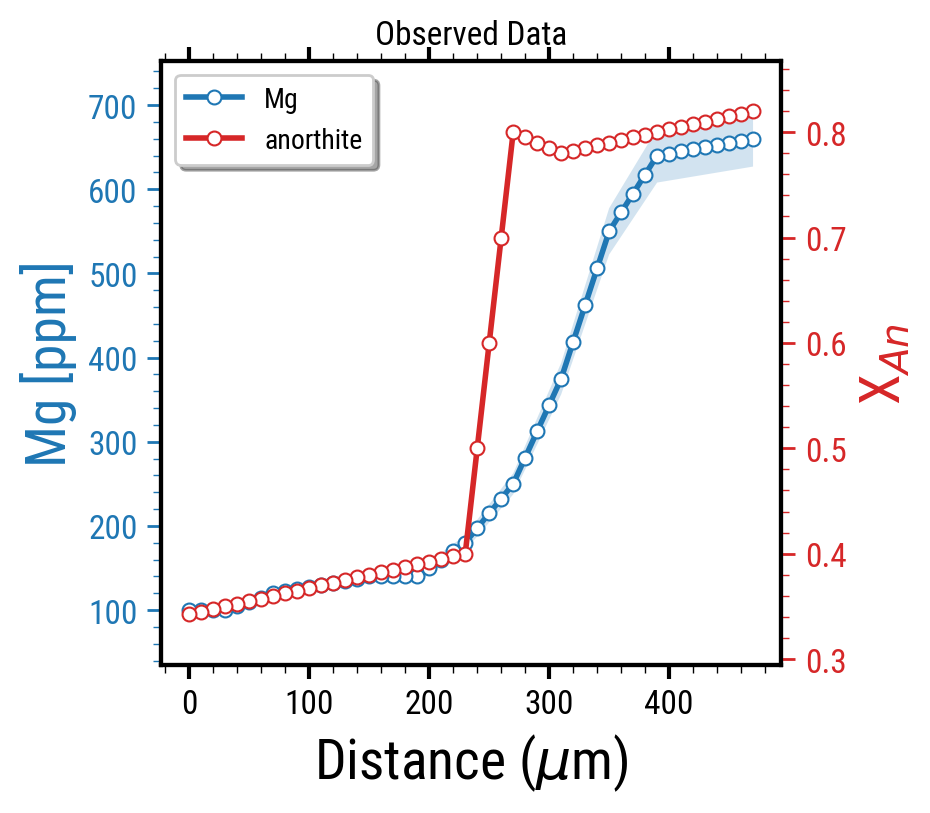

In [3]:
# For saving figures and making titles
grain = "P17"

# specify which element to model
# Sr or Mg
element = "Mg"

resolution = 10.0  # um

# for consistent colors throughout
obs_color = "C0"  # observed data
eq_color = "C1"  # equilibrium data
an_color = "C3"
init_color = "k"  # initial profile related data
bf_color = "C2"

# mimic Fidel's data
te = np.flip(
    np.array([100, 100, 120, 130, 140, 140, 180, 250, 375, 550, 640, 650, 660])
)
an = np.flip(np.array([34, 35, 36, 37, 38, 39, 40, 80, 78, 79, 80, 81, 82]) / 100)
dist = np.arange(0, te.shape[0]) * 40

te_unc = 0.05 * te


# give the mimic'd data better resolution
f_te = interpolate.interp1d(dist, te)
f_an = interpolate.interp1d(dist, an)

dist_interp = np.arange(0, dist.max(), resolution)

te = f_te(dist_interp)
an = f_an(dist_interp)
te_unc = 0.05 * te

dist = dist_interp.copy()


# plot observed data
fig, ax = plt.subplots(figsize=(4, 4))
# observed profile and subset
(l1,) = ax.plot(
    np.flip(dist),
    te,
    c=obs_color,
    marker="o",
    mfc="w",
    mec=obs_color,
    ms=5,
    mew=0.75,
    label=element,
)
ax.fill_between(np.flip(dist), te + te_unc, te - te_unc, alpha=0.2)

ax2 = ax.twinx()
(l2,) = ax2.plot(
    np.flip(dist),
    an,
    c=an_color,
    marker="o",
    mfc="w",
    mec=an_color,
    ms=5,
    mew=0.75,
    label="anorthite",
)
ax2.tick_params(axis="y", which="both", colors=an_color)
ax2.set_ylabel("X$_{An}$", c=an_color)

ax.legend(handles=[l1, l2], fancybox=True, shadow=True)
# fig.legend(loc="best")

ax.set_ylabel("{} [ppm]".format(element), c=obs_color)
ax.tick_params(axis="y", which="both", colors=obs_color)
ax.set_xlabel("Distance ($\mu$m)")
ax.set_title("Observed Data")

## Equilibrium profiles

The equilibrium profile can be thought of as the "final" position at which diffusion progresses for a given An composition. Because NaSi - CaAl interdiffusion in plagiocalse is extremely slow we treat the An profile as fixed, which ultimately means that the equilibrium profile is also fixed for a given transect. We calculate this using standard partition coefficient relationships:

$$\large{C_s = C_lK_d} $$

Which, when we substitue in the Arrhenius partitioning relationship for trace elements for plagioclase, yields:

$$\large{{Mg_{eq}}^{sol} = C_l\exp{\left({\frac{AX_{An}+B}{RT}}\right)}}$$



Text(0.5, 1.0, 'Solid')

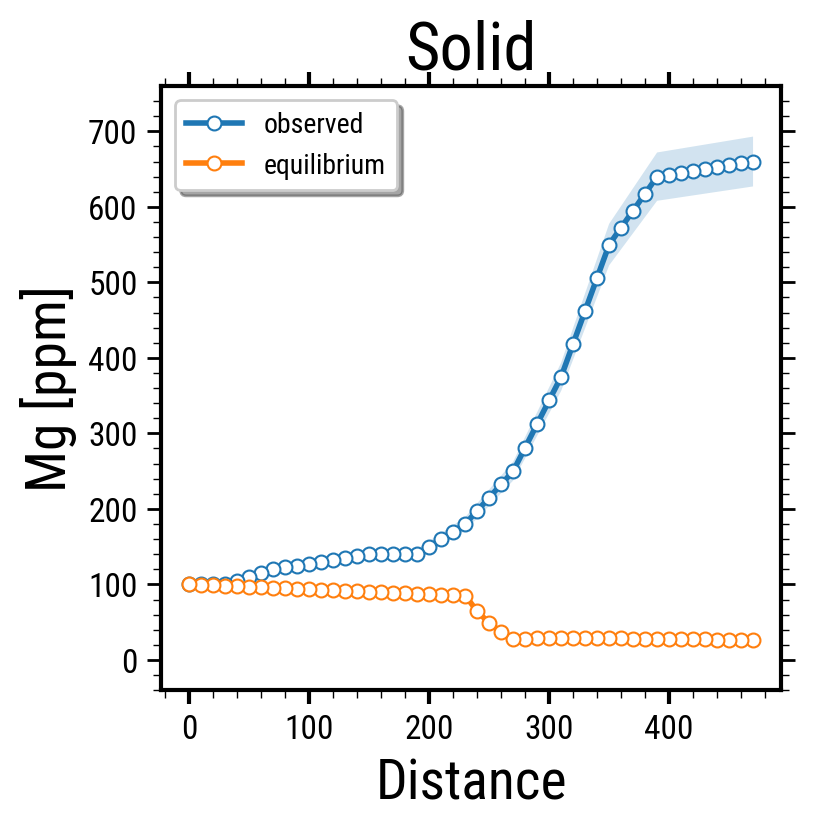

In [4]:
# Thermodynamic parameters
T_K = 850 + 273.15  # K
R = 8.314

# plagioclase partitioning information
# partition coefficient, uncertainty, A, B params
method = "Bindeman"
kd, kd_std, A, B = plag.plag_kd_calc(element, an, T_K, method=method)


# concentration of the 'rim-most' equilibrium liquid
cl_rim = te[-1] / kd[-1]
# its uncertainty
cl_rim_unc = cl_rim * np.sqrt((te_unc[-1] / te[-1]) ** 2 + (kd_std[-1] / kd[-1]) ** 2)

# equilibrium profile based on established equilibrium liquid concentration
# at the rim
eq_prof = cl_rim * kd
# its uncertainty
eq_prof_unc = eq_prof * np.sqrt((cl_rim_unc / cl_rim) ** 2 + (kd_std / kd) ** 2)

# plotting things up
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(
    np.flip(dist),
    te,
    label="observed",
    c=obs_color,
    marker="o",
    mfc="w",
    mec=obs_color,
    ms=5,
    mew=0.75,
)
ax.fill_between(np.flip(dist), te + te_unc, te - te_unc, alpha=0.2)
ax.plot(
    np.flip(dist),
    eq_prof,
    label="equilibrium",
    c=eq_color,
    marker="o",
    mfc="w",
    mec=eq_color,
    ms=5,
    mew=0.75,
)
# ax[0].fill_between(dist,eq_prof + eq_prof_unc, eq_prof - eq_prof_unc,alpha = .2)
ax.legend(fancybox=True, shadow=True)
ax.set_ylabel("{} [ppm]".format(element))
ax.set_xlabel("Distance")
ax.set_title("Solid", fontsize=24)

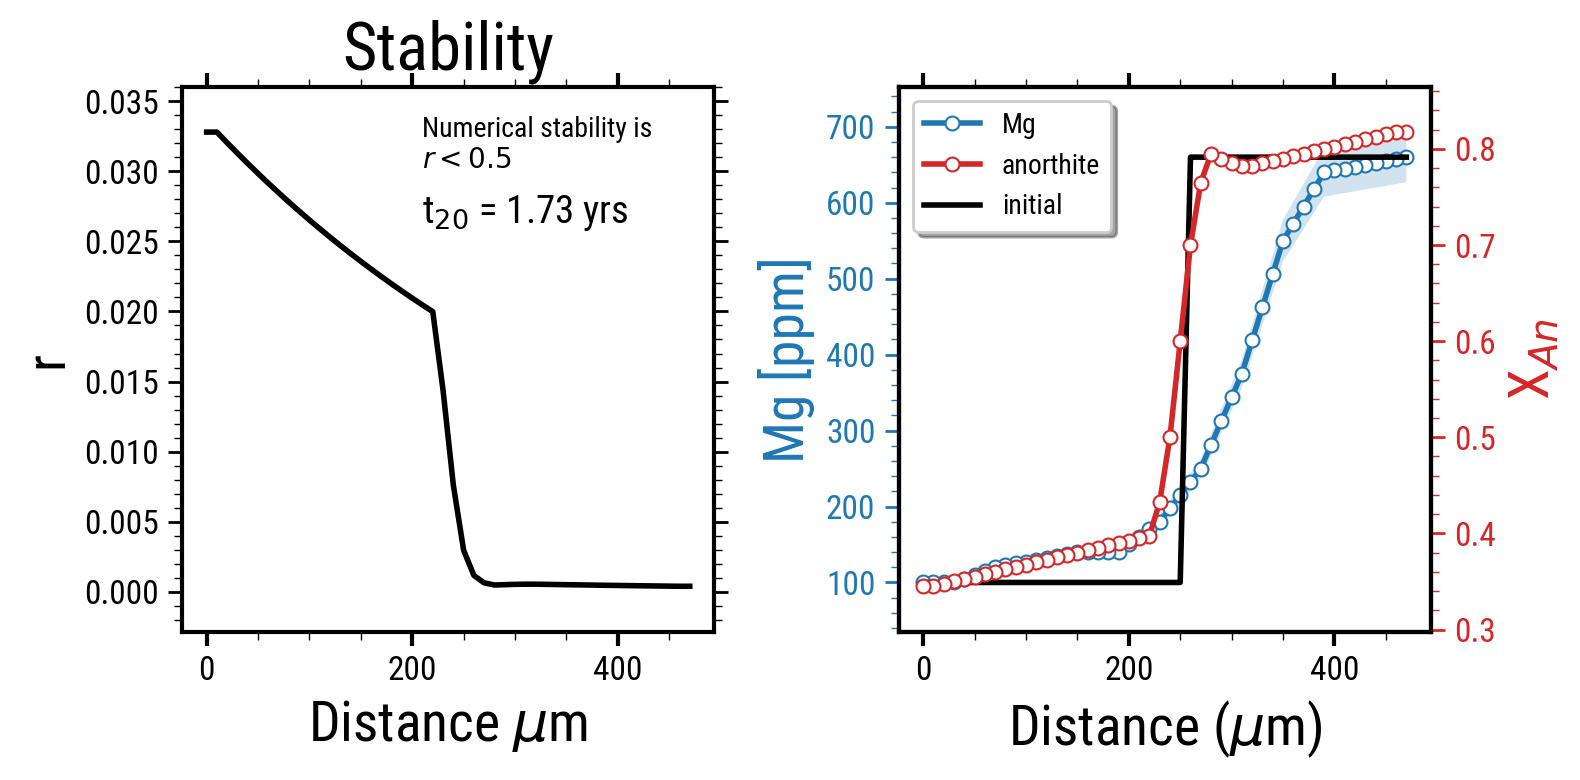

In [5]:
dx = dist[1] - dist[0]

initial_profile = np.zeros(dist.shape[0])

# ------------------------------------------------------
# initial condition as a step function
# these numbers are the actual distance in microns
# we convert them to their index in the array later
stepstart = 220 - np.min(dist)
stepstop = 700 - np.min(dist)

# boundary conditions in ppm for left, middle, and right
step_left = te.max()
step_middle = te.min()
step_right = te.min()

step_begin = stepstart
step_begin_idx = int(step_begin / dx)
step_stop = stepstop
step_stop_idx = int(step_stop / dx)

# first step function
initial_profile[:step_begin_idx] = step_left
initial_profile[step_begin_idx:step_stop_idx] = step_middle
initial_profile[step_stop_idx:] = step_right

# since our Di is in um^2/s we need to factor that into our time grid
# by spacing out the points accordingly.
# 10,000 years iterating by tenths of year
iterations = int(2e6)
timestep = "days"


# creating a time grid that is spaced by years
t = plag.get_tgrid(iterations, timestep)

an = np.convolve(an, np.ones(3), "valid") / 3
an = np.insert(an, 0, an[0])
an = np.append(an, an[-1])
# Van Orman et al 2013 diffusion coefficient
# diffusivity in (um^2/s)
D = plag.plag_diffusivity(element, an, T_K, method="costa")

# numerical stability value
r = (D * (t[1] - t[0])) / dx ** 2


fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].set_title("Stability", fontsize=24)
ax[0].plot(np.flip(dist), r, init_color)
ax[0].set_ylabel("r", fontsize=20)
ax[0].set_xlabel("Distance $\mu$m", fontsize=20)
t20 = (0.24 * (((dist[1] - dist[0]) * 1e-6) ** 2) / (D / 1e12)) / (
    60 * 60 * 24 * 365.25
)

ax[0].text(0.45, 0.85, "Numerical stability is\n$r<0.5$", transform=ax[0].transAxes)
ax[0].text(
    0.45,
    0.75,
    "t$_{{20}}$ = {} yrs".format(np.round(t20.max(), 2)),
    transform=ax[0].transAxes,
    fontsize=14,
)


# observed profile and subset
(l1,) = ax[1].plot(
    np.flip(dist),
    te,
    c=obs_color,
    marker="o",
    mfc="w",
    mec=obs_color,
    ms=5,
    mew=0.75,
    label=element,
)
ax[1].fill_between(np.flip(dist), te + te_unc, te - te_unc, alpha=0.2)

ax2 = ax[1].twinx()
(l2,) = ax2.plot(
    np.flip(dist),
    an,
    c=an_color,
    marker="o",
    mfc="w",
    mec=an_color,
    ms=5,
    mew=0.75,
    label="anorthite",
)
ax2.tick_params(axis="y", which="both", colors=an_color)
ax2.set_ylabel("X$_{An}$", c=an_color)

(l3,) = ax[1].plot(np.flip(dist), initial_profile, c="k", label="initial")

ax[1].legend(handles=[l1, l2, l3], fancybox=True, shadow=True)
# fig.legend(loc="best")

ax[1].set_ylabel("{} [ppm]".format(element), c=obs_color)
ax[1].tick_params(axis="y", which="both", colors=obs_color)
ax[1].set_xlabel("Distance ($\mu$m)")


fig.tight_layout()
# plt.savefig('{}\initial_profile_example.pdf'.format(export_path),bbox_inches = 'tight')

## Running the forward diffusion model

In [6]:
# run the forward diffusion model
curves = plag.diffuse_forward(
    initial_profile, te, t, D, an, A, dist, T_K, boundary="infinite observed"
)

100%|███████████████████████████████████████████████████████████████| 2000001/2000001 [01:14<00:00, 26688.11timestep/s]


(0.0, 800.0)

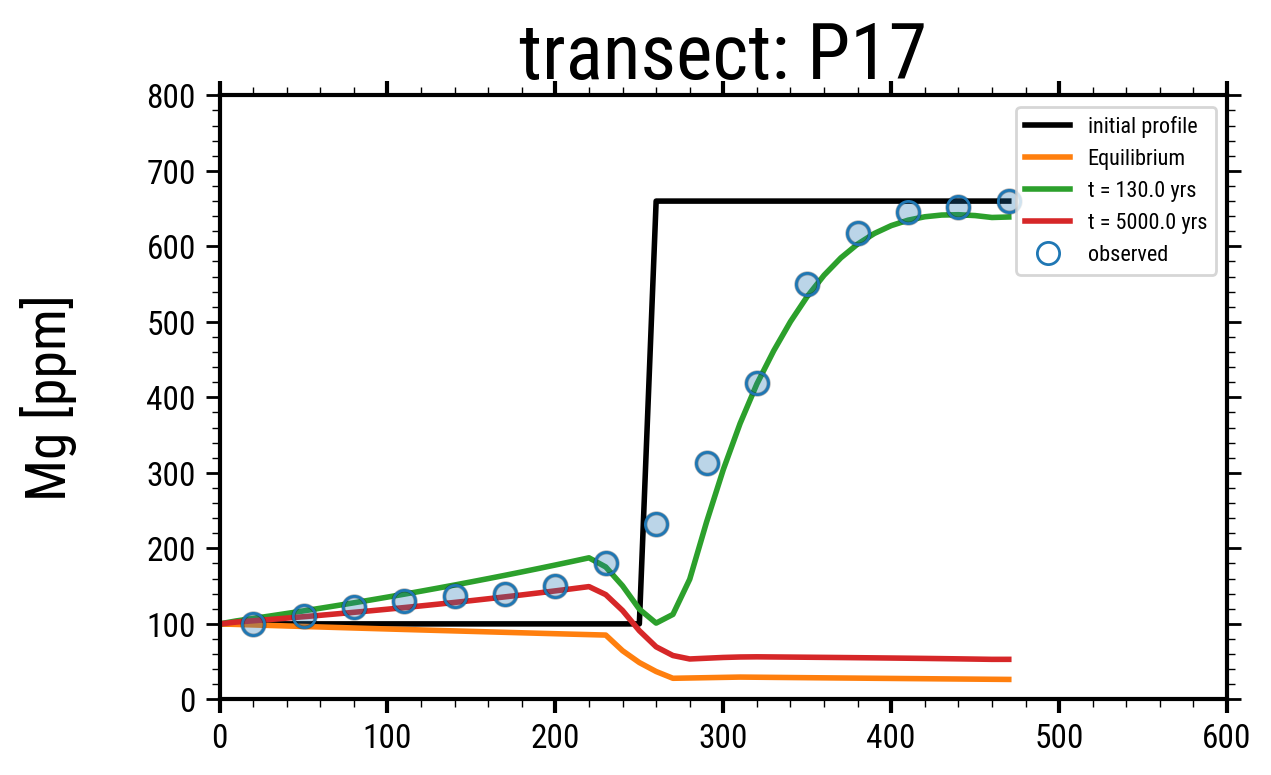

In [15]:
fig, ax = plt.subplots(figsize=(6.5,4))

makeyears = 365
ms = 5
ax.plot(np.flip(dist), initial_profile, "k-", lw=2, label="initial profile")
ax.plot(np.flip(dist), eq_prof, c=eq_color, label="Equilibrium")  # boundary conditions

# #comparison curves. Omit this if you don't want them
compare = [makeyears * 130, makeyears * 5000]
compare_colors = ["C2", "C3"]
for i in range(0, len(compare)):
    ax.plot(
        np.flip(dist),
        curves[compare[i]],
        label="t = {} yrs".format(compare[i] / makeyears),
        c=compare_colors[i],
    )
ax.plot(np.flip(dist)[::3], te[::3], mfc=obs_color, ls="", marker="o", alpha=0.3)

ax.plot(
    np.flip(dist)[::3],
    te[::3],
    label="observed",
    c=obs_color,
    ls="",
    marker="o",
    mfc="none",
    mec="C0",
    mew=1,
)


ax.legend(loc="best", prop={"size": 8}, ncol=1)
ax.set_ylabel("{} [ppm]".format(element), fontsize=20,labelpad = 25)
ax.set_xlim(left=np.min(dist), right=np.max(dist))

ax.set_title("transect: {}".format(grain), fontsize=28)
ax.set_xlim(0, 600)
ax.set_ylim(0, 800)

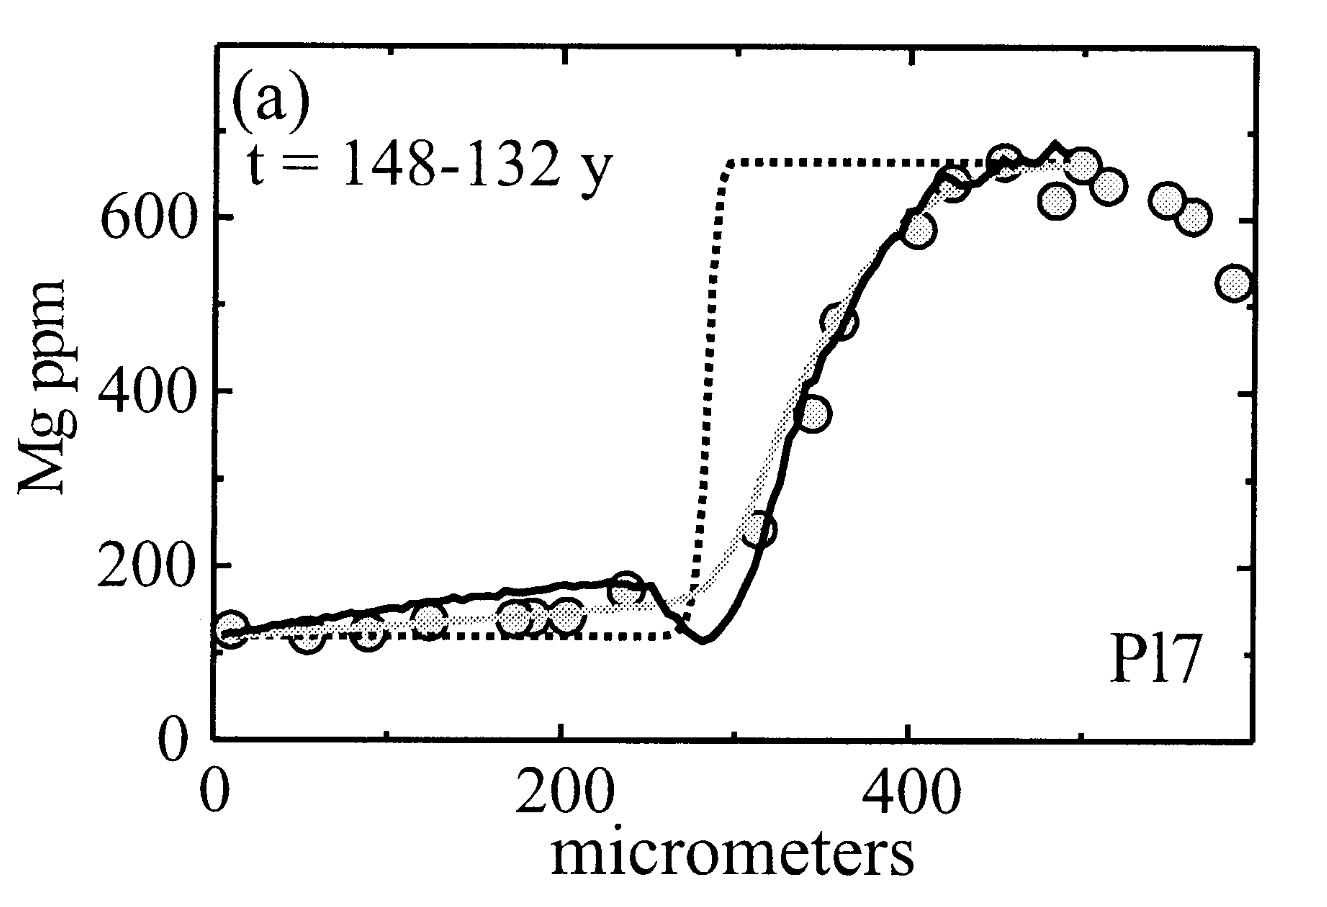

In [8]:
display.Image(b64decode(b64data))